In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
bgs_raw = pd.read_csv("giant order dump.csv", names = ['customer_id', 'oder', 'total_sales', 'date', 'site' ], parse_dates=[3])
bgs_raw.head()

C:\Users\FaridSarwari\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,customer_id,oder,total_sales,date,site
0,CanonicalUserID,OrderID,TotalIncTax,WhenPlaced,SiteID
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,117.11,13/10/2019 13:20,NLB2C
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,45.4,29/08/2021 12:36,NLB2C
3,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1326466,63.49,08/02/2021 11:49,UKB2C
4,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1422717,28,23/06/2021 22:27,UKB2C


In [125]:
bgs_raw_df = bgs_raw.iloc[1:, : ]
bgs_raw_df.head()

,customer_id,oder,total_sales,date,site
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,117.11,13/10/2019 13:20,NLB2C
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,45.4,29/08/2021 12:36,NLB2C
3,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1326466,63.49,08/02/2021 11:49,UKB2C
4,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1422717,28,23/06/2021 22:27,UKB2C
5,094F69A9-34AA-4196-952D-000467E02E8B,746149,67.67,03/01/2018 20:22,UKB2C


In [126]:
bgs_raw_df.dtypes

customer_id    object
oder           object
total_sales    object
date           object
site           object
dtype: object

In [127]:
bgs_raw_df['date'] = pd.to_datetime(bgs_raw_df['date'], format= '%d/%m/%Y %H:%M')

<ipython-input-127-b7adcc42bdc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgs_raw_df['date'] = pd.to_datetime(bgs_raw_df['date'], format= '%d/%m/%Y %H:%M')


In [128]:
bgs_raw_df['total_sales'] = pd.to_numeric(bgs_raw_df['total_sales'])

<ipython-input-128-3cc68ea02e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgs_raw_df['total_sales'] = pd.to_numeric(bgs_raw_df['total_sales'])


In [183]:
bgs_raw_df.dtypes

customer_id            object
oder                   object
total_sales           float64
date           datetime64[ns]
site                   object
dtype: object

In [130]:
bgs_raw_df.customer_id.nunique()

223575

In [131]:
bgs_raw_df.dtypes

customer_id            object
oder                   object
total_sales           float64
date           datetime64[ns]
site                   object
dtype: object

In [1104]:
bgs_raw_df.head()

,customer_id,oder,total_sales,date,site
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,117.11,2019-10-13 13:20:00,NLB2C
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,45.40,2021-08-29 12:36:00,NLB2C
3,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1326466,63.49,2021-02-08 11:49:00,UKB2C
4,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1422717,28.00,2021-06-23 22:27:00,UKB2C
5,094F69A9-34AA-4196-952D-000467E02E8B,746149,67.67,2018-01-03 20:22:00,UKB2C


In [159]:
df_duplicate = bgs_raw_df[bgs_raw_df.customer_id.duplicated(keep=False)].groupby(['customer_id', 'date']).sum().reset_index()

In [160]:
df_duplicate.head(20)

,customer_id,date,total_sales
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08
6,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,18.18
7,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,60.57
8,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,52.22
9,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,45.96


In [161]:
df_duplicate.dtypes

customer_id            object
date           datetime64[ns]
total_sales           float64
dtype: object

In [143]:
print(df_duplicate.loc[df_duplicate['customer_id'] == 'D10B31A4-D79A-42BB-BBB5-0004434B7E1E'])

                              customer_id     oder  total_sales  \
3    D10B31A4-D79A-42BB-BBB5-0004434B7E1E  1326466        63.49   
4    D10B31A4-D79A-42BB-BBB5-0004434B7E1E  1422717        28.00   
344  D10B31A4-D79A-42BB-BBB5-0004434B7E1E  1260636        43.07   

                   date   site  
3   2021-02-08 11:49:00  UKB2C  
4   2021-06-23 22:27:00  UKB2C  
344 2020-11-13 10:18:00  UKB2C  


In [151]:
df_duplicate.to_csv('bgs_duplicate.csv')

In [156]:
df_duplicate.dtypes

total_sales    float64
dtype: object

In [171]:
df_duplicate['order_number'] = df_duplicate.sort_values(['customer_id', 'date'], ascending=[False, True]).groupby(['customer_id']).cumcount() + 1

In [174]:
df_duplicate.head(20)

,customer_id,date,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84,5
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08,1
6,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,18.18,2
7,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,60.57,3
8,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,52.22,4
9,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,45.96,5


In [175]:
df_duplicate.to_csv('bgs_duplicate.csv')

In [177]:
df_duplicate.dtypes

customer_id             object
date            datetime64[ns]
total_sales            float64
order_number             int64
dtype: object

### CLTV Implementation

In [179]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

In [180]:
data = df_duplicate.copy()

In [182]:
data.describe()

,total_sales,order_number
count,330829.000000,330829.000000
mean,58.401133,8.389461
std,51.628545,39.040752
min,0.040000,1.000000
25%,31.900000,2.000000
50%,53.750000,3.000000
75%,67.800000,6.000000
max,4940.000000,982.000000


In [185]:
rfm = bgs_raw_df.groupby("customer_id").agg({"date": [lambda date: (date.max() - date.min()).days],
                                             "customer_id": lambda num: num.count(),
                                      "total_sales": lambda price: price.sum()})

In [186]:
rfm.head()

,date,customer_id,total_sales
,<lambda>,<lambda>,<lambda>
customer_id,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82
00008280-429D-495F-BB87-893438746905,315,5,137.43
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96


In [187]:
rfm.columns=['num_days','num_transactions','spent_money']
rfm.head()

,num_days,num_transactions,spent_money
customer_id,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82
00008280-429D-495F-BB87-893438746905,315,5,137.43
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96


In [189]:
rfm['avg_order_value']=rfm['spent_money']/rfm['num_transactions']
rfm.head()

,num_days,num_transactions,spent_money,avg_order_value
customer_id,,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00,14.000
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85,42.850
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82,61.820
00008280-429D-495F-BB87-893438746905,315,5,137.43,27.486
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96,51.960


In [190]:
purchase_frequency=sum(rfm['num_transactions'])/rfm.shape[0]

In [192]:
repeat_rate=rfm[rfm.num_transactions > 1].shape[0]/rfm.shape[0]

In [193]:
churn_rate=1-repeat_rate

In [194]:
purchase_frequency,repeat_rate,churn_rate

(2.1921726489992173, 0.32727272727272727, 0.6727272727272727)

In [195]:
rfm['profit_margin']=rfm['spent_money']*0.05
rfm.head()

,num_days,num_transactions,spent_money,avg_order_value,profit_margin
customer_id,,,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00,14.000,0.7000
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85,42.850,2.1425
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82,61.820,3.0910
00008280-429D-495F-BB87-893438746905,315,5,137.43,27.486,6.8715
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96,51.960,2.5980


In [196]:
rfm['CLV']=(rfm['avg_order_value']*purchase_frequency)/churn_rate

In [197]:
rfm.head()

,num_days,num_transactions,spent_money,avg_order_value,profit_margin,CLV
customer_id,,,,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00,14.000,0.7000,45.620890
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85,42.850,2.1425,139.632511
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82,61.820,3.0910,201.448817
00008280-429D-495F-BB87-893438746905,315,5,137.43,27.486,6.8715,89.566842
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96,51.960,2.5980,169.318676


In [199]:
rfm['cust_lifetime_value']=rfm['CLV']*rfm['profit_margin']
rfm.head()

,num_days,num_transactions,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
customer_id,,,,,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00,14.000,0.7000,45.620890,31.934623
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85,42.850,2.1425,139.632511,299.162654
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82,61.820,3.0910,201.448817,622.678293
00008280-429D-495F-BB87-893438746905,315,5,137.43,27.486,6.8715,89.566842,615.458556
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96,51.960,2.5980,169.318676,439.889919


In [1149]:
rfm.head()

,num_days,num_transactions,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
customer_id,,,,,,,
000020BA-0E21-4246-9968-6ED13113768A,0,1,14.00,14.000,0.7000,45.620890,31.934623
00004040-BFD2-492B-A752-BE9459B3FE22,0,1,42.85,42.850,2.1425,139.632511,299.162654
000058D5-2DBE-4251-8448-9B1CFA15FF49,0,1,61.82,61.820,3.0910,201.448817,622.678293
00008280-429D-495F-BB87-893438746905,315,5,137.43,27.486,6.8715,89.566842,615.458556
0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0,1,51.96,51.960,2.5980,169.318676,439.889919


In [1150]:
rfm.to_csv('bgs_rfm.csv')

### Prediction Model for CLTV

In [201]:
data = bgs_raw_df.copy()

In [202]:
data.head()

,customer_id,oder,total_sales,date,site
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,117.11,2019-10-13 13:20:00,NLB2C
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,45.40,2021-08-29 12:36:00,NLB2C
3,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1326466,63.49,2021-02-08 11:49:00,UKB2C
4,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1422717,28.00,2021-06-23 22:27:00,UKB2C
5,094F69A9-34AA-4196-952D-000467E02E8B,746149,67.67,2018-01-03 20:22:00,UKB2C


In [203]:
data['month_yr'] = data['date'].apply(lambda x: x.strftime('%b-%Y'))
data.head()

,customer_id,oder,total_sales,date,site,month_yr
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,117.11,2019-10-13 13:20:00,NLB2C,Oct-2019
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,45.40,2021-08-29 12:36:00,NLB2C,Aug-2021
3,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1326466,63.49,2021-02-08 11:49:00,UKB2C,Feb-2021
4,D10B31A4-D79A-42BB-BBB5-0004434B7E1E,1422717,28.00,2021-06-23 22:27:00,UKB2C,Jun-2021
5,094F69A9-34AA-4196-952D-000467E02E8B,746149,67.67,2018-01-03 20:22:00,UKB2C,Jan-2018


In [270]:
data1 = data.set_index('date').sort_index()

In [271]:
data1.head()

,customer_id,oder,total_sales,site,month_yr
date,,,,,
2017-01-01 08:35:00,FF3D6334-F323-43D8-8016-3243DB0E5073,637431,29.48,NLB2C,Jan-2017
2017-01-01 08:57:00,41676556-BEF0-41A3-BA29-5E84E76E16B3,637935,63.27,UKB2C,Jan-2017
2017-01-01 09:07:00,D6ED6C27-ED68-4F3F-BA0D-A13C472C9653,637936,9.99,UKB2C,Jan-2017
2017-01-01 09:29:00,8AB34DB2-7531-4852-8CAD-3B576E4ECE92,637938,73.77,NLB2C,Jan-2017
2017-01-01 09:39:00,064F8DD1-E456-444F-B8E5-757AB488F51A,637939,61.67,UKB2C,Jan-2017


In [272]:
last_12m_df = data1["2020-08-31": "2021-08-31"]

In [275]:
last_12m_df.iloc[100:, ]

,customer_id,oder,total_sales,site,month_yr
date,,,,,
2020-08-31 11:50:00,67E4766B-EAB1-4D21-B7DF-985065E82178,1207868,22.40,NLB2C,Aug-2020
2020-08-31 11:52:00,640E28DA-D99F-4A10-9044-14E777DDE9C3,1207870,52.81,NLB2C,Aug-2020
2020-08-31 11:55:00,06B9D056-3792-4491-8341-164788829E06,1207864,101.94,NLB2C,Aug-2020
2020-08-31 11:59:00,C65FED0E-A38F-42EE-8E2D-B95121DCC9DF,1207873,23.17,UKB2C,Aug-2020
2020-08-31 12:01:00,1E33FB28-68BC-4921-B635-65DE96B91493,1207874,21.95,UKB2C,Aug-2020
...,...,...,...,...,...
2021-08-31 11:18:00,B463707F-7422-4DAE-B4DF-7923BC55C40E,1467182,29.57,NLB2C,Aug-2021
2021-08-31 11:19:00,A4F4B8A7-645A-4930-8353-9A37370F1FAE,1467183,16.46,NLB2C,Aug-2021
2021-08-31 11:27:00,A3F4DEBA-08CC-42D9-82FC-A7EE14FB9A60,1467190,14.70,NLB2C,Aug-2021


In [278]:
last_12m_df = last_12m_df.reset_index()

In [284]:
last_12m_df.iloc[130000:]

,date,customer_id,oder,total_sales,site,month_yr
130000,2021-07-31 13:49:00,E0ECEB21-CA20-4ED6-A5F2-0B9EF26AC28A,1449064,46.58,DEB2C,Jul-2021
130001,2021-07-31 13:53:00,FBF47FCA-024F-44A2-87BE-B98ACF2F8575,1449065,17.26,UKB2C,Jul-2021
130002,2021-07-31 13:56:00,2C938B6B-19B6-4846-85AE-DE26A9F50B2B,1449063,56.25,UKB2C,Jul-2021
130003,2021-07-31 14:00:00,25FD2FB4-AE54-49EA-8C3C-04643563EF50,1449066,18.35,FRB2C,Jul-2021
130004,2021-07-31 14:04:00,1B97CA56-3BC2-454B-A67D-724E688F179B,1449067,29.40,UKB2C,Jul-2021
...,...,...,...,...,...,...
141031,2021-08-31 11:18:00,B463707F-7422-4DAE-B4DF-7923BC55C40E,1467182,29.57,NLB2C,Aug-2021
141032,2021-08-31 11:19:00,A4F4B8A7-645A-4930-8353-9A37370F1FAE,1467183,16.46,NLB2C,Aug-2021
141033,2021-08-31 11:27:00,A3F4DEBA-08CC-42D9-82FC-A7EE14FB9A60,1467190,14.70,NLB2C,Aug-2021
141034,2021-08-31 11:28:00,EF4800E2-EEDF-40F5-82A5-E7A9BF47E44B,1467191,38.23,UKB2C,Aug-2021


In [289]:
sale=last_12m_df.pivot_table(index=['customer_id'],columns=['month_yr'],values='total_sales',aggfunc='sum',fill_value=0).reset_index()

In [292]:
sale.tail()

month_yr,customer_id,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Sep-2020
92200,FFFEA84C-A016-4EBA-BB8C-42981562A845,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,24.65,0.0
92201,FFFEB427-66A8-4069-9BE5-E0FF683AD0EC,0.0,0.0,0.00,18.74,0.0,0.0,0.0,0.0,27.84,32.83,0.0,0.00,0.0
92202,FFFEE5A9-EE0A-41D5-BB90-04CEDDA6872A,0.0,0.0,384.70,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
92203,FFFF5741-B926-4C52-ADE6-57A3905BF507,49.4,0.0,48.36,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
92204,FFFF991E-0826-468F-B53A-93897610A5AF,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,58.41,0.00,0.0,0.00,0.0


In [293]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,customer_id,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Sep-2020,CLV
0,0000C6A2-65BD-4E02-B96E-8E0E8CC25235,0.0,0.0,51.96,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,51.96
1,000103FF-C70A-4060-B971-9F106F0A2BC6,0.0,0.0,0.00,27.80,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,27.80
2,00028351-20EE-4CD4-AA48-59AEF61AAF77,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,65.65,65.65
3,0002986C-781F-4E03-9CFA-F77CA5E89649,0.0,0.0,0.00,56.89,0.0,0.0,0.0,0.0,0.0,39.98,0.0,45.96,0.00,142.83
4,0002EC82-C129-4573-8104-04BAF40230AD,0.0,0.0,0.00,41.79,0.0,0.0,0.0,0.0,0.0,0.00,0.0,34.33,0.00,76.12


In [296]:
df_duplicate.head()

,customer_id,date,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84,5


In [297]:
df_duplicate1 = df_duplicate.copy()

In [300]:
df_duplicate1.head()

,customer_id,date,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84,5


In [342]:
df_duplicate1['month_yr'] =df_duplicate1['date'].apply(lambda x: x.strftime('%b-%Y'))
                                                    

In [348]:
df_duplicate1.tail()

,customer_id,date,total_sales,order_number,month_yr
330824,FFFEE5A9-EE0A-41D5-BB90-04CEDDA6872A,2020-05-06 13:33:00,56.25,2,2020-05-01
330825,FFFEE5A9-EE0A-41D5-BB90-04CEDDA6872A,2020-06-03 00:49:00,147.40,3,2020-06-01
330826,FFFEE5A9-EE0A-41D5-BB90-04CEDDA6872A,2021-08-08 12:30:00,384.70,4,2021-08-01
330827,FFFF5741-B926-4C52-ADE6-57A3905BF507,2021-04-11 14:31:00,49.40,1,2021-04-01
330828,FFFF5741-B926-4C52-ADE6-57A3905BF507,2021-08-07 11:04:00,48.36,2,2021-08-01


In [347]:
df_duplicate1.dtypes

customer_id             object
date            datetime64[ns]
total_sales            float64
order_number             int64
month_yr        datetime64[ns]
dtype: object

In [352]:
 df_duplicate1["month_yr"] = pd.to_datetime( df_duplicate1["month_yr"], format= '%Y-%m')

In [422]:
df_duplicate1.head()

,customer_id,date,total_sales,order_number,month_yr
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1,2019-06-01
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82,2,2019-08-01
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92,3,2019-10-01
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23,4,2020-02-01
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84,5,2020-04-01


In [354]:
last_12m_repeat = df_duplicate1[df_duplicate1.month_yr > "2020-08"]

In [355]:
last_12m_repeat.tail()

,customer_id,date,total_sales,order_number,month_yr
330821,FFFEB427-66A8-4069-9BE5-E0FF683AD0EC,2021-03-21 16:54:00,27.84,2,2021-03-01
330822,FFFEB427-66A8-4069-9BE5-E0FF683AD0EC,2021-05-13 20:47:00,32.83,3,2021-05-01
330826,FFFEE5A9-EE0A-41D5-BB90-04CEDDA6872A,2021-08-08 12:30:00,384.70,4,2021-08-01
330827,FFFF5741-B926-4C52-ADE6-57A3905BF507,2021-04-11 14:31:00,49.40,1,2021-04-01
330828,FFFF5741-B926-4C52-ADE6-57A3905BF507,2021-08-07 11:04:00,48.36,2,2021-08-01


In [333]:
last_12m_repeat.dtypes

customer_id             object
date            datetime64[ns]
total_sales            float64
order_number             int64
month_yr        datetime64[ns]
dtype: object

In [356]:
last_12m_repeat = last_12m_repeat.set_index('month_yr').sort_index()

In [358]:
last_12m_repeat.head()

,customer_id,date,total_sales,order_number
month_yr,,,,
2020-09-01,0E0184DF-7456-435A-92F5-23F8218EB7C1,2020-09-04 07:38:00,28.83,2
2020-09-01,A553507E-6269-4049-9D3B-264F7F52BB3E,2020-09-21 12:34:00,34.05,1
2020-09-01,A554E71D-A6B6-4131-B39A-B751F1F205C0,2020-09-30 21:56:00,55.93,3
2020-09-01,533D6507-73C1-424E-B181-0EB0FDE3BDFF,2020-09-21 14:33:00,57.43,2
2020-09-01,A55AD29C-5543-4233-A5EA-F56B633CD23E,2020-09-29 11:05:00,32.13,2


In [359]:
last_12m_repeat = last_12m_repeat.reset_index()

In [360]:
last_12m_repeat.head()

,month_yr,customer_id,date,total_sales,order_number
0,2020-09-01,0E0184DF-7456-435A-92F5-23F8218EB7C1,2020-09-04 07:38:00,28.83,2
1,2020-09-01,A553507E-6269-4049-9D3B-264F7F52BB3E,2020-09-21 12:34:00,34.05,1
2,2020-09-01,A554E71D-A6B6-4131-B39A-B751F1F205C0,2020-09-30 21:56:00,55.93,3
3,2020-09-01,533D6507-73C1-424E-B181-0EB0FDE3BDFF,2020-09-21 14:33:00,57.43,2
4,2020-09-01,A55AD29C-5543-4233-A5EA-F56B633CD23E,2020-09-29 11:05:00,32.13,2


In [377]:
df_duplicate1[df_duplicate1['order_number']==1].set_index('date')

,customer_id,total_sales,order_number,month_yr
date,,,,
2019-06-07 13:45:00,00008280-429D-495F-BB87-893438746905,21.62,1,2019-06-01
2020-02-28 10:15:00,0002986C-781F-4E03-9CFA-F77CA5E89649,34.08,1,2020-02-01
2020-10-09 16:00:00,0002EC82-C129-4573-8104-04BAF40230AD,34.33,1,2020-10-01
2020-01-22 05:45:00,000443B3-11A4-4776-A60E-DBD9E47D0698,57.09,1,2020-01-01
2021-02-19 19:13:00,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,16.63,1,2021-02-01
...,...,...,...,...
2020-04-28 14:54:00,FFFE9C34-7FDA-43C3-AB93-82E0D3F25046,57.25,1,2020-04-01
2017-03-30 15:32:00,FFFEA84C-A016-4EBA-BB8C-42981562A845,12.75,1,2017-03-01
2020-12-25 16:07:00,FFFEB427-66A8-4069-9BE5-E0FF683AD0EC,18.74,1,2020-12-01


In [385]:
df_duplicate2= df_duplicate1[df_duplicate1['order_number']==1]
df_duplicate2.head()

,customer_id,date,total_sales,order_number,month_yr
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1,2019-06-01
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08,1,2020-02-01
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,34.33,1,2020-10-01
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,57.09,1,2020-01-01
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,16.63,1,2021-02-01


<AxesSubplot:xlabel='date'>

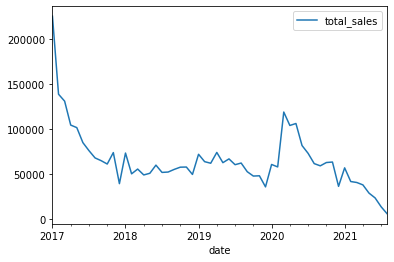

In [393]:
df_duplicate1[df_duplicate1['order_number']==1].set_index('date')[['total_sales']].resample(rule="MS").sum().plot()

In [ ]:
df_duplicate1.set_index('date')[['total_sales']].resample(rule="MS").sum().plot()

<AxesSubplot:xlabel='month_yr'>

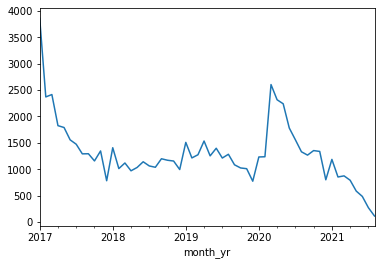

In [389]:
df = df_duplicate2.groupby("month_yr")["order_number"].sum()
df.plot()

In [395]:
df_duplicate3 = df_duplicate1.copy()

In [396]:
df_duplicate3['month_yr'] =df_duplicate3['date'].apply(lambda x: x.strftime('%b-%Y'))
df_duplicate3.head()
                                                    

,customer_id,date,total_sales,order_number,month_yr
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,21.62,1,Jun-2019
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,36.82,2,Aug-2019
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,19.92,3,Oct-2019
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,18.23,4,Feb-2020
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,40.84,5,Apr-2020


In [400]:
sale_pivot=df_duplicate3.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)

In [401]:
sale_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,973,974,975,976,977,978,979,980,981,982
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2017,104282.45,62289.00,30576.21,12627.87,6315.570,2239.78,1868.89,451.95,52.05,407.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2018,48729.34,52549.62,34894.61,28183.57,23332.260,16171.12,13260.36,11097.27,8360.27,5032.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2019,73823.30,62839.67,37305.95,29333.85,19953.634,17251.59,11553.89,13080.94,9877.21,9511.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2020,103849.97,84879.24,49447.37,38487.09,26358.450,19245.34,15108.03,14552.30,12787.57,9673.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2021,37649.73,84659.22,55663.25,37824.69,30037.440,26260.31,19208.98,14633.15,13818.07,13169.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [402]:
sale_pivot.to_csv('bgs_pivot.csv')

#### CULMULATIVE NEW CUSTOMER REVENUE

In [1151]:
import os

os.chdir('C:/Users/FaridSarwari/OneDrive - Benchspark/Desktop/FBP/BGS/Sales Data/BGS sales/Currency_Adjus/Cum_rev_adj')

In [1772]:
df_duplicate = pd.read_pickle(r'C:/Users/FaridSarwari/OneDrive - Benchspark/Desktop/FBP/BGS/Sales Data/df_currency_adjusted.pkl')

In [1773]:
df_duplicate.head()

,customer_id,order,total_sales,date,site,month_yr
1,A5DDA420-302C-49C1-A85F-00010646EF9F,1000586,100.093917,2019-10-13 13:20:00,NLB2C,Oct-2019
2,18DBDE67-B2B3-4DA4-84F4-0003289438DF,1465844,38.803380,2021-08-29 12:36:00,NLB2C,Aug-2021
6,85D90824-AF8A-42A6-97C8-0005ACF17DBA,845431,48.632430,2018-10-15 21:46:00,NLB2C,Oct-2018
22,7ED91C06-2841-4C2C-A5B6-000854120774,1002639,15.299130,2019-10-18 16:25:00,NLB2C,Oct-2019
23,8F8913D5-51C7-456A-BD6B-00092D174B67,1122255,36.239280,2020-05-08 18:06:00,NLB2C,May-2020


In [2285]:
len(df_duplicate)

490115

In [1774]:
df_duplicate1 = df_duplicate[df_duplicate.customer_id.duplicated(keep=False)].groupby(['customer_id', 'date', 'month_yr']).sum().reset_index()

In [1776]:
df_duplicate1['order_number'] = df_duplicate1.sort_values(['customer_id', 'date'], ascending=[False, True]).groupby(['customer_id']).cumcount() + 1

In [1777]:
len(df_duplicate1.loc[df_duplicate1['order_number'] == 1])

73170

In [2340]:
df_duplicate1['month_yr'] =df_duplicate1['date'].apply(lambda x: x.strftime('%Y-%b'))

In [1779]:
df_duplicate1["month_yr"] = pd.to_datetime(df_duplicate1["month_yr"])

In [2341]:
df_duplicate1.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-Jun,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-Aug,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,2019-Oct,17.025624,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,2020-Feb,15.581181,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,2020-Apr,34.905948,5


In [2342]:
len(df_duplicate1.customer_id.unique())

73170

In [2350]:
grouped_df = df_duplicate1.groupby('month_yr').agg({"customer_id": "nunique"})

In [2343]:
grouped_df = df_duplicate1.groupby('month_yr').agg({"customer_id": "nunique"})

In [2351]:
grouped_df.customer_id.sum

<bound method Series.sum of month_yr
2017-Apr    3439
2017-Aug    3713
2017-Dec    3007
2017-Feb    3041
2017-Jan    3856
2017-Jul    4026
2017-Jun    3864
2017-Mar    3709
2017-May    3894
2017-Nov    5066
2017-Oct    3865
2017-Sep    3943
2018-Apr    4161
2018-Aug    4120
2018-Dec    4011
2018-Feb    3796
2018-Jan    4765
2018-Jul    4689
2018-Jun    4500
2018-Mar    4299
2018-May    4395
2018-Nov    5104
2018-Oct    4606
2018-Sep    4522
2019-Apr    5551
2019-Aug    5316
2019-Dec    4221
2019-Feb    4607
2019-Jan    5481
2019-Jul    5212
2019-Jun    5607
2019-Mar    5204
2019-May    5313
2019-Nov    5344
2019-Oct    4896
2019-Sep    4994
2020-Apr    7881
2020-Aug    7273
2020-Dec    5856
2020-Feb    5636
2020-Jan    5875
2020-Jul    7599
2020-Jun    7950
2020-Mar    9585
2020-May    8374
2020-Nov    8940
2020-Oct    7799
2020-Sep    7429
2021-Apr    7105
2021-Aug    5869
2021-Feb    5994
2021-Jan    8169
2021-Jul    6483
2021-Jun    6945
2021-Mar    7000
2021-May    6883
Name: custo

In [2352]:
grouped_df.to_csv('reapeat_customers.csv')

In [2315]:
df_duplicate_data  = df_duplicate1.copy()

In [2316]:
df_duplicate_data.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-06-01,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-08-01,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,2019-10-01,17.025624,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,2020-02-01,15.581181,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,2020-04-01,34.905948,5


In [2317]:
df_duplicate_data['month_yr'] =df_duplicate_data['date'].apply(lambda x: x.strftime('%b-%Y'))
df_duplicate_data.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,Jun-2019,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,Aug-2019,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,Oct-2019,17.025624,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,Feb-2020,15.581181,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,Apr-2020,34.905948,5


In [2320]:
ids = df_duplicate_data.customer_id.nunique

In [2329]:
ids = df_duplicate_data.customer_id.nunique



In [2332]:
len(df_duplicate_data.customer_id.)

330829

In [ ]:
df_repeat = df_duplicate_data[df_duplicate_data['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2312]:
df_duplicate_data = df_duplicate_data.drop_duplicates(subset='customer_id', keep='first')
df_duplicate_data.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,Jun-2019,18.478614,1
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,Feb-2020,34.080000,1
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,Oct-2020,29.341851,1
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,Jan-2020,57.090000,1
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,Feb-2021,16.630000,1


In [2333]:
df_repeat_month = df_duplicate_data.groupby('month_yr').agg({"customer_id": lambda x: x.sum()})
df_repeat_month

,customer_id
month_yr,
Apr-2017,005EA510-C735-4BA6-BAA0-0601916988C300711346-0...
Apr-2018,000A2E55-1341-43C6-BE21-41C0A507A4E000127CDD-F...
Apr-2019,000A2AA3-5FCA-4230-A167-94CE1CE01244000AE092-B...
Apr-2020,00008280-429D-495F-BB87-8934387469050002986C-7...
Apr-2021,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F00051E9E-1...
Aug-2017,0036F323-C763-4278-8750-B78AE92E04DA0039686C-A...
Aug-2018,000A2AA3-5FCA-4230-A167-94CE1CE01244000A2E55-1...
Aug-2019,00008280-429D-495F-BB87-8934387469050009EBFA-5...
Aug-2020,000772AB-38F8-491F-88FC-F5980111AE5A000AB453-3...


In [2254]:
df_duplicate2 = df_duplicate_data[df_duplicate_data['order_number']==1]

In [2286]:
len(df_duplicate2)

73170

In [2255]:
df_duplicate2.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-06-01,18.478614,1
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-02-01,34.080000,1
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-10-01,29.341851,1
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-01,57.090000,1
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-02-01,16.630000,1


### Aug 2019 Cohort

In [1786]:
aug19_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-08" ]

In [1787]:
aug19_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
83,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,2019-08-01,23.837583,1
394,00457BD6-BBB7-4DA2-8AE9-7CEEE07E9D92,2019-08-01 19:47:00,2019-08-01,51.333282,1
605,00766C24-7FE4-4389-AC38-269F1ED821E1,2019-08-26 20:55:00,2019-08-01,52.017042,1
1213,00F842D1-14EF-4EF2-A0A3-9DD2463E3751,2019-08-18 17:50:00,2019-08-01,38.948679,1
1947,01795CBA-CD22-4DD6-B438-B987C9134656,2019-08-02 22:32:00,2019-08-01,21.709380,1


In [1788]:
ids = aug19_cohort['customer_id'].unique()
ids

array(['00110AAB-4F09-43A0-AD24-C6E359A45D2C',
       '00457BD6-BBB7-4DA2-8AE9-7CEEE07E9D92',
       '00766C24-7FE4-4389-AC38-269F1ED821E1', ...,
       'FF77B406-6E63-4B8B-A4B0-51E7728C9488',
       'FF7B54A4-E707-4B14-B0FF-D75DC4CB4294',
       'FF8D8E99-0F4A-4AF0-A501-CD43E675B786'], dtype=object)

In [1789]:
len(ids)

1282

In [1790]:
df_aug19_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1791]:
df_aug19_cohort.head()

,customer_id,date,total_sales,order_number
0,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,23.837583,1
1,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-02-08 12:43:00,32.324754,2
2,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-03-17 14:28:00,35.239281,3
3,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-06-01 15:17:00,29.341851,4
4,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-07-08 17:02:00,23.333310,5


In [1792]:
df_aug19_cohort['month_yr'] =df_aug19_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_aug19_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,23.837583,1,Aug-2019
1,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-02-08 12:43:00,32.324754,2,Feb-2020
2,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-03-17 14:28:00,35.239281,3,Mar-2020
3,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-06-01 15:17:00,29.341851,4,Jun-2020
4,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-07-08 17:02:00,23.333310,5,Jul-2020


In [2214]:
cohort_pivot =df_aug19_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
cohort_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.000000,2855.074776,2256.540270,1136.076997,616.856907,844.775526,204.903323,532.450201,54.050000,80.145219,...,0.0,0.0,0.0,0.0,20.461518,30.692277,9.350418,21.923055,0.0,0.0
Apr-2021,0.000000,933.619468,1023.122140,880.705700,480.876017,613.950644,427.677497,280.982681,742.333326,213.332460,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2019,56220.137471,4081.959172,381.336402,525.773923,66.136686,43.410213,27.564075,20.461518,34.179453,18.196563,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2020,0.000000,1740.979556,1517.758983,930.669964,1078.202084,817.371870,614.126461,855.081648,235.960067,39.640986,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2021,0.000000,230.673006,525.644262,686.729724,523.409868,271.537697,484.873437,366.305624,338.236514,441.626348,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [1796]:
cohort_pivot.to_csv('rev_aug19.csv')

### Aug 20 Cohort

In [1797]:
aug20_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-08" ]

In [1798]:
aug20_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
381,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-08-10 21:13:00,2020-08-01,57.700000,1
699,008EBC34-7436-41E3-997A-630C809121D5,2020-08-25 19:05:00,2020-08-01,19.130000,1
768,00A16CB8-8B99-47E6-9743-56E161959215,2020-08-17 11:43:00,2020-08-01,35.333298,1
930,00B76BC9-740A-4388-90B3-E6B02E24242E,2020-08-27 10:24:00,2020-08-01,56.220000,1
1061,00DB2D7F-B09B-4FEA-A433-C007CBAB1710,2020-08-31 17:17:00,2020-08-01,65.470000,1


In [1799]:
ids = aug20_cohort['customer_id'].unique()
ids

array(['0043D1FE-AD6D-4138-ABFA-858A623814DD',
       '008EBC34-7436-41E3-997A-630C809121D5',
       '00A16CB8-8B99-47E6-9743-56E161959215', ...,
       'FFB9D34E-69A0-4E31-8A41-7C666D8D2F80',
       'FFF53BCC-0B40-4656-82AE-7AC8AD1C0E59',
       'FFFCC4DB-82CA-4628-93D6-5AA7848C51C3'], dtype=object)

In [1800]:
df_aug20_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1801]:
df_aug20_cohort.head()

,customer_id,date,total_sales,order_number
0,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-08-10 21:13:00,57.70,1
1,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-09-11 20:55:00,55.50,2
2,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-11-02 21:02:00,55.45,3
3,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-12-16 22:22:00,59.53,4
4,0043D1FE-AD6D-4138-ABFA-858A623814DD,2021-03-25 21:05:00,55.74,5


In [1802]:
df_aug20_cohort['month_yr'] =df_aug20_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_aug20_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-08-10 21:13:00,57.70,1,Aug-2020
1,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-09-11 20:55:00,55.50,2,Sep-2020
2,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-11-02 21:02:00,55.45,3,Nov-2020
3,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-12-16 22:22:00,59.53,4,Dec-2020
4,0043D1FE-AD6D-4138-ABFA-858A623814DD,2021-03-25 21:05:00,55.74,5,Mar-2021


In [2569]:
df_aug20_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-08-10 21:13:00,57.70,1,Aug-2020
1,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-09-11 20:55:00,55.50,2,Sep-2020
2,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-11-02 21:02:00,55.45,3,Nov-2020
3,0043D1FE-AD6D-4138-ABFA-858A623814DD,2020-12-16 22:22:00,59.53,4,Dec-2020
4,0043D1FE-AD6D-4138-ABFA-858A623814DD,2021-03-25 21:05:00,55.74,5,Mar-2021


In [2570]:
df_aug20_count = df_aug20_cohort.groupby('month_yr')['customer_id'].nunique()
df_aug20_count

month_yr
Apr-2021     194
Aug-2020    1329
Aug-2021     158
Dec-2020     189
Feb-2021     183
Jan-2021     252
Jul-2021     157
Jun-2021     157
Mar-2021     191
May-2021     164
Nov-2020     271
Oct-2020     234
Sep-2020     209
Name: customer_id, dtype: int64

In [2571]:
df_aug20_count.to_csv('aug20_unique_count.csv')

In [1803]:
cohort_pivot =df_aug20_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
cohort_pivot

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
month_yr,,,,,,,,,,,,,,,,
Apr-2021,0.000000,3104.463308,2029.174267,1723.943448,935.701485,784.492139,417.795194,329.157612,103.875414,73.430000,41.460000,0.000000,37.74,0.00,0.00,0.0
Aug-2020,56076.437323,4883.308083,293.500242,47.196534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.0
Aug-2021,0.000000,2407.827237,2272.704851,1461.139090,945.015459,392.784223,546.842152,180.247683,279.083470,0.000000,390.077916,272.196204,0.00,0.00,0.00,32.4
Dec-2020,0.000000,5004.966754,1790.904829,1123.842506,626.758859,421.463345,116.176236,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.0
Feb-2021,0.000000,3283.897098,2877.665869,1166.597726,1225.583545,682.471289,134.592402,89.313993,0.000000,31.200000,41.260000,0.000000,0.00,0.00,0.00,0.0
Jan-2021,0.000000,6215.645079,3389.659879,1315.033063,1163.967277,248.290350,223.479702,95.472690,19.490000,58.490000,0.000000,0.000000,0.00,0.00,0.00,0.0
Jul-2021,0.000000,2023.121419,1780.169894,1094.672707,1027.032534,410.043083,250.910065,345.302275,258.139030,234.180143,48.128157,78.990000,29.40,0.00,56.58,0.0
Jun-2021,0.000000,2492.439190,2260.126306,1564.732531,483.350640,337.363737,329.598025,337.709064,108.641920,273.170573,227.050849,0.000000,0.00,0.00,0.00,0.0
Mar-2021,0.000000,3283.744799,2638.195643,1247.080089,609.926953,664.814057,433.077409,319.608330,162.416696,70.333263,0.000000,37.310000,0.00,0.00,0.00,0.0


In [1804]:
cohort_pivot.to_csv('rev_aug20.csv')

In [1805]:
cohort_pivot =df_aug20_cohort.pivot_table(index=['month_yr'],columns=['order_number'], aggfunc='count',fill_value=0)
cohort_pivot

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          7    
month_yr                                                    ...               
Apr-2021               0   76  43  36  16  13   8  5  3  1  ...           8   
Aug-2020            1329  118   7   1   0   0   0  0  0  0  ...           0   
Aug-2021               0   51  33  29  16  10   7  5  5  0  ...           7   
Dec-2020               0  102  50  22  13   7   2  0  0  0  ...           2   
Feb-2021               0   75  55  22  17  11   3  2  0  1  ...           3   
Jan-2021               0  136  64  26  17   6   5  2  1  1  ...           5   
Jul-2021               0   50  37  21  18   8   5  7  4  5  ...           5   
Jun-2021               0   50  42  29  11   9   6  6  2  4  ...           6   
Mar-2021               0   74  55  27  14  11   7  5  3  1  ...           7   
May-2021               0   51  40  25  18  12  11  5  6  2  ...          11   
Nov-2020               0  171  75  32  11   4   0  1  1  0  ...           0   
Oct-2020               0  184  50  15   4   2   1  0  0  0  ...           1   
Sep-2020               0  191  28   7   1   0   0  0  0  0  ...           0   

                                         
order_number 8  9  10 11 12 13 14 15 16  
month_yr                                 
Apr-2021      5  3  1  1  0  1  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      5  5  0  5  3  0  0  0  1  
Dec-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      2  0  1  1  0  0  0  0  0  
Jan-2021      2  1  1  0  0  0  0  0  0  
Jul-2021      7  4  5  1  1  1  0  1  0  
Jun-2021      6  2  4  3  0  0  0  0  0  
Mar-2021      5  3  1  0  1  0  0  0  0  
May-2021      5  6  2  0  1  0  1  0  0  
Nov-2020      1  1  0  0  0  0  0  0  0  
Oct-2020      0  0  0  0  0  0  0  0  0  
Sep-2020      0  0  0  0  0  0  0  0  0  

[13 rows x 48 columns]

In [770]:
cohort_pivot.to_csv('aa_Aug2020.csv')

#### Aug2021 Cohort

In [2211]:
df_duplicate1.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-06-01,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-08-01,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,2019-10-01,17.025624,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,2020-02-01,15.581181,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,2020-04-01,34.905948,5


In [2226]:
df_duplicate3 = df_duplicate1.copy()

In [2229]:
df_duplicate2 = df_duplicate3[df_duplicate3['month_yr']=='2021-08']

In [2230]:
df_duplicate2.head()

,customer_id,date,month_yr,total_sales,order_number
32,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-08-22 22:41:00,2021-08-01,26.581170,2
262,00273B67-F1C1-4A69-9943-9592AFC42863,2021-08-21 14:29:00,2021-08-01,30.555525,33
269,002A532D-09B4-43FF-B454-D46047C394FF,2021-08-15 11:52:00,2021-08-01,27.560000,3
319,0036D5FC-16D7-4B6E-BEC8-230B5DD95016,2021-08-10 15:34:00,2021-08-01,24.740000,6
502,00630CE8-BDD4-4739-A0DA-CCC69515C1B6,2021-08-14 19:00:00,2021-08-01,58.080000,7


In [ ]:
#df_currency_adjusted.loc[df_currency_adjusted['customer_id'] == '3A1E512E-A969-48B7-B562-876B45933357']

In [2232]:
aug2021_cohort =  df_duplicate2[df_duplicate2['order_number'] == 1 ]
aug2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
735,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-20 10:04:00,2021-08-01,13.914516,1
770,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-04 19:19:00,2021-08-01,25.769205,1
2477,01E3B03C-3B9B-47E0-A033-BD163EB49C4E,2021-08-30 11:50:00,2021-08-01,24.170916,1
2701,021D036C-A840-4FC1-BD2C-6D1FFF5B2EA2,2021-08-12 11:41:00,2021-08-01,19.034169,1
6424,053FB542-00DC-4E1B-83FB-D089B47FBBBE,2021-08-26 14:05:00,2021-08-01,21.008526,1


In [2233]:
aug2021_cohort.shape

(113, 5)

In [2234]:
ids = aug2021_cohort['customer_id'].unique()

In [2235]:
df_aug2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2236]:
df_aug2021_cohort.head()

,customer_id,date,total_sales,order_number
0,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-20 10:04:00,13.914516,1
1,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-31 10:15:00,42.589701,2
2,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-04 19:19:00,25.769205,1
3,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-18 08:29:00,44.324742,2
4,01E3B03C-3B9B-47E0-A033-BD163EB49C4E,2021-08-30 11:50:00,24.170916,1


In [2237]:
df_aug2021_cohort['month_yr'] =df_aug2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_aug2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-20 10:04:00,13.914516,1,Aug-2021
1,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-31 10:15:00,42.589701,2,Aug-2021
2,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-04 19:19:00,25.769205,1,Aug-2021
3,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-18 08:29:00,44.324742,2,Aug-2021
4,01E3B03C-3B9B-47E0-A033-BD163EB49C4E,2021-08-30 11:50:00,24.170916,1,Aug-2021


In [2238]:
df_aug2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-20 10:04:00,13.914516,1,Aug-2021
1,009969EA-27B7-4C62-8B4E-8C54B2B0A90B,2021-08-31 10:15:00,42.589701,2,Aug-2021
2,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-04 19:19:00,25.769205,1,Aug-2021
3,00A277C4-3587-461C-8383-F0D31ED77FA6,2021-08-18 08:29:00,44.324742,2,Aug-2021
4,01E3B03C-3B9B-47E0-A033-BD163EB49C4E,2021-08-30 11:50:00,24.170916,1,Aug-2021


In [2239]:
df_aug2021_pivot =df_aug2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_aug2021_pivot.head()

order_number,1,2,3,4
month_yr,,,,
Aug-2021,4758.600072,4150.165539,256.989817,84.586469


In [1814]:
df_aug2021_pivot.to_csv('rev_aug21.csv')

In [2240]:
df_aug2021_pivot =df_aug2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_aug2021_pivot.head()

customer_id            date            total_sales           
order_number           1    2  3  4    1    2  3  4           1    2  3  4
month_yr                                                                  
Aug-2021             113  113  8  2  113  113  8  2         113  113  8  2

In [1256]:
df_aug2021_pivot.to_csv('cc_aug2021.csv')

### Jul2021 Cohort

In [2241]:
df_duplicate2.head()

,customer_id,date,month_yr,total_sales,order_number
32,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-08-22 22:41:00,2021-08-01,26.581170,2
262,00273B67-F1C1-4A69-9943-9592AFC42863,2021-08-21 14:29:00,2021-08-01,30.555525,33
269,002A532D-09B4-43FF-B454-D46047C394FF,2021-08-15 11:52:00,2021-08-01,27.560000,3
319,0036D5FC-16D7-4B6E-BEC8-230B5DD95016,2021-08-10 15:34:00,2021-08-01,24.740000,6
502,00630CE8-BDD4-4739-A0DA-CCC69515C1B6,2021-08-14 19:00:00,2021-08-01,58.080000,7


In [2245]:
jul2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-07" ]
jul2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number


In [1817]:
jul2021_cohort.shape

(270, 5)

In [1818]:
ids = jul2021_cohort['customer_id'].unique()


In [1819]:
df_jul2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1820]:
df_jul2021_cohort.head()

,customer_id,date,total_sales,order_number
0,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-07-27 13:43:00,16.256394,1
1,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-05 22:03:00,16.290582,2
2,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-25 21:23:00,30.128175,3
3,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-07-12 14:15:00,10.042725,1
4,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-08-14 16:02:00,31.111080,2


In [1821]:
df_jul2021_cohort['month_yr'] =df_jul2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jul2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-07-27 13:43:00,16.256394,1,Jul-2021
1,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-05 22:03:00,16.290582,2,Aug-2021
2,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-25 21:23:00,30.128175,3,Aug-2021
3,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-07-12 14:15:00,10.042725,1,Jul-2021
4,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-08-14 16:02:00,31.111080,2,Aug-2021


In [2566]:
df_jul2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-07-27 13:43:00,16.256394,1,Jul-2021
1,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-05 22:03:00,16.290582,2,Aug-2021
2,00704803-11B9-4B47-AB9E-1B709F2CA3B2,2021-08-25 21:23:00,30.128175,3,Aug-2021
3,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-07-12 14:15:00,10.042725,1,Jul-2021
4,00997A51-5486-4FF9-9590-3D49028A1E3F,2021-08-14 16:02:00,31.111080,2,Aug-2021


In [2567]:
df_jul2021_count = df_jul2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_jul2021_count

month_yr
Aug-2021    166
Jul-2021    270
Name: customer_id, dtype: int64

In [2568]:
df_jul2021_count.to_csv('jul21_unique_count.csv')

In [1822]:
df_jul2021_pivot =df_jul2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jul2021_pivot.head()

order_number,1,2,3,4,5
month_yr,,,,,
Aug-2021,0.000000,6489.421058,1039.364683,289.920247,76.538385
Jul-2021,11878.173849,5825.268545,389.441188,0.000000,0.000000


In [1823]:
df_jul2021_pivot.to_csv('rev_jul21.csv')

In [1824]:
df_jul2021_pivot =df_jul2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jul2021_pivot.head()

customer_id                date                total_sales       \
order_number           1    2   3  4  5    1    2   3  4  5           1    2   
month_yr                                                                       
Aug-2021               0  150  25  5  1    0  150  25  5  1           0  150   
Jul-2021             270  119   7  0  0  270  119   7  0  0         270  119   

                        
order_number   3  4  5  
month_yr                
Aug-2021      25  5  1  
Jul-2021       7  0  0

In [1825]:
df_jul2021_pivot.to_csv('cc_jul2021.csv')

#### June2021 Cohort

In [1826]:
jun2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-06" ]
jun2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
439,0057585D-4F90-4231-98BD-3504FCF20088,2021-06-03 23:05:00,2021-06-01,31.153815,1
492,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-08 11:28:00,2021-06-01,51.256359,1
739,00999C43-EB12-4E78-8AB5-6F67ADA3E0BE,2021-06-01 12:42:00,2021-06-01,63.213612,1
1440,01210D61-2E60-41CE-9E24-806AAA58E1C1,2021-06-08 19:05:00,2021-06-01,27.572622,1
2389,01C77BC5-3B77-4EC8-90EE-71CC96B6F619,2021-06-01 16:45:00,2021-06-01,67.790000,1


In [1827]:
jun2021_cohort.shape

(484, 5)

In [1828]:
ids = jun2021_cohort['customer_id'].unique()

In [1829]:
df_jun2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1830]:
df_jun2021_cohort.head()

,customer_id,date,total_sales,order_number
0,0057585D-4F90-4231-98BD-3504FCF20088,2021-06-03 23:05:00,31.153815,1
1,0057585D-4F90-4231-98BD-3504FCF20088,2021-07-27 20:58:00,53.581143,2
2,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-08 11:28:00,51.256359,1
3,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-18 10:17:00,57.521310,2
4,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-07-13 10:09:00,126.025515,3


In [1831]:
df_jun2021_cohort['month_yr'] =df_jun2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jun2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0057585D-4F90-4231-98BD-3504FCF20088,2021-06-03 23:05:00,31.153815,1,Jun-2021
1,0057585D-4F90-4231-98BD-3504FCF20088,2021-07-27 20:58:00,53.581143,2,Jul-2021
2,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-08 11:28:00,51.256359,1,Jun-2021
3,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-18 10:17:00,57.521310,2,Jun-2021
4,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-07-13 10:09:00,126.025515,3,Jul-2021


In [2563]:
df_jun2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0057585D-4F90-4231-98BD-3504FCF20088,2021-06-03 23:05:00,31.153815,1,Jun-2021
1,0057585D-4F90-4231-98BD-3504FCF20088,2021-07-27 20:58:00,53.581143,2,Jul-2021
2,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-08 11:28:00,51.256359,1,Jun-2021
3,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-06-18 10:17:00,57.521310,2,Jun-2021
4,006240EF-5560-4F22-8ABC-3E12EF87FD04,2021-07-13 10:09:00,126.025515,3,Jul-2021


In [2564]:
df_jun2021_count = df_jun2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_jun2021_count

month_yr
Aug-2021    211
Jul-2021    204
Jun-2021    484
Name: customer_id, dtype: int64

In [2565]:
df_jun2021_count.to_csv('jun21_unique_count.csv')

In [1832]:
df_jun2021_pivot =df_jun2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jun2021_pivot.head()

order_number,1,2,3,4,5,6
month_yr,,,,,,
Aug-2021,0.000000,7267.044924,1766.736778,767.341439,95.837511,52.22217
Jul-2021,0.000000,8902.061128,1378.046493,218.729241,0.000000,0.00000
Jun-2021,20995.339367,5499.658954,177.983168,0.000000,0.000000,0.00000


In [1833]:
df_jun2021_pivot.to_csv('rev_jun21.csv')

In [1834]:
df_jun2021_pivot =df_jun2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jun2021_pivot.head()

customer_id                    date                     \
order_number           1    2   3   4  5  6    1    2   3   4  5  6   
month_yr                                                              
Aug-2021               0  163  40  10  2  1    0  163  40  10  2  1   
Jul-2021               0  189  27   5  0  0    0  189  27   5  0  0   
Jun-2021             484  132   7   0  0  0  484  132   7   0  0  0   

             total_sales                     
order_number           1    2   3   4  5  6  
month_yr                                     
Aug-2021               0  163  40  10  2  1  
Jul-2021               0  189  27   5  0  0  
Jun-2021             484  132   7   0  0  0

In [1835]:
df_jun2021_pivot.to_csv('cc_jun2021.csv')

### May2021 Cohort

In [1836]:
may2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-05" ]
may2021_cohort.head()

C:\Users\FaridSarwari\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,customer_id,date,month_yr,total_sales,order_number
2507,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-10 11:35:00,2021-05-01,28.957236,1
2530,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-05-09 19:18:00,2021-05-01,160.800000,1
2726,02255260-11CD-407B-AAE5-AA0D2C72CF2B,2021-05-16 11:32:00,2021-05-01,19.316220,1
4030,033526B6-D90A-4F9F-89AB-F4B1F62CD376,2021-05-24 20:43:00,2021-05-01,40.000000,1
4043,0338C9C9-D3F9-494D-928C-1FB0642E3CCC,2021-05-20 17:11:00,2021-05-01,45.829014,1


In [1837]:
may2021_cohort.shape

(585, 5)

In [1838]:
ids = may2021_cohort['customer_id'].unique()

In [1839]:
df_may2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1840]:
df_may2021_cohort.head()

,customer_id,date,total_sales,order_number
0,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-10 11:35:00,28.957236,1
1,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-12 11:51:00,28.957236,2
2,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-05-09 19:18:00,160.800000,1
3,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-06-21 18:01:00,29.530000,2
4,02255260-11CD-407B-AAE5-AA0D2C72CF2B,2021-05-16 11:32:00,19.316220,1


In [1841]:
df_may2021_cohort['month_yr'] =df_may2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_may2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-10 11:35:00,28.957236,1,May-2021
1,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-12 11:51:00,28.957236,2,May-2021
2,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-05-09 19:18:00,160.800000,1,May-2021
3,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-06-21 18:01:00,29.530000,2,Jun-2021
4,02255260-11CD-407B-AAE5-AA0D2C72CF2B,2021-05-16 11:32:00,19.316220,1,May-2021


In [2560]:
df_may2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-10 11:35:00,28.957236,1,May-2021
1,01F1DAFD-56F6-483D-97E5-9DC1EDB57876,2021-05-12 11:51:00,28.957236,2,May-2021
2,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-05-09 19:18:00,160.800000,1,May-2021
3,01F64A93-BA09-420D-AD77-88168BFD0A42,2021-06-21 18:01:00,29.530000,2,Jun-2021
4,02255260-11CD-407B-AAE5-AA0D2C72CF2B,2021-05-16 11:32:00,19.316220,1,May-2021


In [2561]:
df_may2021_count = df_may2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_may2021_count

month_yr
Aug-2021    205
Jul-2021    199
Jun-2021    196
May-2021    585
Name: customer_id, dtype: int64

In [2562]:
df_may2021_count.to_csv('may21_unique_count.csv')

In [1842]:
df_may2021_pivot =df_may2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_may2021_pivot.head()

order_number,1,2,3,4,5,6,7,8
month_yr,,,,,,,,
Aug-2021,0.000000,6375.817301,2288.745843,690.219256,781.029886,123.948594,16.478616,8.504265
Jul-2021,0.000000,6490.277999,2593.739906,655.643382,93.965718,0.000000,0.000000,0.000000
Jun-2021,0.000000,8517.085180,902.674582,129.375939,0.000000,0.000000,0.000000,0.000000
May-2021,25348.669029,3661.208798,230.226718,7.589736,11.495715,0.000000,0.000000,0.000000


In [1843]:
df_may2021_pivot.to_csv('rev_may21.csv')

In [1844]:
df_may2021_pivot =df_may2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_may2021_pivot.head()

customer_id                          date       ...        \
order_number           1    2   3   4  5  6  7  8    1    2  ...  7  8   
month_yr                                                     ...         
Aug-2021               0  147  44  14  9  2  1  1    0  147  ...  1  1   
Jul-2021               0  153  44   9  2  0  0  0    0  153  ...  0  0   
Jun-2021               0  186  14   3  0  0  0  0    0  186  ...  0  0   
May-2021             585   99   7   1  1  0  0  0  585   99  ...  0  0   

             total_sales                           
order_number           1    2   3   4  5  6  7  8  
month_yr                                           
Aug-2021               0  147  44  14  9  2  1  1  
Jul-2021               0  153  44   9  2  0  0  0  
Jun-2021               0  186  14   3  0  0  0  0  
May-2021             585   99   7   1  1  0  0  0  

[4 rows x 24 columns]

In [1845]:
df_may2021_pivot.to_csv('cc_may2021.csv')

### April2021 Cohort

In [1846]:
apr2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-04" ]
apr2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
31,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-04-16 22:05:00,2021-04-01,14.264943,1
448,005840D9-1745-43C8-998F-469056B98400,2021-04-25 08:05:00,2021-04-01,52.760631,1
683,00881F0B-7944-4771-AC0A-E490CE02F1BE,2021-04-19 12:31:00,2021-04-01,62.187972,1
799,00A898FD-B7D7-4BF7-BD40-22E8AE0F3BC8,2021-04-08 14:05:00,2021-04-01,11.111100,1
1192,00F6B911-B58F-4D9D-A101-29314E4EFDD9,2021-04-11 19:16:00,2021-04-01,73.205055,1


In [1847]:
apr2021_cohort.shape

(790, 5)

In [1848]:
ids = apr2021_cohort['customer_id'].unique()

In [1849]:
df_apr2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1850]:
df_apr2021_cohort.head()

,customer_id,date,total_sales,order_number
0,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-04-16 22:05:00,14.264943,1
1,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-08-22 22:41:00,26.581170,2
2,005840D9-1745-43C8-998F-469056B98400,2021-04-25 08:05:00,52.760631,1
3,005840D9-1745-43C8-998F-469056B98400,2021-06-01 18:47:00,24.752112,2
4,005840D9-1745-43C8-998F-469056B98400,2021-07-15 09:14:00,19.692288,3


In [1851]:
df_apr2021_cohort['month_yr'] =df_apr2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_apr2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-04-16 22:05:00,14.264943,1,Apr-2021
1,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-08-22 22:41:00,26.581170,2,Aug-2021
2,005840D9-1745-43C8-998F-469056B98400,2021-04-25 08:05:00,52.760631,1,Apr-2021
3,005840D9-1745-43C8-998F-469056B98400,2021-06-01 18:47:00,24.752112,2,Jun-2021
4,005840D9-1745-43C8-998F-469056B98400,2021-07-15 09:14:00,19.692288,3,Jul-2021


In [2557]:
df_apr2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-04-16 22:05:00,14.264943,1,Apr-2021
1,0007C9F1-3753-4260-9E12-AB9AF0039C3B,2021-08-22 22:41:00,26.581170,2,Aug-2021
2,005840D9-1745-43C8-998F-469056B98400,2021-04-25 08:05:00,52.760631,1,Apr-2021
3,005840D9-1745-43C8-998F-469056B98400,2021-06-01 18:47:00,24.752112,2,Jun-2021
4,005840D9-1745-43C8-998F-469056B98400,2021-07-15 09:14:00,19.692288,3,Jul-2021


In [2558]:
df_apr2021_count = df_apr2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_apr2021_count

month_yr
Apr-2021    790
Aug-2021    205
Jul-2021    238
Jun-2021    233
May-2021    220
Name: customer_id, dtype: int64

In [2559]:
df_apr2021_count.to_csv('apr21_unique_count.csv')

In [1852]:
df_apr2021_pivot =df_apr2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_apr2021_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11
month_yr,,,,,,,,,,,
Apr-2021,34122.685834,5133.071495,271.524230,75.880266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2021,0.000000,5205.056367,2341.906561,1021.995234,363.500477,262.684677,35.273469,0.000000,0.000000,0.000000,153.888735
Jul-2021,0.000000,7675.384634,3295.500416,520.527555,337.277454,66.905916,0.000000,84.589659,135.863112,49.649523,0.000000
Jun-2021,0.000000,8469.873042,2264.248410,503.785821,114.611667,109.615275,164.461374,0.000000,0.000000,0.000000,0.000000
May-2021,0.000000,9208.924796,1406.703483,267.215518,201.760482,111.136641,0.000000,0.000000,0.000000,0.000000,0.000000


In [1853]:
df_apr2021_pivot.to_csv('rev_apr21.csv')

In [1854]:
df_apr2021_pivot =df_apr2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_apr2021_pivot

customer_id                                 ... total_sales      \
order_number          1    2   3   4  5  6  7  8  9  10  ...          2   3    
month_yr                                                 ...                   
Apr-2021             790  117   8   1  0  0  0  0  0  0  ...         117   8   
Aug-2021               0  124  53  19  9  4  1  0  0  0  ...         124  53   
Jul-2021               0  163  58  13  7  2  0  2  2  1  ...         163  58   
Jun-2021               0  184  42  10  2  2  2  0  0  0  ...         184  42   
May-2021               0  201  30   5  3  1  0  0  0  0  ...         201  30   

                                       
order_number  4  5  6  7  8  9  10 11  
month_yr                               
Apr-2021       1  0  0  0  0  0  0  0  
Aug-2021      19  9  4  1  0  0  0  1  
Jul-2021      13  7  2  0  2  2  1  0  
Jun-2021      10  2  2  2  0  0  0  0  
May-2021       5  3  1  0  0  0  0  0  

[5 rows x 33 columns]

In [1855]:
df_apr2021_pivot.to_csv('cc_apr2021.csv')

### March2021

In [2204]:
mar2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-03" ]
mar2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
194,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-03-10 16:28:00,2021-03-01,15.555540,1
686,00890F21-0351-4091-A3FB-88FA350DA789,2021-03-12 19:01:00,2021-03-01,25.111086,1
1861,0161BF94-396D-480F-9819-B3E557811883,2021-03-24 13:28:00,2021-03-01,32.450000,1
3292,02923B3B-6F73-46BE-8B92-2A06A5E67B1D,2021-03-11 17:00:00,2021-03-01,21.854679,1
3731,02F2FD1A-C427-4630-96D5-6BADFCF377F4,2021-03-16 09:56:00,2021-03-01,14.829045,1


In [2205]:
mar2021_cohort.shape

(873, 5)

In [2206]:
ids = mar2021_cohort['customer_id'].unique()

In [2207]:
df_mar2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2208]:
df_mar2021_cohort.head()

,customer_id,date,total_sales,order_number
0,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-03-10 16:28:00,15.555540,1
1,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-05-01 21:37:00,33.410223,2
2,00890F21-0351-4091-A3FB-88FA350DA789,2021-03-12 19:01:00,25.111086,1
3,00890F21-0351-4091-A3FB-88FA350DA789,2021-04-24 11:49:00,59.401650,2
4,00890F21-0351-4091-A3FB-88FA350DA789,2021-05-04 21:41:00,6.846147,3


In [2209]:
df_mar2021_cohort['month_yr'] =df_mar2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_mar2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-03-10 16:28:00,15.555540,1,Mar-2021
1,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-05-01 21:37:00,33.410223,2,May-2021
2,00890F21-0351-4091-A3FB-88FA350DA789,2021-03-12 19:01:00,25.111086,1,Mar-2021
3,00890F21-0351-4091-A3FB-88FA350DA789,2021-04-24 11:49:00,59.401650,2,Apr-2021
4,00890F21-0351-4091-A3FB-88FA350DA789,2021-05-04 21:41:00,6.846147,3,May-2021


In [2554]:
df_mar2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-03-10 16:28:00,15.555540,1,Mar-2021
1,0024D7C4-D850-4B12-8536-C713DDEFD8EB,2021-05-01 21:37:00,33.410223,2,May-2021
2,00890F21-0351-4091-A3FB-88FA350DA789,2021-03-12 19:01:00,25.111086,1,Mar-2021
3,00890F21-0351-4091-A3FB-88FA350DA789,2021-04-24 11:49:00,59.401650,2,Apr-2021
4,00890F21-0351-4091-A3FB-88FA350DA789,2021-05-04 21:41:00,6.846147,3,May-2021


In [2555]:
df_mar2021_count = df_mar2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_mar2021_count

month_yr
Apr-2021    210
Aug-2021    208
Jul-2021    208
Jun-2021    212
Mar-2021    873
May-2021    223
Name: customer_id, dtype: int64

In [2556]:
df_mar2021_count.to_csv('mar21_unique_count.csv')

In [2210]:
df_mar2021_pivot =df_mar2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_mar2021_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11
month_yr,,,,,,,,,,,
Apr-2021,0.000000,7705.076227,1387.558574,86.059290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2021,0.000000,5110.496393,2832.149326,675.917693,995.077349,455.491333,97.273407,0.000000,0.000000,17.299128,11.598279
Jul-2021,0.000000,5063.035880,2577.828521,989.458299,1021.822678,89.581107,43.564059,28.264929,14.213661,0.000000,0.000000
Jun-2021,0.000000,7358.738761,2214.998447,980.567072,288.768942,123.640902,19.042716,0.000000,0.000000,0.000000,0.000000
Mar-2021,36523.084624,4944.062148,232.751718,39.722038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1863]:
df_mar2021_pivot.to_csv('rev_mar21.csv')

In [1864]:
df_mar2021_pivot =df_mar2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_mar2021_pivot

customer_id                                  ... total_sales      \
order_number          1    2   3   4   5  6  7  8  9  10  ...          2   3    
month_yr                                                  ...                   
Apr-2021               0  190  31   2   0  0  0  0  0  0  ...         190  31   
Aug-2021               0  117  59  15  11  9  2  0  0  1  ...         117  59   
Jul-2021               0  121  61  20  13  3  1  1  1  0  ...         121  61   
Jun-2021               0  157  38  15   5  4  1  0  0  0  ...         157  38   
Mar-2021             873  125   6   2   0  0  0  0  0  0  ...         125   6   
May-2021               0  163  53  18   7  1  0  0  0  0  ...         163  53   

                                        
order_number  4   5  6  7  8  9  10 11  
month_yr                                
Apr-2021       2   0  0  0  0  0  0  0  
Aug-2021      15  11  9  2  0  0  1  1  
Jul-2021      20  13  3  1  1  1  0  0  
Jun-2021      15   5  4  1  0  0  0  0  
Mar-2021       2   0  0  0  0  0  0  0  
May-2021      18   7  1  0  0  0  0  0  

[6 rows x 33 columns]

In [1865]:
df_mar2021_pivot.to_csv('cc_mar2021.csv')

### Feb2021 Cohort

In [2196]:
feb2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-02" ]
feb2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-02-01,16.630000,1
1021,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-02-01 17:21:00,2021-02-01,47.280000,1
1082,00E1145D-075B-44DC-AB36-FFF8C402D764,2021-02-04 18:10:00,2021-02-01,51.128154,1
1270,00FF2AC7-18D0-499B-BB72-8EFE433C440F,2021-02-28 21:05:00,2021-02-01,52.358922,1
1274,010128AC-D51E-450B-A022-D656D9ABCD8E,2021-02-07 19:42:00,2021-02-01,44.810000,1


In [2197]:
feb2021_cohort.shape

(852, 5)

In [2198]:
ids = feb2021_cohort['customer_id'].unique()

In [2199]:
df_feb2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2200]:
df_feb2021_cohort.head()

,customer_id,date,total_sales,order_number
0,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,16.63,1
1,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,26.82,2
2,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-17 09:31:00,24.08,3
3,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-02-01 17:21:00,47.28,1
4,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-05-01 21:26:00,185.85,2


In [2201]:
df_feb2021_cohort['month_yr'] =df_feb2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_feb2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,16.63,1,Feb-2021
1,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,26.82,2,Apr-2021
2,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-17 09:31:00,24.08,3,Apr-2021
3,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-02-01 17:21:00,47.28,1,Feb-2021
4,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-05-01 21:26:00,185.85,2,May-2021


In [2551]:
df_feb2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,16.63,1,Feb-2021
1,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,26.82,2,Apr-2021
2,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-17 09:31:00,24.08,3,Apr-2021
3,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-02-01 17:21:00,47.28,1,Feb-2021
4,00D472C9-F70F-4EFF-A064-87EB6113B8EA,2021-05-01 21:26:00,185.85,2,May-2021


In [2552]:
df_feb2021_count = df_feb2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_feb2021_count

month_yr
Apr-2021    209
Aug-2021    149
Feb-2021    852
Jul-2021    191
Jun-2021    192
Mar-2021    187
May-2021    230
Name: customer_id, dtype: int64

In [2553]:
df_feb2021_count.to_csv('feb21_unique_count.csv')

In [2202]:
df_feb2021_pivot =df_feb2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_feb2021_pivot

order_number,1,2,3,4,5,6,7,8,9,10,11
month_yr,,,,,,,,,,,
Apr-2021,0.000000,7722.749054,2210.089512,535.076040,458.218727,224.127536,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2021,0.000000,4597.420812,2025.012048,800.500899,343.799057,236.249809,144.025497,497.820015,42.153804,48.020000,27.803391
Feb-2021,37397.945189,2872.134027,160.871886,96.794775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul-2021,0.000000,4939.236096,2234.313750,995.289949,703.394851,386.727968,296.879083,90.567824,70.464839,21.205107,0.000000
Jun-2021,0.000000,4809.609528,1845.775256,1998.676117,849.546606,493.408639,420.042456,208.504065,0.000000,0.000000,0.000000
Mar-2021,0.000000,8200.545425,1232.429003,335.105190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May-2021,0.000000,6765.584419,3225.576057,1030.920216,422.595301,214.817722,156.473722,19.059810,0.000000,0.000000,0.000000


In [2203]:
df_feb2021_pivot.to_csv('rev_feb21.csv')

In [1874]:
df_feb2021_pivot =df_feb2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_feb2021_pivot

customer_id                                  ... total_sales      \
order_number          1    2   3   4   5  6  7  8  9  10  ...          2   3    
month_yr                                                  ...                   
Apr-2021               0  161  48  11   4  2  0  0  0  0  ...         161  48   
Aug-2021               0   76  41  17   7  6  2  3  1  1  ...          76  41   
Feb-2021             852   70   5   1   0  0  0  0  0  0  ...          70   5   
Jul-2021               0  103  48  21  14  7  4  2  2  1  ...         103  48   
Jun-2021               0  108  38  34  13  5  2  1  0  0  ...         108  38   
Mar-2021               0  176  21   4   0  0  0  0  0  0  ...         176  21   
May-2021               0  156  59  18   7  4  3  1  0  0  ...         156  59   

                                        
order_number  4   5  6  7  8  9  10 11  
month_yr                                
Apr-2021      11   4  2  0  0  0  0  0  
Aug-2021      17   7  6  2  3  1  1  1  
Feb-2021       1   0  0  0  0  0  0  0  
Jul-2021      21  14  7  4  2  2  1  0  
Jun-2021      34  13  5  2  1  0  0  0  
Mar-2021       4   0  0  0  0  0  0  0  
May-2021      18   7  4  3  1  0  0  0  

[7 rows x 33 columns]

In [1875]:
df_feb2021_pivot.to_csv('cc_feb2021.csv')

### January 2021 Cohort 

In [1876]:
jan2021_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2021-01" ]
jan2021_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
33,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-14 21:38:00,2021-01-01,42.090000,1
267,002A532D-09B4-43FF-B454-D46047C394FF,2021-01-26 13:33:00,2021-01-01,33.380000,1
631,007D28FD-72F4-4678-B42A-BE35301EE212,2021-01-30 08:35:00,2021-01-01,40.675173,1
982,00CBD962-28FB-40C7-8364-A41983EF2F6E,2021-01-25 19:48:00,2021-01-01,58.367463,1
1158,00F09761-2D3B-48BD-837B-6DBA7F294284,2021-01-15 13:05:00,2021-01-01,24.130000,1


In [1877]:
jan2021_cohort.shape

(1185, 5)

In [1878]:
ids = jan2021_cohort['customer_id'].unique()

In [1879]:
df_jan2021_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1880]:
df_jan2021_cohort.head()

,customer_id,date,total_sales,order_number
0,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-14 21:38:00,42.09,1
1,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-15 14:13:00,9.85,2
2,002A532D-09B4-43FF-B454-D46047C394FF,2021-01-26 13:33:00,33.38,1
3,002A532D-09B4-43FF-B454-D46047C394FF,2021-06-11 15:39:00,24.93,2
4,002A532D-09B4-43FF-B454-D46047C394FF,2021-08-15 11:52:00,27.56,3


In [1881]:
df_jan2021_cohort['month_yr'] =df_jan2021_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jan2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-14 21:38:00,42.09,1,Jan-2021
1,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-15 14:13:00,9.85,2,Jan-2021
2,002A532D-09B4-43FF-B454-D46047C394FF,2021-01-26 13:33:00,33.38,1,Jan-2021
3,002A532D-09B4-43FF-B454-D46047C394FF,2021-06-11 15:39:00,24.93,2,Jun-2021
4,002A532D-09B4-43FF-B454-D46047C394FF,2021-08-15 11:52:00,27.56,3,Aug-2021


In [2548]:
df_jan2021_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-14 21:38:00,42.09,1,Jan-2021
1,00098B89-ABEF-4953-B46A-0F88C0760CD7,2021-01-15 14:13:00,9.85,2,Jan-2021
2,002A532D-09B4-43FF-B454-D46047C394FF,2021-01-26 13:33:00,33.38,1,Jan-2021
3,002A532D-09B4-43FF-B454-D46047C394FF,2021-06-11 15:39:00,24.93,2,Jun-2021
4,002A532D-09B4-43FF-B454-D46047C394FF,2021-08-15 11:52:00,27.56,3,Aug-2021


In [2549]:
df_jan2021_count = df_jan2021_cohort.groupby('month_yr')['customer_id'].nunique()
df_jan2021_count

month_yr
Apr-2021     277
Aug-2021     182
Feb-2021     194
Jan-2021    1185
Jul-2021     242
Jun-2021     244
Mar-2021     254
May-2021     233
Name: customer_id, dtype: int64

In [2550]:
df_jan2021_count.to_csv('jan21_unique_count.csv')

In [1882]:
df_jan2021_pivot =df_jan2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jan2021_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14
month_yr,,,,,,,,,,,,,,
Apr-2021,0.000000,8547.061595,3747.953402,704.852197,367.030613,195.726300,100.794771,87.555468,36.042699,0.00000,0.000000,0.000000,0.000000,0.000000
Aug-2021,0.000000,3568.171609,2153.248412,960.669508,783.909559,861.402238,247.423128,194.284053,56.597410,158.69347,53.179434,56.580000,127.183891,42.444402
Feb-2021,0.000000,7425.948401,1242.071076,179.199116,155.204973,24.871770,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jan-2021,51574.622551,5681.581860,564.640957,139.401570,47.752089,52.179435,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jul-2021,0.000000,5336.759045,3544.662577,1667.608079,866.717771,374.605233,245.436993,45.070000,67.470018,0.00000,40.700000,87.803331,0.000000,0.000000


In [1883]:
df_jan2021_pivot.to_csv('rev_jan21.csv')

In [1884]:
df_jan2021_pivot =df_jan2021_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jan2021_pivot

customer_id                                   ... total_sales  \
order_number          1    2   3   4   5   6  7  8  9  10  ...          5    
month_yr                                                   ...               
Apr-2021               0  191  71  19   9   3  2  2  1  0  ...           9   
Aug-2021               0   77  49  14  18  14  6  4  2  2  ...          18   
Feb-2021               0  176  24   4   1   1  0  0  0  0  ...           1   
Jan-2021            1185  134  13   2   1   1  0  0  0  0  ...           1   
Jul-2021               0  114  72  31  16   8  3  1  1  0  ...          16   
Jun-2021               0  139  62  28  12   4  2  1  0  3  ...          12   
Mar-2021               0  212  36  10   4   2  1  0  0  0  ...           4   
May-2021               0  142  49  29  10   4  4  2  3  1  ...          10   

                                          
order_number  6  7  8  9  10 11 12 13 14  
month_yr                                  
Apr-2021       3  2  2  1  0  0  0  0  0  
Aug-2021      14  6  4  2  2  1  1  2  1  
Feb-2021       1  0  0  0  0  0  0  0  0  
Jan-2021       1  0  0  0  0  0  0  0  0  
Jul-2021       8  3  1  1  0  1  1  0  0  
Jun-2021       4  2  1  0  3  2  1  0  0  
Mar-2021       2  1  0  0  0  0  0  0  0  
May-2021       4  4  2  3  1  0  0  0  0  

[8 rows x 42 columns]

In [1885]:
df_jan2021_pivot.to_csv('cc_jan2021.csv')

### Dec 2020 Cohort

In [1886]:
dec2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-12" ]
dec2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
591,00747066-051E-426B-BC37-8DE1F3EBD144,2020-12-09 16:15:00,2020-12-01,56.820000,1
1462,0124FFFC-B049-4E22-A643-EE902CA3F37D,2020-12-11 08:51:00,2020-12-01,72.803346,1
2080,018F88EB-17B3-40EA-B2EE-CDC2D1FA5C87,2020-12-09 14:47:00,2020-12-01,20.240000,1
2848,02384103-C0D6-4CCC-BFAE-9A415C581E4A,2020-12-07 16:54:00,2020-12-01,17.790000,1
3556,02CCD409-60BB-442E-AC82-C63A20BFD1E8,2020-12-21 21:42:00,2020-12-01,96.777681,1


In [1887]:
ids = dec2020_cohort['customer_id'].unique()

In [1888]:
df_dec2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1889]:
df_dec2020_cohort.head()

,customer_id,date,total_sales,order_number
0,00747066-051E-426B-BC37-8DE1F3EBD144,2020-12-09 16:15:00,56.820000,1
1,00747066-051E-426B-BC37-8DE1F3EBD144,2021-07-07 11:00:00,57.840000,2
2,0124FFFC-B049-4E22-A643-EE902CA3F37D,2020-12-11 08:51:00,72.803346,1
3,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-02-27 14:00:00,81.521286,2
4,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-05-04 11:25:00,59.991393,3


In [1890]:
df_dec2020_cohort['month_yr'] =df_dec2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_dec2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00747066-051E-426B-BC37-8DE1F3EBD144,2020-12-09 16:15:00,56.820000,1,Dec-2020
1,00747066-051E-426B-BC37-8DE1F3EBD144,2021-07-07 11:00:00,57.840000,2,Jul-2021
2,0124FFFC-B049-4E22-A643-EE902CA3F37D,2020-12-11 08:51:00,72.803346,1,Dec-2020
3,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-02-27 14:00:00,81.521286,2,Feb-2021
4,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-05-04 11:25:00,59.991393,3,May-2021


In [2544]:
df_dec2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00747066-051E-426B-BC37-8DE1F3EBD144,2020-12-09 16:15:00,56.820000,1,Dec-2020
1,00747066-051E-426B-BC37-8DE1F3EBD144,2021-07-07 11:00:00,57.840000,2,Jul-2021
2,0124FFFC-B049-4E22-A643-EE902CA3F37D,2020-12-11 08:51:00,72.803346,1,Dec-2020
3,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-02-27 14:00:00,81.521286,2,Feb-2021
4,0124FFFC-B049-4E22-A643-EE902CA3F37D,2021-05-04 11:25:00,59.991393,3,May-2021


In [2545]:
df_dec2020_count = df_dec2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_dec2020_count

month_yr
Apr-2021    166
Aug-2021    108
Dec-2020    799
Feb-2021    133
Jan-2021    155
Jul-2021    112
Jun-2021    135
Mar-2021    169
May-2021    145
Name: customer_id, dtype: int64

In [2546]:
df_dec2020_count.to_csv('dec20_unique_count.csv')

In [1891]:
df_dec2020_pivot =df_dec2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_dec2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10
month_yr,,,,,,,,,,
Apr-2021,0.00000,4047.749957,2433.984351,1304.021225,221.170719,68.649504,63.034125,0.0,0.0,0.000000
Aug-2021,0.00000,1341.080091,1304.977141,1104.841323,799.206971,1581.283836,167.834302,0.0,0.0,120.846033
Dec-2020,32209.63328,3664.509540,408.584216,13.923063,14.777763,0.000000,0.000000,0.0,0.0,0.000000
Feb-2021,0.00000,4890.871252,893.602375,198.810161,40.880301,0.000000,0.000000,0.0,0.0,0.000000
Jan-2021,0.00000,5840.119465,1035.920732,94.136658,13.923063,0.000000,0.000000,0.0,0.0,0.000000


In [1892]:
df_dec2020_pivot.to_csv('rev_dec20.csv')

In [1893]:
df_dec2020_pivot =df_dec2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_dec2020_pivot

customer_id                                  ... total_sales  \
order_number          1    2   3   4   5  6  7  8  9  10  ...          1    
month_yr                                                  ...               
Apr-2021               0   95  50  22   6  2  1  0  0  0  ...           0   
Aug-2021               0   40  28  23  12  9  3  0  0  2  ...           0   
Dec-2020             799   81   7   1   1  0  0  0  0  0  ...         799   
Feb-2021               0  112  19   5   1  0  0  0  0  0  ...           0   
Jan-2021               0  145  17   3   1  0  0  0  0  0  ...           0   
Jul-2021               0   52  29  16   9  5  0  1  2  0  ...           0   
Jun-2021               0   73  31  19  11  2  0  2  0  0  ...           0   
Mar-2021               0  121  44  10   2  1  1  0  0  0  ...           0   
May-2021               0   80  43  12   9  5  2  0  0  0  ...           0   

                                              
order_number   2   3   4   5  6  7  8  9  10  
month_yr                                      
Apr-2021       95  50  22   6  2  1  0  0  0  
Aug-2021       40  28  23  12  9  3  0  0  2  
Dec-2020       81   7   1   1  0  0  0  0  0  
Feb-2021      112  19   5   1  0  0  0  0  0  
Jan-2021      145  17   3   1  0  0  0  0  0  
Jul-2021       52  29  16   9  5  0  1  2  0  
Jun-2021       73  31  19  11  2  0  2  0  0  
Mar-2021      121  44  10   2  1  1  0  0  0  
May-2021       80  43  12   9  5  2  0  0  0  

[9 rows x 30 columns]

In [1894]:
df_dec2020_pivot.to_csv('cc_dec2020.csv')

### Nov 2020 Cohort

In [1895]:
nov2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-11" ]
nov2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
467,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2020-11-15 19:45:00,2020-11-01,42.871752,1
733,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2020-11-12 12:50:00,2020-11-01,19.777758,1
1506,012FF35C-0D4E-4077-B4AB-F4B6D27B69D1,2020-11-11 18:35:00,2020-11-01,52.974306,1
3018,0263AA52-F93F-43F6-AF4E-5A1A790F97C4,2020-11-10 11:18:00,2020-11-01,16.905966,1
3020,02643568-AA2F-4F5E-B17C-4C517164DB6D,2020-11-18 12:11:00,2020-11-01,52.760000,1


In [1896]:
nov2020_cohort.shape

(1336, 5)

In [1897]:
ids = nov2020_cohort['customer_id'].unique()

In [1898]:
df_nov2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1899]:
df_nov2020_cohort.head()

,customer_id,date,total_sales,order_number
0,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2020-11-15 19:45:00,42.871752,1
1,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2021-02-14 19:21:00,46.905936,2
2,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2020-11-12 12:50:00,19.777758,1
3,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2021-04-22 16:37:00,16.871778,2
4,012FF35C-0D4E-4077-B4AB-F4B6D27B69D1,2020-11-11 18:35:00,52.974306,1


In [1900]:
df_nov2020_cohort['month_yr'] =df_nov2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_nov2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2020-11-15 19:45:00,42.871752,1,Nov-2020
1,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2021-02-14 19:21:00,46.905936,2,Feb-2021
2,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2020-11-12 12:50:00,19.777758,1,Nov-2020
3,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2021-04-22 16:37:00,16.871778,2,Apr-2021
4,012FF35C-0D4E-4077-B4AB-F4B6D27B69D1,2020-11-11 18:35:00,52.974306,1,Nov-2020


In [2541]:
df_nov2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2020-11-15 19:45:00,42.871752,1,Nov-2020
1,005B55F0-9102-4BCD-A621-EE8DA15BC8D7,2021-02-14 19:21:00,46.905936,2,Feb-2021
2,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2020-11-12 12:50:00,19.777758,1,Nov-2020
3,009677A4-7D47-47AD-AD87-09C0C7E05D4D,2021-04-22 16:37:00,16.871778,2,Apr-2021
4,012FF35C-0D4E-4077-B4AB-F4B6D27B69D1,2020-11-11 18:35:00,52.974306,1,Nov-2020


In [2542]:
df_nov2020_count = df_nov2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_nov2020_count

month_yr
Apr-2021     246
Aug-2021     172
Dec-2020     188
Feb-2021     236
Jan-2021     273
Jul-2021     188
Jun-2021     202
Mar-2021     254
May-2021     215
Nov-2020    1336
Name: customer_id, dtype: int64

In [2543]:
df_nov2020_count.to_csv('nov20_unique_count.csv')

In [1901]:
df_nov2020_pivot =df_nov2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_nov2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2021,0.0,6403.065441,2511.882322,1580.349357,791.259448,340.148738,100.142958,66.370000,17.641008,28.444416,...,0.000000,0.000000,0.0,0.0,92.034096,0.0,0.0,0.0,0.0,0.000000
Aug-2021,0.0,2517.362480,2263.223261,1465.972995,790.844422,745.479005,349.874756,361.502669,180.298403,68.290530,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,68.606769
Dec-2020,0.0,7105.047107,1152.926440,169.457089,219.845934,101.555454,69.854631,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Feb-2021,0.0,8114.226342,2661.325636,904.262069,190.202206,85.782882,0.000000,0.000000,0.000000,0.000000,...,0.000000,63.196518,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Jan-2021,0.0,10016.589326,2501.910267,552.775353,164.620919,25.025616,0.000000,151.410105,78.811887,52.418751,...,55.487124,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [1902]:
df_nov2020_pivot.to_csv('rev_nov20.csv')

In [1903]:
df_nov2020_pivot =df_nov2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_nov2020_pivot

customer_id                                   ... total_sales     \
order_number          1    2   3   4   5   6  7  8  9  10  ...          12 13   
month_yr                                                   ...                  
Apr-2021               0  143  51  35  13   6  2  1  1  1  ...           0  0   
Aug-2021               0   62  44  28  12  13  7  7  3  1  ...           0  0   
Dec-2020               0  167  28   4   1   1  1  0  0  0  ...           0  0   
Feb-2021               0  171  54  16   5   2  0  0  0  0  ...           0  1   
Jan-2021               0  217  52  15   3   1  0  1  1  1  ...           1  0   
Jul-2021               0   66  58  38  14   9  3  1  1  0  ...           0  0   
Jun-2021               0   83  69  24  18   7  7  2  0  0  ...           0  0   
Mar-2021               0  161  71  20   9   2  2  1  0  0  ...           0  0   
May-2021               0  103  67  32  14   4  1  0  0  0  ...           0  0   
Nov-2020            1336  163  14   3   1   1  1  1  0  0  ...           0  0   

                                      
order_number 14 15 16 17 18 19 20 21  
month_yr                              
Apr-2021      0  0  1  0  0  0  0  0  
Aug-2021      0  0  0  0  0  0  0  1  
Dec-2020      0  0  0  0  0  0  0  0  
Feb-2021      0  0  0  0  0  0  0  0  
Jan-2021      0  0  0  0  0  0  0  0  
Jul-2021      0  0  0  0  0  1  1  0  
Jun-2021      0  0  0  0  1  0  0  0  
Mar-2021      1  1  0  0  0  0  0  0  
May-2021      0  0  0  1  0  0  0  0  
Nov-2020      0  0  0  0  0  0  0  0  

[10 rows x 63 columns]

In [1904]:
df_nov2020_pivot.to_csv('cc_nov2020.csv')

### Oct 2020 Cohort

In [1905]:
oct2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-10" ]
oct2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-10-01,29.341851,1
453,0059E507-90CA-4406-B198-833E1EFA3A41,2020-10-26 13:53:00,2020-10-01,20.786304,1
496,00630CE8-BDD4-4739-A0DA-CCC69515C1B6,2020-10-20 11:16:00,2020-10-01,148.760000,1
636,00813C1A-713F-4515-B7C6-74970B8DAD0A,2020-10-16 19:04:00,2020-10-01,20.205108,1
951,00BACBF0-4B56-46DB-A11F-17B2C1CE2356,2020-10-13 09:12:00,2020-10-01,42.991410,1


In [1906]:
oct2020_cohort.shape

(1352, 5)

In [1907]:
ids = oct2020_cohort['customer_id'].unique()

In [1908]:
df_oct2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1909]:
df_oct2020_cohort.head()

,customer_id,date,total_sales,order_number
0,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,29.341851,1
1,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,35.717913,2
2,0059E507-90CA-4406-B198-833E1EFA3A41,2020-10-26 13:53:00,20.786304,1
3,0059E507-90CA-4406-B198-833E1EFA3A41,2020-11-05 15:14:00,16.008531,2
4,0059E507-90CA-4406-B198-833E1EFA3A41,2021-07-11 14:51:00,21.940149,3


In [1910]:
df_oct2020_cohort['month_yr'] =df_oct2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_oct2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,29.341851,1,Oct-2020
1,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,35.717913,2,Dec-2020
2,0059E507-90CA-4406-B198-833E1EFA3A41,2020-10-26 13:53:00,20.786304,1,Oct-2020
3,0059E507-90CA-4406-B198-833E1EFA3A41,2020-11-05 15:14:00,16.008531,2,Nov-2020
4,0059E507-90CA-4406-B198-833E1EFA3A41,2021-07-11 14:51:00,21.940149,3,Jul-2021


In [2538]:
df_oct2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,29.341851,1,Oct-2020
1,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,35.717913,2,Dec-2020
2,0059E507-90CA-4406-B198-833E1EFA3A41,2020-10-26 13:53:00,20.786304,1,Oct-2020
3,0059E507-90CA-4406-B198-833E1EFA3A41,2020-11-05 15:14:00,16.008531,2,Nov-2020
4,0059E507-90CA-4406-B198-833E1EFA3A41,2021-07-11 14:51:00,21.940149,3,Jul-2021


In [2539]:
df_oct2020_count = df_oct2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_oct2020_count

month_yr
Apr-2021     224
Aug-2021     159
Dec-2020     219
Feb-2021     224
Jan-2021     286
Jul-2021     180
Jun-2021     215
Mar-2021     252
May-2021     223
Nov-2020     280
Oct-2020    1352
Name: customer_id, dtype: int64

In [2540]:
df_oct2020_count.to_csv('oc20_unique_count.csv')

In [1911]:
df_oct2020_pivot =df_oct2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_oct2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12
month_yr,,,,,,,,,,,,
Apr-2021,0.0,4127.562155,2676.957079,2233.950730,624.698085,547.904028,178.683582,400.897035,101.80,174.281877,0.000000,0.000000
Aug-2021,0.0,1678.127143,2044.718311,1665.501270,829.098061,586.556808,503.389480,408.777401,22.25,43.341837,192.384993,277.674936
Dec-2020,0.0,7022.957882,2381.721553,1233.631078,413.582065,264.018715,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
Feb-2021,0.0,5858.384417,3107.284463,854.299917,463.361095,663.287490,407.203728,206.854047,0.00,0.000000,0.000000,0.000000
Jan-2021,0.0,9613.386183,3123.789385,1648.340577,699.355426,119.418684,122.587905,0.000000,0.00,0.000000,0.000000,0.000000


In [1912]:
df_oct2020_pivot.to_csv('rev_oct20.csv')

In [1913]:
df_oct2020_pivot =df_oct2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_oct2020_pivot

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          3    
month_yr                                                    ...               
Apr-2021               0  103  56  42  13  10   4  3  2  1  ...          56   
Aug-2021               0   43  39  29  17  11  11  8  1  1  ...          39   
Dec-2020               0  161  45  15   4   4   0  0  0  0  ...          45   
Feb-2021               0  129  65  16  12   4   3  3  0  0  ...          65   
Jan-2021               0  199  63  22  12   2   3  0  0  0  ...          63   
Jul-2021               0   60  48  33  19  13   9  5  1  2  ...          48   
Jun-2021               0   79  54  27  26  16  10  3  3  4  ...          54   
Mar-2021               0  120  80  31  12  14   2  2  2  0  ...          80   
May-2021               0   94  65  31  19   6   9  3  3  1  ...          65   
Nov-2020               0  258  40  13   4   0   0  0  0  0  ...          40   
Oct-2020            1352  106  11   2   0   0   0  0  0  0  ...          11   

                                             
order_number  4   5   6   7  8  9  10 11 12  
month_yr                                     
Apr-2021      42  13  10   4  3  2  1  0  0  
Aug-2021      29  17  11  11  8  1  1  3  2  
Dec-2020      15   4   4   0  0  0  0  0  0  
Feb-2021      16  12   4   3  3  0  0  0  0  
Jan-2021      22  12   2   3  0  0  0  0  0  
Jul-2021      33  19  13   9  5  1  2  1  1  
Jun-2021      27  26  16  10  3  3  4  2  0  
Mar-2021      31  12  14   2  2  2  0  0  0  
May-2021      31  19   6   9  3  3  1  0  0  
Nov-2020      13   4   0   0  0  0  0  0  0  
Oct-2020       2   0   0   0  0  0  0  0  0  

[11 rows x 36 columns]

In [1914]:
df_oct2020_pivot.to_csv('cc_oct2020.csv')

### Sep 2020 Cohort

In [1915]:
sep2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-09" ]
sep2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
77,000EB655-DC50-4000-9FAC-6707B5680A70,2020-09-27 10:19:00,2020-09-01,48.450000,1
397,00461BA6-E2F6-449F-9638-3101B6BBEEF8,2020-09-16 22:48:00,2020-09-01,41.010000,1
1280,0104DD33-8C53-489E-B483-40458A3EFAAC,2020-09-20 13:24:00,2020-09-01,23.692284,1
1501,012C1438-6B76-48CA-875C-0C0B37ED8287,2020-09-11 12:03:00,2020-09-01,9.890000,1
1636,01439FA5-26CC-4B7D-B3F7-A918CD387AB6,2020-09-17 12:40:00,2020-09-01,27.290571,1


In [1916]:
sep2020_cohort.shape

(1266, 5)

In [1917]:
ids = sep2020_cohort['customer_id'].unique()

In [1918]:
df_sep2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1919]:
df_sep2020_cohort.head()

,customer_id,date,total_sales,order_number
0,000EB655-DC50-4000-9FAC-6707B5680A70,2020-09-27 10:19:00,48.45,1
1,000EB655-DC50-4000-9FAC-6707B5680A70,2020-10-31 10:44:00,62.37,2
2,000EB655-DC50-4000-9FAC-6707B5680A70,2021-04-01 07:56:00,37.09,3
3,000EB655-DC50-4000-9FAC-6707B5680A70,2021-06-23 20:27:00,58.13,4
4,00461BA6-E2F6-449F-9638-3101B6BBEEF8,2020-09-16 22:48:00,41.01,1


In [1920]:
df_sep2020_cohort['month_yr'] =df_sep2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_sep2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000EB655-DC50-4000-9FAC-6707B5680A70,2020-09-27 10:19:00,48.45,1,Sep-2020
1,000EB655-DC50-4000-9FAC-6707B5680A70,2020-10-31 10:44:00,62.37,2,Oct-2020
2,000EB655-DC50-4000-9FAC-6707B5680A70,2021-04-01 07:56:00,37.09,3,Apr-2021
3,000EB655-DC50-4000-9FAC-6707B5680A70,2021-06-23 20:27:00,58.13,4,Jun-2021
4,00461BA6-E2F6-449F-9638-3101B6BBEEF8,2020-09-16 22:48:00,41.01,1,Sep-2020


In [2535]:
df_sep2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000EB655-DC50-4000-9FAC-6707B5680A70,2020-09-27 10:19:00,48.45,1,Sep-2020
1,000EB655-DC50-4000-9FAC-6707B5680A70,2020-10-31 10:44:00,62.37,2,Oct-2020
2,000EB655-DC50-4000-9FAC-6707B5680A70,2021-04-01 07:56:00,37.09,3,Apr-2021
3,000EB655-DC50-4000-9FAC-6707B5680A70,2021-06-23 20:27:00,58.13,4,Jun-2021
4,00461BA6-E2F6-449F-9638-3101B6BBEEF8,2020-09-16 22:48:00,41.01,1,Sep-2020


In [2536]:
df_sep2020_count = df_sep2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_sep2020_count

month_yr
Apr-2021     199
Aug-2021     139
Dec-2020     198
Feb-2021     162
Jan-2021     248
Jul-2021     151
Jun-2021     183
Mar-2021     184
May-2021     193
Nov-2020     279
Oct-2020     230
Sep-2020    1266
Name: customer_id, dtype: int64

In [2537]:
df_sep2020_count.to_csv('spe20_unique_count.csv')

In [1921]:
df_sep2020_pivot =df_sep2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_sep2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
month_yr,,,,,,,,,,,,,,,,,,,,
Apr-2021,0.0,3568.375852,2958.083323,1525.848810,1255.462886,464.546349,636.746340,40.630000,37.222185,64.529850,141.206581,55.690000,0.00000,0.0,66.734976,98.016996,184.461354,0.0,0.0,0.000000
Aug-2021,0.0,1436.512269,1342.436514,1170.142356,745.286377,908.604038,536.640211,723.456857,312.841067,76.717872,118.733940,0.000000,0.00000,0.0,43.982862,56.650000,0.000000,0.0,0.0,83.572566
Dec-2020,0.0,6450.078919,2334.515385,740.032812,364.503378,284.681000,60.837546,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Feb-2021,0.0,3571.150015,1807.226176,881.383218,721.161641,215.610843,14.991438,135.089151,55.550000,0.000000,0.000000,53.957211,76.58112,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Jan-2021,0.0,7336.674561,3080.108946,1615.321698,392.500186,239.820999,151.264642,100.393062,61.333272,83.333250,43.589700,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [1922]:
df_sep2020_pivot.to_csv('rev_sep20.csv')

In [1923]:
df_sep2020_pivot =df_sep2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_sep2020_pivot

customer_id                                   ... total_sales     \
order_number          1    2   3   4   5   6  7  8  9  10  ...          11 12   
month_yr                                                   ...                  
Apr-2021               0   80  55  31  22   9  7  1  1  1  ...           3  1   
Aug-2021               0   33  31  22  14  15  9  9  5  2  ...           3  0   
Dec-2020               0  134  49  13   7   4  1  0  0  0  ...           0  0   
Feb-2021               0   87  40  18  14   5  1  2  1  0  ...           0  1   
Jan-2021               0  142  66  29   9   4  3  2  1  1  ...           1  0   
Jul-2021               0   47  33  27  16  16  9  3  0  4  ...           0  0   
Jun-2021               0   57  48  31  21  11  8  5  6  1  ...           0  1   
Mar-2021               0   82  48  32  15   9  3  1  1  2  ...           0  0   
May-2021               0   72  60  29  18   7  4  5  2  0  ...           0  1   
Nov-2020               0  219  59  20   5   2  1  0  0  0  ...           0  0   
Oct-2020               0  204  34   5   0   0  0  0  0  0  ...           0  0   
Sep-2020            1266  109  12   1   1   1  1  0  0  0  ...           0  0   

                                      
order_number 13 14 15 16 17 18 19 20  
month_yr                              
Apr-2021      0  0  1  1  1  0  0  0  
Aug-2021      0  0  1  1  0  0  0  1  
Dec-2020      0  0  0  0  0  0  0  0  
Feb-2021      1  0  0  0  0  0  0  0  
Jan-2021      0  0  0  0  0  0  0  0  
Jul-2021      1  0  1  0  0  0  0  0  
Jun-2021      0  2  0  0  0  0  1  0  
Mar-2021      0  1  0  0  0  0  0  0  
May-2021      2  0  0  0  0  1  0  0  
Nov-2020      0  0  0  0  0  0  0  0  
Oct-2020      0  0  0  0  0  0  0  0  
Sep-2020      0  0  0  0  0  0  0  0  

[12 rows x 60 columns]

In [1924]:
df_sep2020_pivot.to_csv('cc_sep2020.csv')

### July 2020 Cohort

In [1925]:
jul2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-07" ]
jul2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
26,00056E50-26A6-4228-9665-B2FE5EB3F232,2020-07-21 10:36:00,2020-07-01,18.980000,1
517,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-07-07 12:17:00,2020-07-01,63.580000,1
600,007520D4-2192-47D5-8442-31AE7D987C8C,2020-07-13 13:54:00,2020-07-01,14.059815,1
1065,00DB47C2-34C0-48F5-91B7-4593EF44A63B,2020-07-12 10:35:00,2020-07-01,59.200000,1
1803,015CED1B-886C-4A40-ABEB-110CA9AA00DA,2020-07-31 19:40:00,2020-07-01,14.990000,1


In [1926]:
jul2020_cohort.shape

(1557, 5)

In [1927]:
ids = jul2020_cohort['customer_id'].unique()

In [1928]:
df_jul2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1929]:
df_jul2020_cohort.head()

,customer_id,date,total_sales,order_number
0,00056E50-26A6-4228-9665-B2FE5EB3F232,2020-07-21 10:36:00,18.98,1
1,00056E50-26A6-4228-9665-B2FE5EB3F232,2021-05-11 08:41:00,19.73,2
2,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-07-07 12:17:00,63.58,1
3,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-09-03 19:02:00,95.00,2
4,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2021-02-20 13:03:00,55.14,3


In [1930]:
df_jul2020_cohort['month_yr'] =df_jul2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jul2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00056E50-26A6-4228-9665-B2FE5EB3F232,2020-07-21 10:36:00,18.98,1,Jul-2020
1,00056E50-26A6-4228-9665-B2FE5EB3F232,2021-05-11 08:41:00,19.73,2,May-2021
2,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-07-07 12:17:00,63.58,1,Jul-2020
3,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-09-03 19:02:00,95.00,2,Sep-2020
4,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2021-02-20 13:03:00,55.14,3,Feb-2021


In [2532]:
df_jul2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00056E50-26A6-4228-9665-B2FE5EB3F232,2020-07-21 10:36:00,18.98,1,Jul-2020
1,00056E50-26A6-4228-9665-B2FE5EB3F232,2021-05-11 08:41:00,19.73,2,May-2021
2,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-07-07 12:17:00,63.58,1,Jul-2020
3,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2020-09-03 19:02:00,95.00,2,Sep-2020
4,006E0233-2651-4665-BDC7-8AE3DC9F74B9,2021-02-20 13:03:00,55.14,3,Feb-2021


In [2533]:
df_jul2020_count = df_jul2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_jul2020_count

month_yr
Apr-2021     196
Aug-2020     246
Aug-2021     140
Dec-2020     204
Feb-2021     183
Jan-2021     264
Jul-2020    1557
Jul-2021     193
Jun-2021     162
Mar-2021     196
May-2021     193
Nov-2020     322
Oct-2020     263
Sep-2020     289
Name: customer_id, dtype: int64

In [2534]:
df_jul2020_count.to_csv('jul20_unique_count.csv')

In [1931]:
df_jul2020_pivot =df_jul2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jul2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2021,0.0,2332.924599,2957.393843,1606.797762,990.697065,1179.576155,770.000187,419.039907,160.771733,205.545677,...,31.68,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0
Aug-2020,0.0,9319.573888,1868.883104,357.815455,27.550000,63.360000,40.270000,51.150000,56.120000,87.280000,...,0.00,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0
Aug-2021,0.0,1699.101415,1089.892358,1140.795594,815.986815,719.224778,407.723176,374.626703,341.657178,440.404004,...,0.00,0.0,0.0,0.0,32.35,0,0.0,0.0,0.0,0.0
Dec-2020,0.0,4164.480269,2438.840877,1881.994339,834.273990,694.513512,43.333290,75.660000,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0
Feb-2021,0.0,3292.300061,2914.165615,1103.835305,955.149745,560.571699,289.882153,56.521311,201.392337,0.000000,...,0.00,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0


In [1932]:
df_jul2020_pivot.to_csv('rev_jul20.csv')

In [1933]:
df_jul2020_pivot =df_jul2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jul2020_pivot

customer_id                                     ... total_sales  \
order_number          1    2   3   4   5   6   7   8  9  10  ...          21   
month_yr                                                     ...               
Apr-2021               0   51  60  30  21  14  13   5  3  3  ...           1   
Aug-2020               0  223  33   8   1   2   2   2  1  1  ...           0   
Aug-2021               0   38  19  25  14  13   7   8  5  5  ...           0   
Dec-2020               0   96  55  36  17   7   1   2  0  0  ...           0   
Feb-2021               0   71  56  21  21  12   5   1  3  0  ...           0   
Jan-2021               0  117  87  31  17  11   7   2  1  0  ...           0   
Jul-2020            1557  141  15   3   3   2   2   2  1  1  ...           0   
Jul-2021               0   59  39  30  20  17   8  10  5  5  ...           0   
Jun-2021               0   47  30  32  19  10  12   8  2  2  ...           0   
Mar-2021               0   64  65  28  22  10   5   3  1  1  ...           0   
May-2021               0   53  50  38  18  20   5   9  5  3  ...           0   
Nov-2020               0  202  75  38  13   3   5   0  0  0  ...           0   
Oct-2020               0  171  71  19   5   4   0   0  0  0  ...           0   
Sep-2020               0  223  57  17   7   1   0   0  1  1  ...           1   

                                         
order_number 22 23 24 25 26 27 28 29 30  
month_yr                                 
Apr-2021      0  0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  1  0  0  0  0  0  
Dec-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      0  0  0  0  0  0  0  0  0  
Jan-2021      0  0  0  0  0  0  0  0  0  
Jul-2020      0  0  0  0  0  0  0  0  0  
Jul-2021      0  0  0  0  0  0  0  0  0  
Jun-2021      0  1  1  0  0  0  0  0  0  
Mar-2021      0  0  0  0  0  0  0  0  0  
May-2021      1  0  0  0  0  0  0  0  0  
Nov-2020      0  0  0  0  0  0  0  0  0  
Oct-2020      0  0  1  1  1  1  1  1  1  
Sep-2020      1  1  0  0  0  0  0  0  0  

[14 rows x 90 columns]

In [1934]:
df_jul2020_pivot.to_csv('cc_jul2020.csv')

### June 2020 Cohort

In [1935]:
jun2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-06" ]
jun2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
81,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-06-28 14:18:00,2020-06-01,69.675144,1
428,004E0F11-365F-46F5-B43A-FB19A219AF8D,2020-06-27 18:41:00,2020-06-01,56.580000,1
695,008D728A-59E2-40FB-9D98-A4210A90F27F,2020-06-04 08:06:00,2020-06-01,17.871777,1
976,00CA28E9-8079-4396-9F9B-AEF410B2A0CB,2020-06-21 14:50:00,2020-06-01,11.410245,1
1129,00ED0B27-B9FC-4254-ABCE-926E6CFB6901,2020-06-29 16:02:00,2020-06-01,24.598266,1


In [1936]:
jun2020_cohort.shape

(1779, 5)

In [1937]:
ids = jun2020_cohort['customer_id'].unique()

In [1938]:
df_jun2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1939]:
df_jun2020_cohort.head()

,customer_id,date,total_sales,order_number
0,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-06-28 14:18:00,69.675144,1
1,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-08-09 15:08:00,40.640985,2
2,004E0F11-365F-46F5-B43A-FB19A219AF8D,2020-06-27 18:41:00,56.580000,1
3,004E0F11-365F-46F5-B43A-FB19A219AF8D,2021-01-15 14:27:00,35.410000,2
4,008D728A-59E2-40FB-9D98-A4210A90F27F,2020-06-04 08:06:00,17.871777,1


In [1940]:
df_jun2020_cohort['month_yr'] =df_jun2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jun2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-06-28 14:18:00,69.675144,1,Jun-2020
1,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-08-09 15:08:00,40.640985,2,Aug-2020
2,004E0F11-365F-46F5-B43A-FB19A219AF8D,2020-06-27 18:41:00,56.580000,1,Jun-2020
3,004E0F11-365F-46F5-B43A-FB19A219AF8D,2021-01-15 14:27:00,35.410000,2,Jan-2021
4,008D728A-59E2-40FB-9D98-A4210A90F27F,2020-06-04 08:06:00,17.871777,1,Jun-2020


In [2529]:
df_jun2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-06-28 14:18:00,69.675144,1,Jun-2020
1,000FACF7-A221-49BA-959A-9D192B6ACC53,2020-08-09 15:08:00,40.640985,2,Aug-2020
2,004E0F11-365F-46F5-B43A-FB19A219AF8D,2020-06-27 18:41:00,56.580000,1,Jun-2020
3,004E0F11-365F-46F5-B43A-FB19A219AF8D,2021-01-15 14:27:00,35.410000,2,Jan-2021
4,008D728A-59E2-40FB-9D98-A4210A90F27F,2020-06-04 08:06:00,17.871777,1,Jun-2020


In [2530]:
df_jun2020_count = df_jun2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_jun2020_count

month_yr
Apr-2021     195
Aug-2020     295
Aug-2021     163
Dec-2020     204
Feb-2021     181
Jan-2021     296
Jul-2020     293
Jul-2021     213
Jun-2020    1779
Jun-2021     213
Mar-2021     225
May-2021     216
Nov-2020     344
Oct-2020     324
Sep-2020     303
Name: customer_id, dtype: int64

In [2531]:
df_jun2020_count.to_csv('jun20_unique_count.csv')

In [1941]:
df_jun2020_pivot =df_jun2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jun2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
month_yr,,,,,,,,,,,,,,,,,,,
Apr-2021,0.0,2834.259857,2860.252244,1752.729000,890.099706,761.293126,381.727585,192.642223,169.700000,267.077168,129.649443,284.033904,62.22216,163.538298,43.982862,0.00000,0.000000,0.00,0.000000
Aug-2020,0.0,9830.392056,3049.946533,1655.714984,202.505907,148.119455,39.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
Aug-2021,0.0,1195.504026,2105.550010,1786.013114,1321.510168,385.886821,686.172731,142.787493,27.270000,114.538347,0.000000,188.166788,0.00000,44.410212,55.136697,198.46134,285.591702,55.92,192.938159
Dec-2020,0.0,3844.215053,2396.693148,1691.855601,734.896120,692.400218,576.081423,164.971990,212.761750,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
Feb-2021,0.0,2920.822705,2244.808118,1623.626035,738.493651,423.608096,327.591204,368.153061,705.558371,541.672850,197.546811,106.487073,44.44440,0.000000,0.000000,0.00000,0.000000,0.00,0.000000


In [1942]:
df_jun2020_pivot.to_csv('rev_jun20.csv')

In [1943]:
df_jun2020_pivot =df_jun2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jun2020_pivot

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          10   
month_yr                                                    ...               
Apr-2021               0   53  53  39  19  14   7  4  3  5  ...           5   
Aug-2020               0  222  64  20   5   2   1  0  0  0  ...           0   
Aug-2021               0   30  43  34  23   7  12  4  1  1  ...           1   
Dec-2020               0   84  55  35  17   8   9  4  3  0  ...           0   
Feb-2021               0   70  41  31  16   8   7  4  7  3  ...           3   
Jan-2021               0  126  75  46  27  11   5  8  4  4  ...           4   
Jul-2020               0  273  36   5   2   1   0  0  0  0  ...           0   
Jul-2021               0   49  45  42  22  21  11  7  8  8  ...           8   
Jun-2020            1779  143   6   1   1   1   0  0  0  0  ...           0   
Jun-2021               0   64  43  29  27  21   9  6  5  2  ...           2   
Mar-2021               0   64  57  44  34  11   6  5  3  4  ...           4   
May-2021               0   58  47  39  24  19  10  7  4  3  ...           3   
Nov-2020               0  170  93  51  17  12   7  7  2  0  ...           0   
Oct-2020               0  186  88  39  15   8   6  1  0  0  ...           0   
Sep-2020               0  186  86  27  13   6   1  0  0  0  ...           0   

                                         
order_number 11 12 13 14 15 16 17 18 19  
month_yr                                 
Apr-2021      3  2  1  3  1  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      0  3  0  1  2  2  3  1  2  
Dec-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      3  2  1  0  0  0  0  0  0  
Jan-2021      0  0  0  0  0  0  0  0  0  
Jul-2020      0  0  0  0  0  0  0  0  0  
Jul-2021      2  0  1  4  3  2  1  3  0  
Jun-2020      0  0  0  0  0  0  0  0  0  
Jun-2021      3  5  6  0  2  1  2  0  0  
Mar-2021      3  2  2  0  0  0  0  0  0  
May-2021      5  3  1  2  2  3  0  0  0  
Nov-2020      0  0  0  0  0  0  0  0  0  
Oct-2020      0  0  0  0  0  0  0  0  0  
Sep-2020      0  0  0  0  0  0  0  0  0  

[15 rows x 57 columns]

In [1944]:
df_jun2020_pivot.to_csv('cc_june2020.csv')

### May 2020 Cohort

In [1945]:
may2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-05" ]
may2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
98,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-05-01 08:09:00,2020-05-01,14.990000,1
376,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-08 10:22:00,2020-05-01,32.190000,1
647,00833E53-5F6E-4908-BA4E-46A4DA3FB14A,2020-05-21 21:43:00,2020-05-01,32.080000,1
719,0092E356-19AB-4F89-BD6F-704A873F9805,2020-05-19 05:42:00,2020-05-01,20.974338,1
1173,00F24627-AE72-48A2-93A7-226B25F4C5FD,2020-05-21 11:29:00,2020-05-01,13.111098,1


In [1946]:
may2020_cohort.shape

(2238, 5)

In [1947]:
ids = may2020_cohort['customer_id'].unique()

In [1948]:
df_may2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1949]:
df_may2020_cohort.head()

,customer_id,date,total_sales,order_number
0,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-05-01 08:09:00,14.99,1
1,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-11-23 10:11:00,56.54,2
2,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-08 10:22:00,32.19,1
3,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-26 11:24:00,30.18,2
4,00833E53-5F6E-4908-BA4E-46A4DA3FB14A,2020-05-21 21:43:00,32.08,1


In [1950]:
df_may2020_cohort['month_yr'] =df_may2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_may2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-05-01 08:09:00,14.99,1,May-2020
1,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-11-23 10:11:00,56.54,2,Nov-2020
2,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-08 10:22:00,32.19,1,May-2020
3,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-26 11:24:00,30.18,2,May-2020
4,00833E53-5F6E-4908-BA4E-46A4DA3FB14A,2020-05-21 21:43:00,32.08,1,May-2020


In [2526]:
df_may2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-05-01 08:09:00,14.99,1,May-2020
1,00137B18-8F55-4A44-9428-AB2AF1B7F33A,2020-11-23 10:11:00,56.54,2,Nov-2020
2,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-08 10:22:00,32.19,1,May-2020
3,003D03AA-578C-4D18-8D40-0F950690FF71,2020-05-26 11:24:00,30.18,2,May-2020
4,00833E53-5F6E-4908-BA4E-46A4DA3FB14A,2020-05-21 21:43:00,32.08,1,May-2020


In [2527]:
df_may2020_count = df_may2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_may2020_count

month_yr
Apr-2021     236
Aug-2020     375
Aug-2021     167
Dec-2020     238
Feb-2021     244
Jan-2021     319
Jul-2020     399
Jul-2021     207
Jun-2020     406
Jun-2021     201
Mar-2021     253
May-2020    2238
May-2021     250
Nov-2020     347
Oct-2020     346
Sep-2020     360
Name: customer_id, dtype: int64

In [2528]:
df_may2020_count.to_csv('may20_unique_count.csv')

In [1951]:
df_may2020_pivot =df_may2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_may2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
month_yr,,,,,,,,,,,,,,,,,,,
Apr-2021,0.0,3058.956845,2551.564084,2163.825547,1250.491413,998.610666,395.208441,110.368504,409.838443,250.787040,225.832569,56.460000,159.742420,38.487141,289.87876,56.77,0.00000,0.0,0.00
Aug-2020,0.0,10601.549040,3810.149847,2150.696676,752.653151,277.525968,92.873374,95.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.00000,0.0,0.00
Aug-2021,0.0,1390.123905,1523.623996,1135.938252,1215.912316,717.085228,615.384984,424.973238,332.068185,216.148034,145.999704,120.700734,204.655834,0.000000,30.24000,0.00,46.06833,0.0,63.16
Dec-2020,0.0,3896.343401,2862.789893,1536.943878,1789.820937,649.881329,275.115499,286.909388,340.110665,16.130000,132.500000,92.460000,0.000000,0.000000,0.00000,0.00,0.00000,0.0,0.00
Feb-2021,0.0,3531.161100,4097.668213,2078.901608,1300.726753,703.570068,551.817931,262.812875,189.660635,35.811930,36.210000,45.042690,57.180000,39.540000,0.00000,0.00,0.00000,0.0,0.00


In [1952]:
df_may2020_pivot.to_csv('rev_may20.csv')

In [1953]:
df_may2020_pivot =df_may2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_may2020_pivot

customer_id                                      ... total_sales  \
order_number          1    2    3   4   5   6   7   8  9  10  ...          10   
month_yr                                                      ...               
Apr-2021               0   73   53  41  26  16   8   3  8  5  ...           5   
Aug-2020               0  234   85  46  13   6   3   2  0  0  ...           0   
Aug-2021               0   36   33  24  22  14  13   6  6  4  ...           4   
Dec-2020               0   89   59  32  29  13   5   6  6  1  ...           1   
Feb-2021               0   72   67  42  25  16  10   7  4  1  ...           1   
Jan-2021               0  130   71  45  42  24  13   7  3  5  ...           5   
Jul-2020               0  287   94  29   6   3   2   0  0  0  ...           0   
Jul-2021               0   50   42  34  26  16  12   5  9  4  ...           4   
Jun-2020               0  351   75  18   6   1   0   0  0  0  ...           0   
Jun-2021               0   43   38  39  25  12  17  13  4  5  ...           5   
Mar-2021               0   79   68  34  22  23  11   8  5  2  ...           2   
May-2020            2238  224   16   0   0   0   0   0  0  0  ...           0   
May-2021               0   67   47  44  28  20  20  10  3  6  ...           6   
Nov-2020               0  153   89  55  25  20  12   7  1  3  ...           3   
Oct-2020               0  162   89  58  29  12   5   1  3  0  ...           0   
Sep-2020               0  188  109  43  19   8   2   2  1  0  ...           0   

                                         
order_number 11 12 13 14 15 16 17 18 19  
month_yr                                 
Apr-2021      4  1  2  1  2  1  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      3  3  3  0  1  0  1  0  1  
Dec-2020      2  1  0  0  0  0  0  0  0  
Feb-2021      1  1  1  1  0  0  0  0  0  
Jan-2021      3  1  1  0  0  0  0  0  0  
Jul-2020      0  0  0  0  0  0  0  0  0  
Jul-2021      3  3  4  3  1  1  1  1  0  
Jun-2020      0  0  0  0  0  0  0  0  0  
Jun-2021      5  3  2  1  1  1  0  0  0  
Mar-2021      2  3  2  1  1  0  0  0  0  
May-2020      0  0  0  0  0  0  0  0  0  
May-2021      4  3  1  1  0  1  1  0  0  
Nov-2020      1  1  0  0  0  0  0  0  0  
Oct-2020      0  0  0  0  0  0  0  0  0  
Sep-2020      0  0  0  0  0  0  0  0  0  

[16 rows x 57 columns]

In [1954]:
df_may2020_pivot.to_csv('cc_may2020.csv')

### April 2020 Cohort

In [1955]:
apr2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-04" ]
apr2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
28,000772AB-38F8-491F-88FC-F5980111AE5A,2020-04-15 07:48:00,2020-04-01,17.000000,1
75,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-04-18 21:04:00,2020-04-01,14.316225,1
228,0026FD72-D952-4ECC-8811-C56E1F0F5D92,2020-04-28 11:03:00,2020-04-01,35.615349,1
293,0035128E-FAB0-4546-BB2A-FE7939784FB7,2020-04-28 16:57:00,2020-04-01,68.970000,1
469,005C0D4E-BC41-461F-9449-205D0B3E3438,2020-04-27 21:25:00,2020-04-01,26.188008,1


In [1956]:
apr2020_cohort.shape

(2314, 5)

In [1957]:
ids = apr2020_cohort['customer_id'].unique()

In [1958]:
df_apr2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1959]:
df_apr2020_cohort.head()

,customer_id,date,total_sales,order_number
0,000772AB-38F8-491F-88FC-F5980111AE5A,2020-04-15 07:48:00,17.000000,1
1,000772AB-38F8-491F-88FC-F5980111AE5A,2020-08-07 09:45:00,24.260000,2
2,000772AB-38F8-491F-88FC-F5980111AE5A,2021-01-03 11:32:00,26.870000,3
3,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-04-18 21:04:00,14.316225,1
4,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-06-22 20:24:00,24.401685,2


In [1960]:
df_apr2020_cohort['month_yr'] =df_apr2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_apr2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000772AB-38F8-491F-88FC-F5980111AE5A,2020-04-15 07:48:00,17.000000,1,Apr-2020
1,000772AB-38F8-491F-88FC-F5980111AE5A,2020-08-07 09:45:00,24.260000,2,Aug-2020
2,000772AB-38F8-491F-88FC-F5980111AE5A,2021-01-03 11:32:00,26.870000,3,Jan-2021
3,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-04-18 21:04:00,14.316225,1,Apr-2020
4,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-06-22 20:24:00,24.401685,2,Jun-2020


In [2523]:
df_apr2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000772AB-38F8-491F-88FC-F5980111AE5A,2020-04-15 07:48:00,17.000000,1,Apr-2020
1,000772AB-38F8-491F-88FC-F5980111AE5A,2020-08-07 09:45:00,24.260000,2,Aug-2020
2,000772AB-38F8-491F-88FC-F5980111AE5A,2021-01-03 11:32:00,26.870000,3,Jan-2021
3,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-04-18 21:04:00,14.316225,1,Apr-2020
4,000CC59C-4D10-4C07-94EE-3C1C2BC36BEB,2020-06-22 20:24:00,24.401685,2,Jun-2020


In [2524]:
df_apr2020_count = df_apr2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_apr2020_count

month_yr
Apr-2020    2314
Apr-2021     238
Aug-2020     376
Aug-2021     155
Dec-2020     224
Feb-2021     213
Jan-2021     338
Jul-2020     395
Jul-2021     185
Jun-2020     458
Jun-2021     210
Mar-2021     271
May-2020     503
May-2021     214
Nov-2020     396
Oct-2020     365
Sep-2020     368
Name: customer_id, dtype: int64

In [2525]:
df_apr2020_count.to_csv('apr20_unique_count.csv')

In [1961]:
df_apr2020_pivot =df_apr2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_apr2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,97399.508723,7770.184915,936.776282,166.599169,38.990000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000
Apr-2021,0.000000,2200.170856,2544.062093,2210.104326,962.869782,1336.277427,525.235048,620.278289,529.063320,216.487502,...,0.00,0.00,0.0,0.00,72.589671,0.0,0.0,0.0,0.000000,0.000000
Aug-2020,0.000000,7824.984251,5227.258900,2575.533902,1166.231180,716.141185,440.062766,153.500392,102.175005,112.363631,...,0.00,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000
Aug-2021,0.000000,1172.560411,939.377985,1493.334650,731.893289,844.441382,966.563382,577.767841,380.657607,162.194112,...,0.00,21.53,58.1,68.75,0.000000,0.0,0.0,0.0,76.760607,71.401638
Dec-2020,0.000000,3283.585723,1687.360773,1322.670960,1529.107897,656.308798,699.651132,308.237870,138.200000,155.370000,...,36.85,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [1962]:
df_apr2020_pivot.to_csv('rev_apr20.csv')

In [1963]:
df_apr2020_pivot =df_apr2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_apr2020_pivot

customer_id                                        ...  \
order_number          1    2    3   4   5   6   7   8   9   10  ...   
month_yr                                                        ...   
Apr-2020            2314  221   25   5   1   0   0   0   0   0  ...   
Apr-2021               0   50   52  43  22  26  12  12  12   7  ...   
Aug-2020               0  176  106  57  27  15  11   4   3   3  ...   
Aug-2021               0   26   22  29  15  18  16  13   5   3  ...   
Dec-2020               0   72   45  30  31  13  14   7   2   4  ...   
Feb-2021               0   57   47  35  24  13  19   8   3   2  ...   
Jan-2021               0   95   80  52  49  32  15  10  14   2  ...   
Jul-2020               0  232  108  42  20   9   2   5   2   1  ...   
Jul-2021               0   27   36  26  16  18  19  12  13  12  ...   
Jun-2020               0  326  108  38  15  10   5   0   0   0  ...   
Jun-2021               0   40   39  32  24  28  13  14  11   4  ...   
Mar-2021               0   71   63  42  33  22  14  16   3   6  ...   
May-2020               0  460   89  21   5   0   0   0   0   0  ...   
May-2021               0   44   39  30  39  18  14   4   5   4  ...   
Nov-2020               0  120  118  79  37  26  12   9   5   3  ...   
Oct-2020               0  141   93  60  33  19  15   8   3   2  ...   
Sep-2020               0  156  101  65  31  17   8   4   4   2  ...   

             total_sales                             
order_number          18 19 20 21 22 23 24 25 26 27  
month_yr                                             
Apr-2020               0  0  0  0  0  0  0  0  0  0  
Apr-2021               0  0  0  0  1  0  0  0  0  0  
Aug-2020               0  0  0  0  0  0  0  0  0  0  
Aug-2021               0  1  1  1  0  0  0  0  1  1  
Dec-2020               1  0  0  0  0  0  0  0  0  0  
Feb-2021               0  0  1  1  0  0  0  0  0  0  
Jan-2021               1  2  1  0  0  0  0  0  0  0  
Jul-2020               0  0  0  0  0  0  0  0  0  0  
Jul-2021               2  0  1  0  0  0  0  1  0  0  
Jun-2020               0  0  0  0  0  0  0  0  0  0  
Jun-2021               1  2  0  0  0  0  1  0  0  0  
Mar-2021               0  0  0  1  1  1  0  0  0  0  
May-2020               0  0  0  0  0  0  0  0  0  0  
May-2021               2  0  0  0  0  1  1  1  0  0  
Nov-2020               0  0  0  0  0  0  0  0  0  0  
Oct-2020               0  0  0  0  0  0  0  0  0  0  
Sep-2020               0  0  0  0  0  0  0  0  0  0  

[17 rows x 81 columns]

In [1964]:
df_apr2020_pivot.to_csv('cc_apr2020.csv')

### March 2020 Cohort 

In [1965]:
mar2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-03" ]
mar2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
96,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-03-05 16:10:00,2020-03-01,47.940123,1
223,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-03-22 09:45:00,2020-03-01,42.863205,1
595,0074BC4D-A3D5-4D06-A183-85D73C4AEA4C,2020-03-24 10:26:00,2020-03-01,11.470074,1
618,0078A7C6-CEE7-4D75-9D2D-4B4E58EC9A11,2020-03-04 20:26:00,2020-03-01,42.350385,1
625,007C6802-F4AB-4CF3-949B-7CA1DF3E8675,2020-03-10 10:22:00,2020-03-01,54.320000,1


In [1966]:
mar2020_cohort.shape

(2602, 5)

In [1967]:
ids = mar2020_cohort['customer_id'].unique()

In [1968]:
df_mar2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1969]:
df_mar2020_cohort.head()

,customer_id,date,total_sales,order_number
0,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-03-05 16:10:00,47.940123,1
1,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-09-20 11:52:00,17.923059,2
2,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-03-22 09:45:00,42.863205,1
3,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-08-20 12:30:00,52.410204,2
4,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-10-11 15:43:00,33.239283,3


In [1970]:
df_mar2020_cohort['month_yr'] =df_mar2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_mar2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-03-05 16:10:00,47.940123,1,Mar-2020
1,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-09-20 11:52:00,17.923059,2,Sep-2020
2,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-03-22 09:45:00,42.863205,1,Mar-2020
3,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-08-20 12:30:00,52.410204,2,Aug-2020
4,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-10-11 15:43:00,33.239283,3,Oct-2020


In [2520]:
df_mar2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-03-05 16:10:00,47.940123,1,Mar-2020
1,00128F69-1B82-4A2F-8081-C67CDCAB45CF,2020-09-20 11:52:00,17.923059,2,Sep-2020
2,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-03-22 09:45:00,42.863205,1,Mar-2020
3,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-08-20 12:30:00,52.410204,2,Aug-2020
4,0025EDD3-7E7A-4971-922C-24E9710A66D0,2020-10-11 15:43:00,33.239283,3,Oct-2020


In [2521]:
df_mar2020_count = df_mar2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_mar2020_count

month_yr
Apr-2020     455
Apr-2021     259
Aug-2020     343
Aug-2021     188
Dec-2020     248
Feb-2021     228
Jan-2021     336
Jul-2020     393
Jul-2021     191
Jun-2020     429
Jun-2021     215
Mar-2020    2602
Mar-2021     238
May-2020     477
May-2021     227
Nov-2020     385
Oct-2020     339
Sep-2020     365
Name: customer_id, dtype: int64

In [2522]:
df_mar2020_count.to_csv('mar20_unique_count.csv')

In [1971]:
df_mar2020_pivot =df_mar2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_mar2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,16417.329459,3104.441597,1146.432555,165.140000,157.160000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Apr-2021,0.0,2257.966370,3002.114878,1358.806847,1383.441844,1310.831540,1107.183483,923.675557,527.316889,247.962521,...,20.017074,41.666625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Aug-2020,0.0,7014.656156,4215.153952,2839.455069,1449.653394,439.135644,538.711690,228.720751,229.062954,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Aug-2021,0.0,1548.612811,1412.841474,1957.479277,993.608307,697.232365,682.433707,580.889305,368.666203,553.037116,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.282027
Dec-2020,0.0,2867.742551,2559.179147,2829.129101,1644.458651,796.078951,891.854984,411.148531,258.632679,195.462862,...,109.828950,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [1972]:
df_mar2020_pivot.to_csv('rev_mar20.csv')

In [1973]:
df_mar2020_pivot =df_mar2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_mar2020_pivot

customer_id                                        ...  \
order_number          1    2    3   4   5   6   7   8   9   10  ...   
month_yr                                                        ...   
Apr-2020               0  401   74  26   5   4   0   0   0   0  ...   
Apr-2021               0   56   56  29  27  27  22  17   9   6  ...   
Aug-2020               0  156   84  63  31  12   8   5   4   0  ...   
Aug-2021               0   30   29  32  18  16  13  13   9   9  ...   
Dec-2020               0   61   57  50  30  17  20   8   5   4  ...   
Feb-2021               0   53   48  51  30  15  14   6   7   2  ...   
Jan-2021               0   91   75  50  45  34  20  13   7   5  ...   
Jul-2020               0  212   99  61  26  15   8   1   0   1  ...   
Jul-2021               0   28   32  29  23  18  12  15  13   6  ...   
Jun-2020               0  256  118  49  27  11   3   1   3   1  ...   
Jun-2021               0   38   33  41  28  24  18  12   8   7  ...   
Mar-2020            2602  370   55  16   9   1   1   1   1   1  ...   
Mar-2021               0   58   48  40  31  20  13  10   6  10  ...   
May-2020               0  350  110  36  14   2   2   2   0   0  ...   
May-2021               0   52   38  30  32  24  14   7  10   6  ...   
Nov-2020               0  123   96  63  38  38  12  16   9   5  ...   
Oct-2020               0  127   96  43  37  14  17   9   5   4  ...   
Sep-2020               0  140   93  60  35  25  14   6   1   3  ...   

             total_sales                             
order_number          21 22 23 24 25 26 27 28 29 30  
month_yr                                             
Apr-2020               0  0  0  0  0  0  0  0  0  0  
Apr-2021               1  1  0  0  0  0  0  0  0  0  
Aug-2020               0  0  0  0  0  0  0  0  0  0  
Aug-2021               0  0  0  0  0  0  0  0  0  1  
Dec-2020               1  0  0  0  0  0  0  0  0  0  
Feb-2021               0  0  0  0  0  0  0  0  0  0  
Jan-2021               0  0  0  0  0  0  0  0  0  0  
Jul-2020               0  0  0  0  0  0  0  0  0  0  
Jul-2021               0  0  0  0  0  0  1  2  1  0  
Jun-2020               0  0  0  0  0  0  0  0  0  0  
Jun-2021               0  0  0  0  0  1  0  0  0  0  
Mar-2020               0  0  0  0  0  0  0  0  0  0  
Mar-2021               0  1  1  1  1  0  0  0  0  0  
May-2020               0  0  0  0  0  0  0  0  0  0  
May-2021               0  0  1  1  1  1  1  0  0  0  
Nov-2020               0  0  0  0  0  0  0  0  0  0  
Oct-2020               0  0  0  0  0  0  0  0  0  0  
Sep-2020               0  0  0  0  0  0  0  0  0  0  

[18 rows x 90 columns]

In [1974]:
df_mar2020_pivot.to_csv('cc_mar2020.csv')

### Feb 2020 Cohort 

In [1975]:
feb2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-02" ]
feb2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-02-01,34.080000,1
64,000AB453-3F14-4544-965A-15C19BFD9C72,2020-02-17 18:50:00,2020-02-01,59.085411,1
368,003BC9A2-C267-4A37-A514-8E57C257AF2B,2020-02-22 10:08:00,2020-02-01,22.717926,1
513,0069B0F4-83AD-495B-A786-EDE5D2BA7813,2020-02-25 19:03:00,2020-02-01,69.660000,1
1026,00D5F28C-555E-4E02-B887-9AE3835F598F,2020-02-19 11:32:00,2020-02-01,24.970000,1


In [1976]:
feb2020_cohort.shape

(1235, 5)

In [1977]:
ids = feb2020_cohort['customer_id'].unique()

In [1978]:
df_feb2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1979]:
df_feb2020_cohort.head()

,customer_id,date,total_sales,order_number
0,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08,1
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,18.18,2
2,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,60.57,3
3,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,52.22,4
4,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,45.96,5


In [1980]:
df_feb2020_cohort['month_yr'] =df_feb2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_feb2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08,1,Feb-2020
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,18.18,2,Mar-2020
2,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,60.57,3,Apr-2020
3,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,52.22,4,Jul-2020
4,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,45.96,5,Oct-2020


In [2516]:
df_feb2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,34.08,1,Feb-2020
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,18.18,2,Mar-2020
2,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,60.57,3,Apr-2020
3,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,52.22,4,Jul-2020
4,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,45.96,5,Oct-2020


In [2517]:
df_feb2020_count = df_feb2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_feb2020_count

month_yr
Apr-2020     188
Apr-2021     118
Aug-2020     148
Aug-2021     104
Dec-2020     115
Feb-2020    1235
Feb-2021     112
Jan-2021     153
Jul-2020     189
Jul-2021      89
Jun-2020     190
Jun-2021     114
Mar-2020     244
Mar-2021      96
May-2020     206
May-2021      95
Nov-2020     167
Oct-2020     173
Sep-2020     148
Name: customer_id, dtype: int64

In [2518]:
df_feb2020_count.to_csv('feb20_unique_count.csv')

In [1981]:
df_feb2020_pivot =df_feb2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_feb2020_pivot.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,5620.344167,2305.191805,593.907961,199.669187,112.992825,96.821739,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Apr-2021,0.0,1336.581985,861.686452,978.150045,1269.511863,591.778406,442.267968,342.760634,164.804175,237.397846,...,68.88882,48.623883,58.076865,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Aug-2020,0.0,2612.870705,1835.383144,1350.878412,582.271834,450.197341,220.198862,174.764820,75.490000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Aug-2021,0.0,824.483965,947.347507,540.620922,783.432778,909.652619,317.629357,357.495769,194.673850,257.325554,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,43.324743,57.888831
Dec-2020,0.0,1379.603371,895.197388,1105.002793,594.696545,622.604010,101.852498,300.425748,129.130000,214.458281,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [1982]:
df_feb2020_pivot.to_csv('rev_feb20.csv')

In [1983]:
df_feb2020_pivot =df_feb2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_feb2020_pivot

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          30   
month_yr                                                    ...               
Apr-2020               0  131  51  10   6   4   4  0  0  0  ...           0   
Apr-2021               0   25  18  21  19  12  10  8  2  2  ...           1   
Aug-2020               0   60  39  26  12   6   4  3  1  0  ...           0   
Aug-2021               0   16  21  11  16  13   5  8  4  5  ...           0   
Dec-2020               0   30  24  17  13  14   3  7  2  4  ...           0   
Feb-2020            1235  100   6   2   1   0   0  0  0  0  ...           0   
Feb-2021               0   32  28  21   7   8   9  2  2  1  ...           0   
Jan-2021               0   40  32  28  23  18   5  1  3  1  ...           0   
Jul-2020               0   87  50  28  12   7   4  2  2  5  ...           0   
Jul-2021               0   20  14  12  11   7   8  6  7  2  ...           0   
Jun-2020               0  108  53  18   8   4   2  2  4  2  ...           0   
Jun-2021               0   18  25  18  17  10   4  9  4  1  ...           0   
Mar-2020               0  226  46  15   6   2   0  0  0  0  ...           0   
Mar-2021               0   17  19  15   9   9  11  2  4  5  ...           0   
May-2020               0  132  53  20   9   4   2  5  1  0  ...           0   
May-2021               0   15  17  14  10   9   8  8  2  3  ...           0   
Nov-2020               0   54  41  36  20   7   3  2  3  1  ...           0   
Oct-2020               0   65  49  19  18   8   6  3  2  2  ...           0   
Sep-2020               0   59  35  25  17   5   5  3  4  1  ...           0   

                                         
order_number 31 32 33 34 35 36 37 38 39  
month_yr                                 
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      1  1  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  0  0  0  0  1  1  
Dec-2020      0  0  0  0  0  0  0  0  0  
Feb-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      0  0  0  0  0  0  0  0  0  
Jan-2021      0  0  0  0  0  0  0  0  0  
Jul-2020      0  0  0  0  0  0  0  0  0  
Jul-2021      0  0  0  0  0  1  1  0  0  
Jun-2020      0  0  0  0  0  0  0  0  0  
Jun-2021      0  0  0  0  1  0  0  0  0  
Mar-2020      0  0  0  0  0  0  0  0  0  
Mar-2021      0  0  0  0  0  0  0  0  0  
May-2020      0  0  0  0  0  0  0  0  0  
May-2021      0  0  1  1  0  0  0  0  0  
Nov-2020      0  0  0  0  0  0  0  0  0  
Oct-2020      0  0  0  0  0  0  0  0  0  
Sep-2020      0  0  0  0  0  0  0  0  0  

[19 rows x 117 columns]

In [1984]:
df_feb2020_pivot.to_csv('cc_feb2020.csv')

### January 2020 Cohort

In [1994]:
jan2020_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2020-01" ]
jan2020_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-01,57.090000,1
90,00110DBE-571D-4452-B98B-C2D230DE70E7,2020-01-24 15:11:00,2020-01-01,23.059806,1
220,0025E5C5-1265-457B-8AFF-D6CB259A7E89,2020-01-12 15:37:00,2020-01-01,29.752107,1
446,00583107-3798-4635-834C-B5038E72882B,2020-01-17 22:00:00,2020-01-01,69.341811,1
620,007BFC6A-8F61-424D-95BA-917AA72066A6,2020-01-20 13:36:00,2020-01-01,25.999974,1


In [1995]:
jan2020_cohort.shape

(1231, 5)

In [1996]:
ids = jan2020_cohort['customer_id'].unique()

In [1997]:
df_jan2020_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [1998]:
df_jan2020_cohort.head()

,customer_id,date,total_sales,order_number
0,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,57.09,1
1,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,56.80,2
2,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 11:05:00,56.80,3
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-02 16:53:00,63.39,4
4,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-03 10:19:00,55.47,5


In [1999]:
df_jan2020_cohort['month_yr'] =df_jan2020_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jan2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,57.09,1,Jan-2020
1,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,56.80,2,Jan-2020
2,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 11:05:00,56.80,3,Jan-2020
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-02 16:53:00,63.39,4,Feb-2020
4,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-03 10:19:00,55.47,5,Feb-2020


In [2513]:
df_jan2020_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,57.09,1,Jan-2020
1,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,56.80,2,Jan-2020
2,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 11:05:00,56.80,3,Jan-2020
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-02 16:53:00,63.39,4,Feb-2020
4,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-02-03 10:19:00,55.47,5,Feb-2020


In [2514]:
df_jan2020_count = df_jan2020_cohort.groupby('month_yr')['customer_id'].nunique()
df_jan2020_count

C:\Users\FaridSarwari\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


month_yr
Apr-2020     169
Apr-2021     112
Aug-2020     159
Aug-2021      89
Dec-2020     100
Feb-2020     154
Feb-2021      87
Jan-2020    1231
Jan-2021     161
Jul-2020     151
Jul-2021     104
Jun-2020     177
Jun-2021     112
Mar-2020     260
Mar-2021     116
May-2020     177
May-2021     113
Nov-2020     179
Oct-2020     166
Sep-2020     148
Name: customer_id, dtype: int64

In [2515]:
df_jan2020_count.to_csv('jan20_unique_count.csv')

In [2001]:
df_jan2020_pivot1 =df_jan2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jan2020_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,4705.651773,1787.782778,1084.982210,710.283537,65.830000,61.590000,24.170000,33.930000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00
Apr-2021,0.0,871.218812,1568.096100,860.152961,922.013352,545.312729,327.292332,101.190000,275.236946,139.196442,...,27.160000,125.824910,0.000000,219.714811,128.21,0.000000,0.000000,0.00,0.0,0.00
Aug-2020,0.0,2945.659984,2829.650285,806.947116,928.569949,97.728950,304.636430,386.590948,464.302942,23.420000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.00
Aug-2021,0.0,624.256127,568.053626,321.972660,652.926127,854.136995,494.429196,475.505943,252.727410,158.495568,...,82.178921,82.591323,125.338147,51.905931,138.90,218.405224,47.820465,98.83,0.0,121.98
Dec-2020,0.0,790.283896,1403.756412,697.859918,728.940493,988.082110,400.287659,398.767216,222.658281,208.948509,...,0.000000,150.730000,101.690000,0.000000,0.00,0.000000,37.030000,0.00,0.0,0.00


In [2002]:
df_jan2020_pivot1.to_csv('rev_jan20.csv')

#### 


####

In [2003]:
df_jan2020_pivot2 = df_jan2020_pivot2.iloc[:, :21]


In [2004]:
df = df_jan2020_pivot1.values/df_jan2020_pivot2[df_jan2020_pivot1.columns]

df.fillna(0)

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.000000,45.246652,47.046915,47.173140,64.571231,21.943333,61.590000,24.170000,33.930000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
Apr-2021,0.000000,39.600855,56.003432,66.165612,70.924104,49.573884,40.911542,33.730000,68.809236,69.598221,...,27.160000,62.912455,0.000000,73.238270,64.105000,0.000000,0.000000,0.00,0.00,0.00
Aug-2020,0.000000,48.289508,58.951048,36.679414,71.428458,32.576317,76.159108,55.227278,116.075736,23.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
Aug-2021,0.000000,44.589723,47.337802,45.996094,93.275161,94.904111,41.202433,52.833994,50.545482,52.831856,...,41.089461,41.295662,62.669073,51.905931,138.900000,72.801741,47.820465,98.83,0.00,121.98
Dec-2020,0.000000,43.904661,51.990978,49.847137,52.067178,70.577294,57.183951,66.461203,44.531656,208.948509,...,0.000000,75.365000,50.845000,0.000000,0.000000,0.000000,37.030000,0.00,0.00,0.00
Feb-2020,0.000000,47.556666,41.196010,38.933098,44.485000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
Feb-2021,0.000000,45.145730,46.361928,52.217392,50.080313,45.436854,62.295675,59.207420,0.000000,87.104430,...,28.401681,107.435790,0.000000,0.000000,128.420000,0.000000,0.000000,59.15,0.00,0.00
Jan-2020,15.734327,43.840573,43.134819,34.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
Jan-2021,0.000000,42.974774,49.044524,58.294667,54.257475,43.327583,36.734862,45.220470,65.569943,61.729243,...,91.756319,0.000000,104.376667,59.115000,0.000000,0.000000,0.000000,0.00,0.00,0.00


In [2005]:
df_jan2020_pivot2 =df_jan2020_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jan2020_pivot2

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          12   
month_yr                                                    ...               
Apr-2020               0  104  38  23  11   3   1  1  1  0  ...           0   
Apr-2021               0   22  28  13  13  11   8  3  4  2  ...           1   
Aug-2020               0   61  48  22  13   3   4  7  4  1  ...           0   
Aug-2021               0   14  12   7   7   9  12  9  5  3  ...           2   
Dec-2020               0   18  27  14  14  14   7  6  5  1  ...           0   
Feb-2020               0  137  23   3   2   0   0  0  0  0  ...           0   
Feb-2021               0   21  20  13   9  10   5  4  0  3  ...           1   
Jan-2020            1231  110   7   1   0   0   0  0  0  0  ...           0   
Jan-2021               0   43  36  32  20   8   6  5  5  3  ...           2   
Jul-2020               0   75  36  17  10   6   4  2  2  0  ...           0   
Jul-2021               0   22  11  23  11  10   4  4  4  1  ...           2   
Jun-2020               0   86  44  26  12  12   6  3  0  1  ...           1   
Jun-2021               0   14  19  12  18  17   5  7  2  7  ...           2   
Mar-2020               0  196  69  23  10   4   2  0  0  0  ...           0   
Mar-2021               0   25  19  19  21   6  10  5  3  3  ...           2   
May-2020               0   99  54  13  10   5   2  1  1  1  ...           0   
May-2021               0   18  23  20  12  13   9  5  4  4  ...           4   
Nov-2020               0   60  40  33  17  12   7  5  3  1  ...           3   
Oct-2020               0   50  42  33  14   7   9  2  3  4  ...           3   
Sep-2020               0   56  40  20  13  11   1  3  3  4  ...           0   

                                         
order_number 13 14 15 16 17 18 19 20 21  
month_yr                                 
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      2  0  3  2  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      2  2  1  1  3  1  1  0  1  
Dec-2020      2  2  0  0  0  1  0  0  0  
Feb-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      1  0  0  1  0  0  1  0  0  
Jan-2020      0  0  0  0  0  0  0  0  0  
Jan-2021      0  3  2  0  0  0  0  0  0  
Jul-2020      1  0  0  0  0  0  0  0  0  
Jul-2021      4  3  2  0  0  1  1  1  0  
Jun-2020      0  0  0  0  0  0  0  0  0  
Jun-2021      2  2  1  3  1  1  0  0  0  
Mar-2020      0  0  0  0  0  0  0  0  0  
Mar-2021      2  2  2  1  1  1  0  0  0  
May-2020      0  0  0  0  0  0  0  0  0  
May-2021      0  2  0  1  1  0  1  1  0  
Nov-2020      4  0  0  0  1  0  0  0  0  
Oct-2020      0  0  0  1  0  0  0  0  0  
Sep-2020      0  1  1  0  0  0  0  0  0  

[20 rows x 63 columns]

In [2006]:
df_jan2020_pivot2.columns = df_jan2020_pivot2.columns.droplevel(0)

In [2007]:
df_jan2020_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,104,38,23,11,3,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,22,28,13,13,11,8,3,4,2,...,1,2,0,3,2,0,0,0,0,0
Aug-2020,0,61,48,22,13,3,4,7,4,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,14,12,7,7,9,12,9,5,3,...,2,2,2,1,1,3,1,1,0,1
Dec-2020,0,18,27,14,14,14,7,6,5,1,...,0,2,2,0,0,0,1,0,0,0


In [2008]:
df_jan2020_pivot.to_csv('cc_jan2020.csv')

### Dec 2019 Cohort

In [2187]:
dec2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-12" ]
dec2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
162,001CE53A-9FD6-4503-8A08-B45FE1314D42,2019-12-07 19:46:00,2019-12-01,51.555504,1
947,00B9C183-5702-4764-953C-D9E63C993471,2019-12-17 09:09:00,2019-12-01,17.641008,1
1012,00D2C75E-4A83-4718-83A5-17BAF2E70454,2019-12-05 18:55:00,2019-12-01,29.786295,1
1171,00F23FE0-4037-4D57-AD14-C13BDD0D6D06,2019-12-31 09:23:00,2019-12-01,57.810000,1
1182,00F2D3D7-0723-48C1-B5AD-71DD95C6D7A7,2019-12-18 17:01:00,2019-12-01,19.550000,1


In [2188]:
ids = dec2019_cohort['customer_id'].unique()

In [2189]:
df_dec2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2190]:
df_dec2019_cohort['month_yr'] =df_dec2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_dec2019_cohort.head()

C:\Users\FaridSarwari\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,customer_id,date,total_sales,order_number,month_yr
0,001CE53A-9FD6-4503-8A08-B45FE1314D42,2019-12-07 19:46:00,51.555504,1,Dec-2019
1,001CE53A-9FD6-4503-8A08-B45FE1314D42,2020-11-29 21:00:00,56.914473,2,Nov-2020
2,00B9C183-5702-4764-953C-D9E63C993471,2019-12-17 09:09:00,17.641008,1,Dec-2019
3,00B9C183-5702-4764-953C-D9E63C993471,2020-05-17 14:09:00,38.991414,2,May-2020
4,00B9C183-5702-4764-953C-D9E63C993471,2020-07-12 08:26:00,27.512793,3,Jul-2020


In [2510]:
df_dec2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,001CE53A-9FD6-4503-8A08-B45FE1314D42,2019-12-07 19:46:00,51.555504,1,Dec-2019
1,001CE53A-9FD6-4503-8A08-B45FE1314D42,2020-11-29 21:00:00,56.914473,2,Nov-2020
2,00B9C183-5702-4764-953C-D9E63C993471,2019-12-17 09:09:00,17.641008,1,Dec-2019
3,00B9C183-5702-4764-953C-D9E63C993471,2020-05-17 14:09:00,38.991414,2,May-2020
4,00B9C183-5702-4764-953C-D9E63C993471,2020-07-12 08:26:00,27.512793,3,Jul-2020


In [2511]:
df_dec2019_count = df_dec2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_dec2019_count

month_yr
Apr-2020    110
Apr-2021     68
Aug-2020     86
Aug-2021     58
Dec-2019    772
Dec-2020     64
Feb-2020     96
Feb-2021     47
Jan-2020    124
Jan-2021     89
Jul-2020     87
Jul-2021     61
Jun-2020    102
Jun-2021     64
Mar-2020    153
Mar-2021     74
May-2020    103
May-2021     55
Nov-2020     92
Oct-2020     92
Sep-2020     80
Name: customer_id, dtype: int64

In [2512]:
df_dec2019_count.to_csv('dec19_unique_count.csv')

In [2191]:
df_dec2019_pivot1 =df_dec2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_dec2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
month_yr,,,,,,,,,,,,,,,,,,,
Apr-2020,0.000000,3173.354877,1103.523144,650.338739,330.424488,110.435787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Apr-2021,0.000000,478.168132,636.724545,325.176982,511.412678,375.938719,207.738830,161.611677,147.115721,78.457822,9.649563,179.196402,40.94013,0.0,31.427319,85.572564,0.0,0.000000,0.000000
Aug-2020,0.000000,1405.516068,1272.197917,337.647477,456.261543,239.490315,126.565691,151.256259,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Aug-2021,0.000000,385.900777,271.869980,509.787588,593.506664,465.387277,0.000000,199.499526,209.692153,0.000000,111.014989,0.000000,0.00000,0.0,0.000000,98.196483,0.0,70.222152,98.128107
Dec-2019,31948.845827,2231.426051,110.632368,85.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [2192]:
df_dec2019_pivot1.to_csv('rev_dec2019.csv')

In [2015]:
df_dec2019_pivot1.shape

(21, 19)

In [2016]:
df_dec2019_pivot2 =df_dec2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_dec2019_pivot2.head()

customer_id                                 ... total_sales     \
order_number          1   2   3   4   5  6  7  8  9  10  ...          10 11   
month_yr                                                 ...                  
Apr-2020               0  68  23  14   5  2  0  0  0  0  ...           0  0   
Apr-2021               0  14  11   8   8  7  4  5  4  2  ...           2  1   
Aug-2020               0  33  28   8   8  8  3  2  0  0  ...           0  0   
Aug-2021               0   9   6   9  11  9  0  3  4  0  ...           0  2   
Dec-2019             772  48   2   1   0  0  0  0  0  0  ...           0  0   

                                      
order_number 12 13 14 15 16 17 18 19  
month_yr                              
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      3  1  0  1  2  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  0  1  0  2  2  
Dec-2019      0  0  0  0  0  0  0  0  

[5 rows x 57 columns]

In [2017]:
df_dec2019_pivot2.columns = df_dec2019_pivot2.columns.droplevel(0)

In [2018]:
df_dec2019_pivot2.shape

(21, 57)

In [2019]:
df_dec2019_pivot2 = df_dec2019_pivot2.iloc[:, :19]
df_dec2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
month_yr,,,,,,,,,,,,,,,,,,,
Apr-2020,0,68,23,14,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,14,11,8,8,7,4,5,4,2,1,3,1,0,1,2,0,0,0
Aug-2020,0,33,28,8,8,8,3,2,0,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,9,6,9,11,9,0,3,4,0,2,0,0,0,0,1,0,2,2
Dec-2019,772,48,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2020]:
df_dec2019_pivot2.to_csv('cc_dec2019.csv')

In [2021]:
df_dec2019 = df_dec2019_pivot1.values/df_dec2019_pivot2[df_dec2019_pivot1.columns]

df_dec2019 = df_dec2019.fillna(0)

In [2022]:
df_dec2019.head()

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
month_yr,,,,,,,,,,,,,,,,,,,
Apr-2020,0.000000,46.666983,47.979267,46.452767,66.084898,55.217894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Apr-2021,0.000000,34.154867,57.884050,40.647123,63.926585,53.705531,51.934708,32.322335,36.778930,39.228911,9.649563,59.732134,40.94013,0.0,31.427319,42.786282,0.0,0.000000,0.000000
Aug-2020,0.000000,42.591396,45.435640,42.205935,57.032693,29.936289,42.188564,75.628130,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Aug-2021,0.000000,42.877864,45.311663,56.643065,53.955151,51.709697,0.000000,66.499842,52.423038,0.000000,55.507494,0.000000,0.00000,0.0,0.000000,98.196483,0.0,35.111076,49.064053
Dec-2019,41.384515,46.488043,55.316184,85.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [2023]:
df_dec2019.to_csv('aa_dec2019.csv')

### Nov 2019 Cohort

In [2024]:
nov2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-11" ]
nov2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
465,005AD171-E20E-446E-A4F9-033F5FAC97E7,2019-11-10 15:56:00,2019-11-01,39.307653,1
713,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2019-11-18 09:01:00,2019-11-01,60.320000,1
857,00AFF457-1E4E-4DCF-882C-3732C7E2D11A,2019-11-01 16:45:00,2019-11-01,94.051188,1
2514,01F346F8-3BD9-4CCA-B409-91FEC4CE7ACC,2019-11-08 14:00:00,2019-11-01,18.590000,1
2699,021CF9A6-43DD-4F54-BB95-C014F15F6D9D,2019-11-20 07:33:00,2019-11-01,12.418791,1


In [2025]:
ids = nov2019_cohort['customer_id'].unique()

In [2026]:
df_nov2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2027]:
df_nov2019_cohort['month_yr'] =df_nov2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_nov2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005AD171-E20E-446E-A4F9-033F5FAC97E7,2019-11-10 15:56:00,39.307653,1,Nov-2019
1,005AD171-E20E-446E-A4F9-033F5FAC97E7,2020-11-18 19:40:00,24.358950,2,Nov-2020
2,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2019-11-18 09:01:00,60.320000,1,Nov-2019
3,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2020-06-26 08:06:00,67.910000,2,Jun-2020
4,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2020-11-26 04:36:00,59.900000,3,Nov-2020


In [2507]:
df_nov2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005AD171-E20E-446E-A4F9-033F5FAC97E7,2019-11-10 15:56:00,39.307653,1,Nov-2019
1,005AD171-E20E-446E-A4F9-033F5FAC97E7,2020-11-18 19:40:00,24.358950,2,Nov-2020
2,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2019-11-18 09:01:00,60.320000,1,Nov-2019
3,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2020-06-26 08:06:00,67.910000,2,Jun-2020
4,0090D3ED-3586-4B69-87A5-00CA5F0E39BC,2020-11-26 04:36:00,59.900000,3,Nov-2020


In [2508]:
df_nov2019_count = df_nov2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_nov2019_count

month_yr
Apr-2020     149
Apr-2021      90
Aug-2020     127
Aug-2021      76
Dec-2019     106
Dec-2020      82
Feb-2020     151
Feb-2021      83
Jan-2020     180
Jan-2021     115
Jul-2020     128
Jul-2021      74
Jun-2020     133
Jun-2021      85
Mar-2020     187
Mar-2021      96
May-2020     159
May-2021      94
Nov-2019    1009
Nov-2020     132
Oct-2020     127
Sep-2020     107
Name: customer_id, dtype: int64

In [2509]:
df_nov2019_count.to_csv('nov19_unique_count.csv')

In [2193]:
df_nov2019_pivot1 =df_nov2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_nov2019_pivot1

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.00000,2331.785924,2451.437168,1784.740072,445.766793,268.261615,375.709618,194.650000,90.170000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
Apr-2021,0.00000,773.020249,448.584043,594.336998,741.824215,596.540877,235.637516,403.041486,158.747425,103.341404,...,213.882554,59.991393,161.427189,82.954462,114.543539,66.270000,0.000000,0.00,0.00,0.0
Aug-2020,0.00000,2359.508667,1134.198178,1482.668685,1067.136017,350.709576,386.645692,259.167141,176.593278,0.000000,...,52.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
Aug-2021,0.00000,366.387092,617.668155,498.307478,302.031423,411.844750,225.919709,335.995848,26.320000,303.923341,...,88.025553,97.320000,153.282610,101.930810,60.100000,60.606777,45.025596,0.00,0.00,0.0
Dec-2019,0.00000,3633.246623,1079.665157,55.717893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
Dec-2020,0.00000,1144.209978,750.348504,573.296414,388.653557,298.464973,312.683448,0.000000,126.733671,39.504234,...,116.205012,179.900287,0.000000,0.000000,73.460000,55.800000,0.000000,0.00,0.00,0.0
Feb-2020,0.00000,4781.001347,1662.111293,494.699313,496.422753,86.581056,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
Feb-2021,0.00000,682.359727,834.717644,509.959698,534.986149,625.151304,245.374627,393.679831,148.657971,0.000000,...,225.092721,15.495711,114.619741,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0
Jan-2020,0.00000,6110.589194,1633.697878,470.198905,401.662783,57.420000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0


In [2029]:
df_nov2019_pivot1.to_csv('rev_nov2019.csv')

In [2030]:
df_nov2019_pivot1.shape

(22, 21)

In [2031]:
df_nov2019_pivot2 =df_nov2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_nov2019_pivot2.head()

customer_id                                  ... total_sales     \
order_number          1   2   3   4   5   6  7  8  9  10  ...          12 13   
month_yr                                                  ...                  
Apr-2020               0  55  53  31   8   5  4  2  1  0  ...           0  0   
Apr-2021               0  17  11  11  15  11  4  7  3  2  ...           4  1   
Aug-2020               0  41  20  28  18   8  7  5  4  0  ...           1  0   
Aug-2021               0  11  10  12   7   9  5  5  1  4  ...           1  1   
Dec-2019               0  93  25   1   0   0  0  0  0  0  ...           0  0   

                                      
order_number 14 15 16 17 18 19 20 21  
month_yr                              
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      2  2  2  1  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  
Aug-2021      3  2  1  1  1  0  0  0  
Dec-2019      0  0  0  0  0  0  0  0  

[5 rows x 63 columns]

In [2032]:
df_nov2019_pivot2.columns = df_nov2019_pivot2.columns.droplevel(0)

In [2033]:
df_nov2019_pivot2.shape

(22, 63)

In [2034]:
df_nov2019_pivot2 = df_nov2019_pivot2.iloc[:, :21]
df_nov2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,55,53,31,8,5,4,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,17,11,11,15,11,4,7,3,2,...,4,1,2,2,2,1,0,0,0,0
Aug-2020,0,41,20,28,18,8,7,5,4,0,...,1,0,0,0,0,0,0,0,0,0
Aug-2021,0,11,10,12,7,9,5,5,1,4,...,1,1,3,2,1,1,1,0,0,0
Dec-2019,0,93,25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2035]:
df_nov2019_pivot2.to_csv('cc_nov2019.csv')

In [2036]:
df_nov2019 = df_nov2019_pivot1.values/df_nov2019_pivot2[df_nov2019_pivot1.columns]

df_nov2019 = df_nov2019.fillna(0)

In [2037]:
df_nov2019.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,42.396108,46.253531,57.572260,55.720849,53.652323,93.927404,97.325000,90.170000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Apr-2021,0.0,45.471779,40.780368,54.030636,49.454948,54.230989,58.909379,57.577355,52.915808,51.670702,...,53.470638,59.991393,80.713594,41.477231,57.271769,66.270000,0.000000,0.0,0.0,0.0
Aug-2020,0.0,57.548992,56.709909,52.952453,59.285334,43.838697,55.235099,51.833428,44.148319,0.000000,...,52.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Aug-2021,0.0,33.307917,61.766816,41.525623,43.147346,45.760528,45.183942,67.199170,26.320000,75.980835,...,88.025553,97.320000,51.094203,50.965405,60.100000,60.606777,45.025596,0.0,0.0,0.0
Dec-2019,0.0,39.067168,43.186606,55.717893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [2038]:
df_nov2019.to_csv('aa_nov2019.csv')

### Oct 2019 Cohort

In [2039]:
oct2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-10" ]
oct2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
689,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2019-10-09 22:49:00,2019-10-01,27.136725,1
1416,01205AEC-4F8E-4885-A320-ABAA0A9065C4,2019-10-08 14:06:00,2019-10-01,66.393096,1
1545,0133F600-06BC-4869-8461-C4932814ECE4,2019-10-21 11:22:00,2019-10-01,16.786308,1
1704,014F8246-7FC8-4479-8486-9D5C2BB22E43,2019-10-30 16:00:00,2019-10-01,25.100000,1
1893,016CB3D6-D12A-490F-9351-70BEE8265428,2019-10-11 16:28:00,2019-10-01,56.000000,1


In [2040]:
ids = oct2019_cohort['customer_id'].unique()

In [2041]:
df_oct2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2042]:
df_oct2019_cohort['month_yr'] =df_oct2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_oct2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2019-10-09 22:49:00,27.136725,1,Oct-2019
1,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2019-10-28 18:21:00,27.136725,2,Oct-2019
2,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2020-06-22 22:32:00,15.384600,3,Jun-2020
3,01205AEC-4F8E-4885-A320-ABAA0A9065C4,2019-10-08 14:06:00,66.393096,1,Oct-2019
4,01205AEC-4F8E-4885-A320-ABAA0A9065C4,2020-01-29 22:33:00,51.837555,2,Jan-2020


In [2504]:
df_oct2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2019-10-09 22:49:00,27.136725,1,Oct-2019
1,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2019-10-28 18:21:00,27.136725,2,Oct-2019
2,008B61F5-FFEA-4894-A05B-7F0B5EDCB235,2020-06-22 22:32:00,15.384600,3,Jun-2020
3,01205AEC-4F8E-4885-A320-ABAA0A9065C4,2019-10-08 14:06:00,66.393096,1,Oct-2019
4,01205AEC-4F8E-4885-A320-ABAA0A9065C4,2020-01-29 22:33:00,51.837555,2,Jan-2020


In [2505]:
df_oct2019_count = df_oct2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_oct2019_count

month_yr
Apr-2020     127
Apr-2021      90
Aug-2020     121
Aug-2021      59
Dec-2019     131
Dec-2020      96
Feb-2020     143
Feb-2021      67
Jan-2020     169
Jan-2021     108
Jul-2020     145
Jul-2021      82
Jun-2020     141
Jun-2021      75
Mar-2020     193
Mar-2021      93
May-2020     155
May-2021      81
Nov-2019     133
Nov-2020     125
Oct-2019    1023
Oct-2020     127
Sep-2020     137
Name: customer_id, dtype: int64

In [2506]:
df_oct2019_count.to_csv('oct19_unique_count.csv')

In [2043]:
df_oct2019_pivot1 =df_oct2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_oct2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,3366.715591,1307.038270,451.859701,404.987587,249.950233,159.300677,146.073990,20.427330,0.000000,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000
Apr-2021,0.0,664.114151,807.330188,214.577073,442.697396,623.689958,401.115925,208.900895,163.186316,354.861028,...,0.00,0.0,0.0,0.00,74.111037,0.0,0.0,0.0,0.0,0.00000
Aug-2020,0.0,1686.712699,1212.491629,619.777170,413.861066,680.106402,502.289240,238.351120,160.468522,119.863528,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000
Aug-2021,0.0,419.010755,322.808290,700.344325,174.520326,263.367853,264.828969,73.303117,249.666884,284.268991,...,57.89,0.0,0.0,158.44,0.000000,0.0,0.0,0.0,0.0,95.64093
Dec-2019,0.0,4298.525020,1156.722174,312.574026,199.596931,25.550000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000


In [2044]:
df_oct2019_pivot1.to_csv('rev_oct2019.csv')

In [2045]:
df_oct2019_pivot1.shape

(23, 32)

In [2046]:
df_oct2019_pivot2 =df_oct2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_oct2019_pivot2.head()

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          23   
month_yr                                                    ...               
Apr-2020               0   68  31   9   8   4   3  3  1  0  ...           0   
Apr-2021               0   19  19   4  12  11   8  4  2  5  ...           0   
Aug-2020               0   38  25  14  11  12  10  5  3  2  ...           0   
Aug-2021               0    9   6   8   4   6   3  2  4  5  ...           1   
Dec-2019               0  101  25   7   4   1   0  0  0  0  ...           0   

                                         
order_number 24 25 26 27 28 29 30 31 32  
month_yr                                 
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      0  0  0  1  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      0  0  1  0  0  0  0  0  1  
Dec-2019      0  0  0  0  0  0  0  0  0  

[5 rows x 96 columns]

In [2047]:
df_oct2019_pivot2.columns = df_oct2019_pivot2.columns.droplevel(0)

In [2048]:
df_oct2019_pivot2.shape

(23, 96)

In [2049]:
df_oct2019_pivot2 = df_oct2019_pivot2.iloc[:, :32]
df_oct2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,68,31,9,8,4,3,3,1,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,19,19,4,12,11,8,4,2,5,...,0,0,0,0,1,0,0,0,0,0
Aug-2020,0,38,25,14,11,12,10,5,3,2,...,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,9,6,8,4,6,3,2,4,5,...,1,0,0,1,0,0,0,0,0,1
Dec-2019,0,101,25,7,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2050]:
df_oct2019_pivot2.to_csv('cc_oct2019.csv')

In [2051]:
df_oct2019 = df_oct2019_pivot1.values/df_oct2019_pivot2[df_oct2019_pivot1.columns]

df_oct2019 = df_oct2019.fillna(0)

In [2052]:
df_oct2019.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,49.510523,42.162525,50.206633,50.623448,62.487558,53.100226,48.691330,20.427330,0.000000,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000
Apr-2021,0.0,34.953376,42.491063,53.644268,36.891450,56.699087,50.139491,52.225224,81.593158,70.972206,...,0.00,0.0,0.0,0.00,74.111037,0.0,0.0,0.0,0.0,0.00000
Aug-2020,0.0,44.387176,48.499665,44.269798,37.623733,56.675533,50.228924,47.670224,53.489507,59.931764,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000
Aug-2021,0.0,46.556751,53.801382,87.543041,43.630082,43.894642,88.276323,36.651559,62.416721,56.853798,...,57.89,0.0,0.0,158.44,0.000000,0.0,0.0,0.0,0.0,95.64093
Dec-2019,0.0,42.559654,46.268887,44.653432,49.899233,25.550000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000


In [2053]:
df_oct2019.to_csv('aa_oct2019.csv')

### Sep 2019 Cohort

In [2054]:
sep2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-09" ]
sep2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
782,00A539CF-3431-486C-8CB9-B40734FE2720,2019-09-13 19:20:00,2019-09-01,53.803365,1
1805,015D6566-9046-4644-AAF7-38519D05F650,2019-09-15 19:24:00,2019-09-01,65.196516,1
2347,01BA1D2F-076B-4C35-B962-890BDC7F1082,2019-09-19 09:49:00,2019-09-01,16.950000,1
2600,02089B51-C90E-4F11-A13C-549DB2940C14,2019-09-14 14:57:00,2019-09-01,57.490000,1
2606,0209DE23-681F-4488-85DC-AB69ACA9E141,2019-09-02 20:58:00,2019-09-01,43.990000,1


In [2055]:
ids = sep2019_cohort['customer_id'].unique()

In [2056]:
df_sep2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2057]:
df_sep2019_cohort['month_yr'] =df_sep2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_sep2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00A539CF-3431-486C-8CB9-B40734FE2720,2019-09-13 19:20:00,53.803365,1,Sep-2019
1,00A539CF-3431-486C-8CB9-B40734FE2720,2019-10-15 19:25:00,113.777664,2,Oct-2019
2,00A539CF-3431-486C-8CB9-B40734FE2720,2019-11-11 19:14:00,75.341805,3,Nov-2019
3,00A539CF-3431-486C-8CB9-B40734FE2720,2020-01-10 10:13:00,43.538418,4,Jan-2020
4,00A539CF-3431-486C-8CB9-B40734FE2720,2020-11-29 14:45:00,33.743556,5,Nov-2020


In [2501]:
df_sep2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00A539CF-3431-486C-8CB9-B40734FE2720,2019-09-13 19:20:00,53.803365,1,Sep-2019
1,00A539CF-3431-486C-8CB9-B40734FE2720,2019-10-15 19:25:00,113.777664,2,Oct-2019
2,00A539CF-3431-486C-8CB9-B40734FE2720,2019-11-11 19:14:00,75.341805,3,Nov-2019
3,00A539CF-3431-486C-8CB9-B40734FE2720,2020-01-10 10:13:00,43.538418,4,Jan-2020
4,00A539CF-3431-486C-8CB9-B40734FE2720,2020-11-29 14:45:00,33.743556,5,Nov-2020


In [2502]:
df_sep2019_count = df_sep2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_sep2019_count

month_yr
Apr-2020     140
Apr-2021      90
Aug-2020     122
Aug-2021      69
Dec-2019     108
Dec-2020     104
Feb-2020     140
Feb-2021      87
Jan-2020     157
Jan-2021     114
Jul-2020     136
Jul-2021      71
Jun-2020     133
Jun-2021      96
Mar-2020     194
Mar-2021      92
May-2020     126
May-2021      99
Nov-2019     142
Nov-2020     112
Oct-2019     119
Oct-2020     111
Sep-2019    1083
Sep-2020     135
Name: customer_id, dtype: int64

In [2503]:
df_sep2019_count.to_csv('sep19_unique_count.csv')

In [2058]:
df_sep2019_pivot1 =df_sep2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_sep2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,2407.611487,1673.922991,1080.232405,592.699488,228.105466,351.935570,236.195098,93.051189,142.837464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Apr-2021,0.0,529.617273,842.853309,320.406150,740.784970,759.077260,269.426441,124.726371,170.863705,185.171135,...,0.000000,56.350371,44.393118,67.170873,0.000000,0.000000,27.350400,0.0,0.0,0.000000
Aug-2020,0.0,1324.544038,1530.420132,1395.302814,622.581365,508.119474,276.239040,208.222014,251.641888,47.504226,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Aug-2021,0.0,233.897488,604.074547,630.045186,392.229570,370.900949,502.163232,91.068285,223.678227,153.870000,...,79.042656,170.538291,0.000000,69.205059,62.623869,43.914486,56.546952,0.0,0.0,114.478518
Dec-2019,0.0,3461.888786,1177.676750,127.452864,127.868338,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [2059]:
df_sep2019_pivot1.to_csv('rev_sep2019.csv')

In [2060]:
df_sep2019_pivot1.shape

(24, 23)

In [2061]:
df_sep2019_pivot2 =df_sep2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_sep2019_pivot2.head()

customer_id                                  ... total_sales     \
order_number          1   2   3   4   5   6  7  8  9  10  ...          14 15   
month_yr                                                  ...                  
Apr-2020               0  56  39  25  15   4  7  2  1  3  ...           0  0   
Apr-2021               0  12  17   9  16  13  6  3  3  2  ...           0  1   
Aug-2020               0  28  31  29  13  10  6  5  5  1  ...           0  0   
Aug-2021               0   5  14  11   6   8  7  2  3  2  ...           1  3   
Dec-2019               0  76  29   4   2   0  0  0  0  0  ...           0  0   

                                      
order_number 16 17 18 19 20 21 22 23  
month_yr                              
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      1  1  0  0  1  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  
Aug-2021      0  1  1  1  1  0  0  2  
Dec-2019      0  0  0  0  0  0  0  0  

[5 rows x 69 columns]

In [2062]:
df_sep2019_pivot2.columns = df_sep2019_pivot2.columns.droplevel(0)

In [2063]:
df_sep2019_pivot2.shape

(24, 69)

In [2064]:
df_sep2019_pivot2 = df_sep2019_pivot2.iloc[:, :23]
df_sep2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,56,39,25,15,4,7,2,1,3,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,12,17,9,16,13,6,3,3,2,...,0,1,1,1,0,0,1,0,0,0
Aug-2020,0,28,31,29,13,10,6,5,5,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,5,14,11,6,8,7,2,3,2,...,1,3,0,1,1,1,1,0,0,2
Dec-2019,0,76,29,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2065]:
df_sep2019_pivot2.to_csv('cc_sep20219.csv')

In [2066]:
df_sep2019 = df_sep2019_pivot1.values/df_sep2019_pivot2[df_sep2019_pivot1.columns]

df_sep2019 = df_sep2019.fillna(0)

In [2067]:
df_sep2019.to_csv('aa_sep2019.csv')

### Aug 2019 Cohort

In [2068]:
aug2019_cohort = df_duplicate2[df_duplicate2['month_yr'] == "2019-08" ]
aug2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
83,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,2019-08-01,23.837583,1
394,00457BD6-BBB7-4DA2-8AE9-7CEEE07E9D92,2019-08-01 19:47:00,2019-08-01,51.333282,1
605,00766C24-7FE4-4389-AC38-269F1ED821E1,2019-08-26 20:55:00,2019-08-01,52.017042,1
1213,00F842D1-14EF-4EF2-A0A3-9DD2463E3751,2019-08-18 17:50:00,2019-08-01,38.948679,1
1947,01795CBA-CD22-4DD6-B438-B987C9134656,2019-08-02 22:32:00,2019-08-01,21.709380,1


In [2069]:
df_duplicate1.order_number.max()

982

In [2070]:
aug2019_cohort.month_yr.unique()

array(['2019-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [2071]:
ids = aug2019_cohort['customer_id'].unique()
ids

array(['00110AAB-4F09-43A0-AD24-C6E359A45D2C',
       '00457BD6-BBB7-4DA2-8AE9-7CEEE07E9D92',
       '00766C24-7FE4-4389-AC38-269F1ED821E1', ...,
       'FF77B406-6E63-4B8B-A4B0-51E7728C9488',
       'FF7B54A4-E707-4B14-B0FF-D75DC4CB4294',
       'FF8D8E99-0F4A-4AF0-A501-CD43E675B786'], dtype=object)

In [2072]:
len(ids)

1282

In [2073]:
df_aug2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2074]:
df_aug2019_cohort.head()

,customer_id,date,total_sales,order_number
0,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,23.837583,1
1,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-02-08 12:43:00,32.324754,2
2,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-03-17 14:28:00,35.239281,3
3,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-06-01 15:17:00,29.341851,4
4,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-07-08 17:02:00,23.333310,5


In [2498]:
df_aug2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,23.837583,1,Aug-2019
1,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-02-08 12:43:00,32.324754,2,Feb-2020
2,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-03-17 14:28:00,35.239281,3,Mar-2020
3,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-06-01 15:17:00,29.341851,4,Jun-2020
4,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-07-08 17:02:00,23.333310,5,Jul-2020


In [2499]:
df_aug2019_count = df_aug2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_aug2019_count

month_yr
Apr-2020     172
Apr-2021     115
Aug-2019    1282
Aug-2020     153
Aug-2021      88
Dec-2019     135
Dec-2020     109
Feb-2020     166
Feb-2021      99
Jan-2020     174
Jan-2021     125
Jul-2020     147
Jul-2021      96
Jun-2020     157
Jun-2021      92
Mar-2020     227
Mar-2021     111
May-2020     178
May-2021      96
Nov-2019     152
Nov-2020     139
Oct-2019     169
Oct-2020     131
Sep-2019     149
Sep-2020     139
Name: customer_id, dtype: int64

In [2500]:
df_aug2019_count.to_csv('aug19_unique_count.csv')

In [2075]:
df_aug2019_cohort.loc[df_aug2019_cohort['order_number'] == 11475]

,customer_id,date,total_sales,order_number


In [2076]:
df_aug2019_cohort.order_number.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161], dtype=int64)

In [2077]:
df_aug2019_cohort['month_yr'] =df_aug2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_aug2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2019-08-09 16:08:00,23.837583,1,Aug-2019
1,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-02-08 12:43:00,32.324754,2,Feb-2020
2,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-03-17 14:28:00,35.239281,3,Mar-2020
3,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-06-01 15:17:00,29.341851,4,Jun-2020
4,00110AAB-4F09-43A0-AD24-C6E359A45D2C,2020-07-08 17:02:00,23.333310,5,Jul-2020


In [2078]:
df_aug2019_cohort.order_number.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161], dtype=int64)

In [2079]:
df_aug2019_pivot1 =df_aug2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_aug2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.000000,2855.074776,2256.540270,1136.076997,616.856907,844.775526,204.903323,532.450201,54.050000,80.145219,...,0.0,0.0,0.0,0.0,20.461518,30.692277,9.350418,21.923055,0.0,0.0
Apr-2021,0.000000,933.619468,1023.122140,880.705700,480.876017,613.950644,427.677497,280.982681,742.333326,213.332460,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2019,56220.137471,4081.959172,381.336402,525.773923,66.136686,43.410213,27.564075,20.461518,34.179453,18.196563,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2020,0.000000,1740.979556,1517.758983,930.669964,1078.202084,817.371870,614.126461,855.081648,235.960067,39.640986,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Aug-2021,0.000000,230.673006,525.644262,686.729724,523.409868,271.537697,484.873437,366.305624,338.236514,441.626348,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [2080]:
df_aug2019_pivot1.to_csv('rev_aug2019.csv')

In [2081]:
df_aug2019_pivot1.shape

(25, 161)

In [2082]:
df_aug2019_pivot2 =df_aug2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_aug2019_pivot2.head()

customer_id                                       ...  \
order_number         1    2   3   4   5   6   7   8   9   10   ...   
month_yr                                                       ...   
Apr-2020               0   64  42  26  14  12   5   4   1   2  ...   
Apr-2021               0   20  19  15   9  11   8   4  11   4  ...   
Aug-2019            1282  112   9   3   2   1   1   1   1   1  ...   
Aug-2020               0   44  27  21  19  12   9  14   4   1  ...   
Aug-2021               0    9  13  14   8   6   8   3   8   5  ...   

             total_sales                                      
order_number         152 153 154 155 156 157 158 159 160 161  
month_yr                                                      
Apr-2020               0   0   0   0   1   1   1   1   0   0  
Apr-2021               0   0   0   0   0   0   0   0   0   0  
Aug-2019               0   0   0   0   0   0   0   0   0   0  
Aug-2020               0   0   0   0   0   0   0   0   0   0  
Aug-2021               0   0   0   0   0   0   0   0   0   0  

[5 rows x 483 columns]

In [2083]:
df_aug2019_pivot2.shape

(25, 483)

In [2084]:
df_aug2019_pivot2.columns = df_aug2019_pivot2.columns.droplevel(0)

In [2085]:
df_aug2019_pivot2 = df_aug2019_pivot2.iloc[:, :161]
df_aug2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,64,42,26,14,12,5,4,1,2,...,0,0,0,0,1,1,1,1,0,0
Apr-2021,0,20,19,15,9,11,8,4,11,4,...,0,0,0,0,0,0,0,0,0,0
Aug-2019,1282,112,9,3,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,44,27,21,19,12,9,14,4,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,9,13,14,8,6,8,3,8,5,...,0,0,0,0,0,0,0,0,0,0


In [2086]:
df_aug2019_pivot2.to_csv('cc_aug2019.csv')

In [2087]:
df_aug2019 = df_aug2019_pivot1.values/df_aug2019_pivot2[df_aug2019_pivot1.columns]
df_aug2019 = df_aug2019.fillna(0)

In [2088]:
df_aug2019.to_csv('aa_aug2019.csv')

### July2019 Cohort

In [2089]:
jul2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-07" ]
jul2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
472,005C1AF1-2617-4584-A8D2-3A3699486904,2019-07-09 14:16:00,2019-07-01,235.500000,1
772,00A2D62C-E2F6-45BB-A50C-1E92590A8FD3,2019-07-07 08:32:00,2019-07-01,13.570000,1
908,00B20109-2584-4243-8758-D6CCA79C5F1F,2019-07-16 17:53:00,2019-07-01,31.220000,1
2100,019467FA-B13E-476F-BA9B-BC7A4A48F0BB,2019-07-16 12:53:00,2019-07-01,17.990000,1
2150,019E9F36-04B1-4D3F-A13A-2F5AF4A74644,2019-07-14 14:12:00,2019-07-01,48.923028,1


In [2090]:
ids = jul2019_cohort['customer_id'].unique()

In [2091]:
df_jul2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2092]:
df_jul2019_cohort['month_yr'] =df_jul2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jul2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005C1AF1-2617-4584-A8D2-3A3699486904,2019-07-09 14:16:00,235.50,1,Jul-2019
1,005C1AF1-2617-4584-A8D2-3A3699486904,2019-09-25 14:36:00,135.25,2,Sep-2019
2,005C1AF1-2617-4584-A8D2-3A3699486904,2020-03-11 08:48:00,76.32,3,Mar-2020
3,005C1AF1-2617-4584-A8D2-3A3699486904,2020-04-09 14:43:00,55.50,4,Apr-2020
4,00A2D62C-E2F6-45BB-A50C-1E92590A8FD3,2019-07-07 08:32:00,13.57,1,Jul-2019


In [2495]:
df_jul2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,005C1AF1-2617-4584-A8D2-3A3699486904,2019-07-09 14:16:00,235.50,1,Jul-2019
1,005C1AF1-2617-4584-A8D2-3A3699486904,2019-09-25 14:36:00,135.25,2,Sep-2019
2,005C1AF1-2617-4584-A8D2-3A3699486904,2020-03-11 08:48:00,76.32,3,Mar-2020
3,005C1AF1-2617-4584-A8D2-3A3699486904,2020-04-09 14:43:00,55.50,4,Apr-2020
4,00A2D62C-E2F6-45BB-A50C-1E92590A8FD3,2019-07-07 08:32:00,13.57,1,Jul-2019


In [2496]:
df_jul2019_count = df_jul2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_jul2019_count

month_yr
Apr-2020     162
Apr-2021      89
Aug-2019     158
Aug-2020     143
Aug-2021      76
Dec-2019     143
Dec-2020      83
Feb-2020     144
Feb-2021      80
Jan-2020     155
Jan-2021     116
Jul-2019    1211
Jul-2020     136
Jul-2021      84
Jun-2020     136
Jun-2021     102
Mar-2020     186
Mar-2021     101
May-2020     149
May-2021      80
Nov-2019     160
Nov-2020     125
Oct-2019     174
Oct-2020     100
Sep-2019     179
Sep-2020     120
Name: customer_id, dtype: int64

In [2497]:
df_jul2019_count.to_csv('jul19_unique_count.csv')

In [2093]:
df_jul2019_pivot1 =df_jul2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jul2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,2401.268413,2080.607322,1478.407378,881.825348,482.942083,239.622073,0.000000,0.000000,207.783621,...,0.000000,0.00,0.0000,0.000000,0.00,0.0,0.00,0.000000,0.0,0.000000
Apr-2021,0.0,324.568234,543.799729,293.759974,1064.558561,426.013160,91.598199,248.701826,378.671705,647.164341,...,130.469955,0.00,0.0000,0.000000,157.72,0.0,0.00,72.931551,0.0,0.000000
Aug-2019,0.0,6323.326845,939.541014,372.930488,143.775820,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0000,0.000000,0.00,0.0,0.00,0.000000,0.0,0.000000
Aug-2020,0.0,1749.433308,1231.323778,1347.648981,1070.684799,512.432087,415.172098,289.550000,340.153485,228.941539,...,0.000000,0.00,76.0683,0.000000,0.00,0.0,0.00,0.000000,0.0,0.000000
Aug-2021,0.0,301.766816,630.180411,579.758364,187.854513,541.572506,113.659854,325.392726,312.875879,187.521180,...,175.725587,68.54,0.0000,152.931471,0.00,0.0,99.84,0.000000,0.0,97.213578


In [2094]:
df_jul2019_pivot1.to_csv('rev_jul2019.csv')

In [2095]:
df_jul2019_pivot1.shape

(26, 27)

In [2096]:
df_jul2019_pivot2 =df_jul2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jul2019_pivot2.head()

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6  7  8  9   10  ...          18   
month_yr                                                    ...               
Apr-2020               0   57  44  31  17   8  5  0  0   3  ...           0   
Apr-2021               0    6  14   8  12  10  2  5  5  12  ...           1   
Aug-2019               0  141  23   7   3   0  0  0  0   0  ...           0   
Aug-2020               0   40  26  24  17  11  9  4  4   4  ...           0   
Aug-2021               0    8  11  11   4   7  3  5  5   4  ...           4   

                                         
order_number 19 20 21 22 23 24 25 26 27  
month_yr                                 
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      0  0  0  1  0  0  1  0  0  
Aug-2019      0  0  0  0  0  0  0  0  0  
Aug-2020      0  1  0  0  0  0  0  0  0  
Aug-2021      1  0  1  0  0  1  0  0  1  

[5 rows x 81 columns]

In [2097]:
df_jul2019_pivot2.columns = df_jul2019_pivot2.columns.droplevel(0)

In [2098]:
df_jul2019_pivot2.shape

(26, 81)

In [2099]:
df_jul2019_pivot2 = df_jul2019_pivot2.iloc[:, :27]
df_jul2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,57,44,31,17,8,5,0,0,3,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,6,14,8,12,10,2,5,5,12,...,1,0,0,0,1,0,0,1,0,0
Aug-2019,0,141,23,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,40,26,24,17,11,9,4,4,4,...,0,0,1,0,0,0,0,0,0,0
Aug-2021,0,8,11,11,4,7,3,5,5,4,...,4,1,0,1,0,0,1,0,0,1


In [2100]:
df_jul2019_pivot2.to_csv('cc_jul2019.csv')

In [2101]:
df_jul2019 = df_jul2019_pivot1.values/df_jul2019_pivot2[df_jul2019_pivot1.columns]
df_jul2019 = df_jul2019.fillna(0)

In [2102]:
df_jul2019.to_csv('aa_jul2019.csv')

### June 2019 Cohort 

In [2103]:
jun2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-06" ]
jun2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-06-01,18.478614,1
295,003584C5-DC06-44FF-A2A2-0AEE44CC2285,2019-06-06 11:24:00,2019-06-01,93.828966,1
422,004D0BE3-F0F6-48A5-A195-BE588FD40BFA,2019-06-04 14:10:00,2019-06-01,64.750000,1
593,00747D94-2CE1-4910-9E68-B8B5940378E1,2019-06-13 21:25:00,2019-06-01,27.560000,1
779,00A38BC5-D84A-4779-86DE-02209C2766B6,2019-06-02 14:33:00,2019-06-01,42.180000,1


In [2104]:
ids = jun2019_cohort['customer_id'].unique()

In [2105]:
df_jun2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2106]:
df_jun2019_cohort['month_yr'] =df_jun2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jun2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,18.478614,1,Jun-2019
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,31.470054,2,Aug-2019
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,17.025624,3,Oct-2019
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,15.581181,4,Feb-2020
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,34.905948,5,Apr-2020


In [2491]:
df_jun2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,18.478614,1,Jun-2019
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,31.470054,2,Aug-2019
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,17.025624,3,Oct-2019
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,15.581181,4,Feb-2020
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,34.905948,5,Apr-2020


In [2492]:
df_jun2019_count = df_jun2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_jun2019_count.head()

month_yr
Apr-2020    161
Apr-2021     92
Aug-2019    180
Aug-2020    118
Aug-2021     79
Name: customer_id, dtype: int64

In [2493]:
df_jun2019_count.to_csv('jun19_unique_count.csv')

In [2107]:
df_jun2019_pivot1 =df_jun2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jun2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,2067.557631,3139.128522,1572.188186,456.936026,582.881276,183.420000,220.279529,224.991074,41.264916,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
Apr-2021,0.0,486.778399,660.523449,826.677105,430.325422,298.982810,493.575956,137.865600,288.648115,300.197195,...,0.000000,0.0,0.0,0.0,0.0,590.2,425.86,273.13,0.0,0.0
Aug-2019,0.0,6788.952688,2006.795502,553.651628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
Aug-2020,0.0,1015.622342,1255.705559,758.738685,1102.152930,583.460181,241.858060,431.999626,386.276326,131.495068,...,61.119597,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
Aug-2021,0.0,414.617559,417.624904,362.578331,421.579593,406.948164,414.625136,348.206050,165.727774,179.170761,...,134.989050,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


In [2108]:
df_jun2019_pivot1.to_csv('rev_jun2019.csv')

In [2109]:
df_jun2019_pivot1.shape

(27, 28)

In [2110]:
df_jun2019_pivot2 =df_jun2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jun2019_pivot2.head()

customer_id                                   ... total_sales     \
order_number          1    2   3   4   5   6  7  8  9  10  ...          19 20   
month_yr                                                   ...                  
Apr-2020               0   48  57  27  10  10  3  4  4  1  ...           0  0   
Apr-2021               0   14  16  17   7   6  8  5  3  4  ...           0  0   
Aug-2019               0  139  37   6   0   0  0  0  0  0  ...           0  0   
Aug-2020               0   22  28  16  17  11  7  8  6  2  ...           1  0   
Aug-2021               0   10  10  11   9   6  8  6  3  3  ...           2  0   

                                      
order_number 21 22 23 24 25 26 27 28  
month_yr                              
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      0  0  0  1  1  1  0  0  
Aug-2019      0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  0  0  0  0  0  

[5 rows x 84 columns]

In [2111]:
df_jun2019_pivot2.columns = df_jun2019_pivot2.columns.droplevel(0)

In [2112]:
df_jun2019_pivot2.shape

(27, 84)

In [2113]:
df_jun2019_pivot2 = df_jun2019_pivot2.iloc[:, :28]
df_jun2019_pivot2

order_number,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,48,57,27,10,10,3,4,4,1,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,14,16,17,7,6,8,5,3,4,...,0,0,0,0,0,1,1,1,0,0
Aug-2019,0,139,37,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,22,28,16,17,11,7,8,6,2,...,1,0,0,0,0,0,0,0,0,0
Aug-2021,0,10,10,11,9,6,8,6,3,3,...,2,0,0,0,0,0,0,0,0,0
Dec-2019,0,51,45,16,10,7,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
Dec-2020,0,12,9,14,15,10,10,8,3,3,...,0,0,0,0,0,0,0,0,0,0
Feb-2020,0,50,38,27,11,6,2,3,5,1,...,0,0,0,0,0,0,0,0,0,0
Feb-2021,0,15,17,8,11,11,4,5,3,6,...,0,1,1,0,1,0,0,0,0,0


In [2114]:
df_jun2019_pivot2.to_csv('cc_jun2019.csv')

In [2115]:
df_jun2019 = df_jun2019_pivot1.values/df_jun2019_pivot2[df_jun2019_pivot1.columns]
df_jun2019 = df_jun2019.fillna(0)

In [2116]:
df_jun2019.to_csv('aa_jun2019.csv')

### May 2019 Cohort 

In [2117]:
may2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-05" ]
may2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
308,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2019-05-25 11:57:00,2019-05-01,190.367331,1
430,004EA5D2-7708-4634-BF74-3AC42AF5F437,2019-05-21 10:27:00,2019-05-01,49.564053,1
434,00548DCE-DE82-43B9-8379-8C23FFBF5E90,2019-05-08 19:10:00,2019-05-01,23.136729,1
649,0083545A-74EF-426A-813C-2125CB9CCEA2,2019-05-15 07:47:00,2019-05-01,29.786295,1
963,00C83849-CC91-428A-8ED5-A3294E9CEAEC,2019-05-22 15:26:00,2019-05-01,53.333280,1


In [2118]:
ids = may2019_cohort['customer_id'].unique()

In [2119]:
df_may2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2120]:
df_may2019_cohort['month_yr'] =df_may2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_may2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2019-05-25 11:57:00,190.367331,1,May-2019
1,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2019-10-13 20:06:00,143.324643,2,Oct-2019
2,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-02-28 09:22:00,67.435830,3,Feb-2020
3,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-04-02 12:02:00,140.982765,4,Apr-2020
4,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-11-18 12:25:00,28.495698,5,Nov-2020


In [2488]:
df_may2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2019-05-25 11:57:00,190.367331,1,May-2019
1,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2019-10-13 20:06:00,143.324643,2,Oct-2019
2,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-02-28 09:22:00,67.435830,3,Feb-2020
3,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-04-02 12:02:00,140.982765,4,Apr-2020
4,003617EC-8D55-4BBD-A7EE-6E285B3CDC99,2020-11-18 12:25:00,28.495698,5,Nov-2020


In [2489]:
df_may2019_count = df_may2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_may2019_count.head()

month_yr
Apr-2020    137
Apr-2021     92
Aug-2019    189
Aug-2020    127
Aug-2021     64
Name: customer_id, dtype: int64

In [2490]:
df_may2019_count.to_csv('may19_unique_count.csv')

In [2121]:
df_may2019_pivot1 =df_may2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_may2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0.0,1644.262977,1374.609225,1384.271310,1028.942750,436.248618,235.643856,92.502955,78.242344,70.595618,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000
Apr-2021,0.0,611.805032,693.727057,387.751661,165.417663,627.999178,395.444333,542.009465,256.804316,347.810668,...,0.0,0.0,0.0,56.179431,47.384568,0.0,0.0,0.0,0.000000,0.00000
Aug-2019,0.0,5487.902453,2457.588331,1061.441190,416.799462,69.487110,68.840000,48.990000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000
Aug-2020,0.0,1183.464878,1431.194336,1217.825001,998.163976,466.002323,558.370919,432.221790,288.787403,35.478597,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000
Aug-2021,0.0,96.679844,365.293059,169.292605,203.341677,379.112752,348.860605,567.273733,56.860000,303.932441,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,51.170889,60.59823


In [2122]:
df_may2019_pivot1.to_csv('rev_may2019.csv')

In [2123]:
df_may2019_pivot1.shape

(28, 38)

In [2124]:
df_may2019_pivot2 =df_may2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_may2019_pivot2.head()

customer_id                                   ... total_sales     \
order_number          1    2   3   4   5   6  7  8  9  10  ...          29 30   
month_yr                                                   ...                  
Apr-2020               0   42  30  26  17   8  6  2  3  2  ...           0  0   
Apr-2021               0   13  13   9   4  10  8  9  4  4  ...           0  0   
Aug-2019               0  121  53  22   6   1  2  1  0  0  ...           0  0   
Aug-2020               0   25  26  21  17   8  8  7  5  1  ...           0  0   
Aug-2021               0    4   7   7   3   8  6  8  1  6  ...           0  0   

                                      
order_number 31 32 33 34 35 36 37 38  
month_yr                              
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      0  1  1  0  0  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  0  0  0  1  1  

[5 rows x 114 columns]

In [2125]:
df_may2019_pivot2.columns = df_may2019_pivot2.columns.droplevel(0)

In [2126]:
df_may2019_pivot2.shape

(28, 114)

In [2127]:
df_may2019_pivot2 = df_may2019_pivot2.iloc[:, :38]
df_may2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2020,0,42,30,26,17,8,6,2,3,2,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,13,13,9,4,10,8,9,4,4,...,0,0,0,1,1,0,0,0,0,0
Aug-2019,0,121,53,22,6,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,25,26,21,17,8,8,7,5,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2021,0,4,7,7,3,8,6,8,1,6,...,0,0,0,0,0,0,0,0,1,1


In [2128]:
df_may2019_pivot2.to_csv('cc_may2019.csv')

In [2129]:
df_may2019 = df_may2019_pivot1.values/df_may2019_pivot2[df_may2019_pivot1.columns]
df_may2019 = df_may2019.fillna(0)

In [2130]:
df_may2019.to_csv('aa_may2019.csv')

### April 2019 Cohort 

In [2131]:
apr2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-04" ]
apr2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
279,002EA521-80E4-43AD-93C9-119C3C02A7CB,2019-04-22 11:21:00,2019-04-01,15.990000,1
432,0050F434-DA78-49CF-B3B8-30C6669C5DDA,2019-04-27 23:09:00,2019-04-01,8.957256,1
437,0055FCE5-68D3-4CF3-94C7-ABF096D01C2A,2019-04-18 09:16:00,2019-04-01,144.990000,1
451,00590E47-B9E8-4A4E-A355-ABECDB6AA6CF,2019-04-23 11:42:00,2019-04-01,30.700000,1
749,009C34B2-8902-4CA6-AE36-65612E8E1AB0,2019-04-06 16:31:00,2019-04-01,47.675166,1


In [2132]:
ids = apr2019_cohort['customer_id'].unique()

In [2133]:
df_apr2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2134]:
df_apr2019_cohort['month_yr'] =df_apr2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_apr2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,002EA521-80E4-43AD-93C9-119C3C02A7CB,2019-04-22 11:21:00,15.99,1,Apr-2019
1,002EA521-80E4-43AD-93C9-119C3C02A7CB,2019-06-24 14:07:00,30.08,2,Jun-2019
2,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-02-12 14:26:00,32.08,3,Feb-2020
3,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-07-12 10:51:00,18.49,4,Jul-2020
4,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-09-17 11:04:00,18.49,5,Sep-2020


In [2485]:
df_apr2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,002EA521-80E4-43AD-93C9-119C3C02A7CB,2019-04-22 11:21:00,15.99,1,Apr-2019
1,002EA521-80E4-43AD-93C9-119C3C02A7CB,2019-06-24 14:07:00,30.08,2,Jun-2019
2,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-02-12 14:26:00,32.08,3,Feb-2020
3,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-07-12 10:51:00,18.49,4,Jul-2020
4,002EA521-80E4-43AD-93C9-119C3C02A7CB,2020-09-17 11:04:00,18.49,5,Sep-2020


In [2486]:
df_apr2019_count = df_apr2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_apr2019_count.head()

month_yr
Apr-2019    1533
Apr-2020     169
Apr-2021     106
Aug-2019     183
Aug-2020     145
Name: customer_id, dtype: int64

In [2487]:
df_apr2019_count.to_csv('apr19_unique_count.csv')

In [2135]:
df_apr2019_pivot1 =df_apr2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_apr2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,67830.138507,5983.973620,972.715881,143.030000,126.920000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2020,0.000000,3038.194561,1883.011486,941.987396,1042.417675,602.160263,264.142138,536.575903,375.459146,187.523384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2021,0.000000,701.548008,830.166365,670.894188,453.438396,354.382581,390.234953,616.945184,435.812269,207.730000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug-2019,0.000000,4149.567118,2207.042164,1198.297887,418.641396,771.332214,330.200000,29.990000,30.640000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug-2020,0.000000,1072.327497,644.882769,1521.342984,968.175549,750.563127,387.434410,316.263132,348.951208,371.371759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2136]:
df_apr2019_pivot1.shape

(29, 42)

In [2137]:
df_apr2019_pivot1.to_csv('rev_apr2019.csv')

In [2138]:
df_apr2019_pivot2 =df_apr2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_apr2019_pivot2.head()

customer_id                                     ... total_sales  \
order_number          1    2   3   4   5   6   7   8  9  10  ...          33   
month_yr                                                     ...               
Apr-2019            1533  137  19   3   2   0   0   0  0  0  ...           0   
Apr-2020               0   55  40  20  20  13   5  10  7  3  ...           0   
Apr-2021               0   15  16  13   7   8   6  11  8  4  ...           0   
Aug-2019               0   97  51  24   9  10   5   1  1  0  ...           0   
Aug-2020               0   26  17  31  18  13  10   6  6  3  ...           0   

                                         
order_number 34 35 36 37 38 39 40 41 42  
month_yr                                 
Apr-2019      0  0  0  0  0  0  0  0  0  
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      0  0  0  0  0  0  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  

[5 rows x 126 columns]

In [2139]:
df_apr2019_pivot2.columns = df_apr2019_pivot2.columns.droplevel(0)

In [2140]:
df_apr2019_pivot2.shape

(29, 126)

In [2141]:
df_apr2019_pivot2 = df_apr2019_pivot2.iloc[:, :42]
df_apr2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,1533,137,19,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,55,40,20,20,13,5,10,7,3,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,15,16,13,7,8,6,11,8,4,...,0,0,0,0,0,0,0,0,0,0
Aug-2019,0,97,51,24,9,10,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,26,17,31,18,13,10,6,6,3,...,0,0,0,0,0,0,0,0,0,0


In [2142]:
df_apr2019_pivot2.to_csv('cc_apr2019.csv')

In [2143]:
df_apr2019 = df_apr2019_pivot1.values/df_apr2019_pivot2[df_apr2019_pivot1.columns]

df_apr2019 = df_apr2019.fillna(0)

In [2144]:
df_apr2019.to_csv('aa_apr2019.csv')

### March 2019 Cohort 

In [2145]:
mar2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-03" ]
mar2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
134,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-03-09 19:18:00,2019-03-01,102.948615,1
366,003B3ECE-D1A7-4376-BF6F-57D49A935651,2019-03-17 21:58:00,2019-03-01,9.990000,1
751,009C5003-C911-46EB-BF8F-E3500873EE81,2019-03-03 09:43:00,2019-03-01,28.970000,1
917,00B69841-3F72-4D0B-9E3E-6FB833D2CD26,2019-03-16 00:14:00,2019-03-01,66.384549,1
1092,00E3DAC6-E9D6-4A43-88EE-B11553DEEA5D,2019-03-24 10:39:00,2019-03-01,30.256380,1


In [2146]:
ids = mar2019_cohort['customer_id'].unique()

In [2147]:
df_mar2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2148]:
df_mar2019_cohort['month_yr'] =df_mar2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_mar2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-03-09 19:18:00,102.948615,1,Mar-2019
1,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-10-07 09:27:00,70.179417,2,Oct-2019
2,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-10-26 22:15:00,68.931555,3,Oct-2019
3,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2020-03-09 16:13:00,100.034088,4,Mar-2020
4,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2020-11-21 07:15:00,63.572586,5,Nov-2020


In [2482]:
df_mar2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-03-09 19:18:00,102.948615,1,Mar-2019
1,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-10-07 09:27:00,70.179417,2,Oct-2019
2,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2019-10-26 22:15:00,68.931555,3,Oct-2019
3,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2020-03-09 16:13:00,100.034088,4,Mar-2020
4,001A14AF-D12C-47B6-BB10-FFCC4E8E1239,2020-11-21 07:15:00,63.572586,5,Nov-2020


In [2483]:
df_mar2019_count = df_mar2019_cohort.groupby('month_yr')['customer_id'].nunique()
df_mar2019_count.head()

month_yr
Apr-2019    176
Apr-2020    132
Apr-2021     73
Aug-2019    150
Aug-2020    100
Name: customer_id, dtype: int64

In [2484]:
df_mar2019_count.to_csv('march19_unique_count.csv')

In [2149]:
df_mar2019_pivot1 =df_mar2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_mar2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0.0,7742.046717,1586.485493,547.697261,108.280000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Apr-2020,0.0,2152.655512,1284.085408,1289.621606,661.312312,506.075752,415.137720,157.459799,106.871309,47.940123,...,16.9,0.0,0.00000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Apr-2021,0.0,351.433451,565.112296,370.888644,622.734411,487.828942,285.408204,269.302105,571.738695,103.093914,...,0.0,0.0,77.69223,0.0,0.0,0.0,65.23,0.0,0.0,0.0
Aug-2019,0.0,3394.186887,2013.287873,914.973413,478.169060,216.098915,2915.697620,89.720000,199.830000,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Aug-2020,0.0,875.529898,794.094532,714.672588,1143.690421,726.098831,458.025984,150.650000,292.855225,111.271141,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [2150]:
df_mar2019_pivot1.to_csv('rev_mar2019.csv')

In [2151]:
df_mar2019_pivot1.shape

(30, 28)

In [2152]:
df_mar2019_pivot2 =df_mar2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_mar2019_pivot2.head()

customer_id                                    ... total_sales  \
order_number          1    2   3   4   5   6   7  8  9  10  ...          19   
month_yr                                                    ...               
Apr-2019               0  159  26   8   2   0   0  0  0  0  ...           0   
Apr-2020               0   44  30  24  15  11   8  5  3  2  ...           1   
Apr-2021               0    7  10   9   7   8   5  4  8  2  ...           0   
Aug-2019               0   81  37  19  10   3   4  2  2  0  ...           0   
Aug-2020               0   18  17  15  16  10  10  3  6  2  ...           0   

                                         
order_number 20 21 22 23 24 25 26 27 28  
month_yr                                 
Apr-2019      0  0  0  0  0  0  0  0  0  
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      0  1  0  0  0  1  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  

[5 rows x 84 columns]

In [2153]:
df_mar2019_pivot2.columns = df_mar2019_pivot2.columns.droplevel(0)

In [2154]:
df_mar2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0,159,26,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,44,30,24,15,11,8,5,3,2,...,1,0,0,0,0,0,0,0,0,0
Apr-2021,0,7,10,9,7,8,5,4,8,2,...,0,0,1,0,0,0,1,0,0,0
Aug-2019,0,81,37,19,10,3,4,2,2,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,18,17,15,16,10,10,3,6,2,...,0,0,0,0,0,0,0,0,0,0


In [2155]:
df_mar2019_pivot2.to_csv('cc_mar2019.csv')

In [2156]:
df_mar2019_pivot2 = df_mar2019_pivot2.iloc[:, :28]
df_mar2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0,159,26,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,44,30,24,15,11,8,5,3,2,...,1,0,0,0,0,0,0,0,0,0
Apr-2021,0,7,10,9,7,8,5,4,8,2,...,0,0,1,0,0,0,1,0,0,0
Aug-2019,0,81,37,19,10,3,4,2,2,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,18,17,15,16,10,10,3,6,2,...,0,0,0,0,0,0,0,0,0,0


In [2157]:
df_mar2019 = df_mar2019_pivot1.values/df_mar2019_pivot2[df_mar2019_pivot1.columns]

df_mar2019 = df_mar2019.fillna(0)

In [2158]:
df_mar2019.to_csv('aa_mar2019.csv')

### Feb 2019 Cohort 

In [2159]:
feb2019_cohort =  df_duplicate2[df_duplicate2['month_yr'] == "2019-02" ]
feb2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
972,00C93B89-9743-4F2E-BC57-0E6CB661B4C9,2019-02-12 10:13:00,2019-02-01,60.008487,1
1701,014F7139-73E0-477B-8DC8-2C53F4811CC9,2019-02-08 13:50:00,2019-02-01,59.145240,1
1831,015E4312-054B-484B-B26D-9E0F94C74752,2019-02-02 17:01:00,2019-02-01,76.769154,1
1885,01697439-4F2F-4F79-BF17-0D679A27732C,2019-02-15 08:53:00,2019-02-01,13.512807,1
2188,01AC0BD9-3129-458E-B8E2-270B84C7C341,2019-02-24 11:21:00,2019-02-01,75.102489,1


In [2160]:
ids = feb2019_cohort['customer_id'].unique()

In [2161]:
df_feb2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2162]:
df_feb2019_cohort['month_yr'] =df_feb2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_feb2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,00C93B89-9743-4F2E-BC57-0E6CB661B4C9,2019-02-12 10:13:00,60.008487,1,Feb-2019
1,00C93B89-9743-4F2E-BC57-0E6CB661B4C9,2019-06-14 08:50:00,49.760634,2,Jun-2019
2,014F7139-73E0-477B-8DC8-2C53F4811CC9,2019-02-08 13:50:00,59.145240,1,Feb-2019
3,014F7139-73E0-477B-8DC8-2C53F4811CC9,2020-01-21 12:49:00,41.196540,2,Jan-2020
4,014F7139-73E0-477B-8DC8-2C53F4811CC9,2020-08-04 11:41:00,67.743522,3,Aug-2020


In [2163]:
df_feb2019_pivot1 =df_feb2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_feb2019_pivot1.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0.0,5840.994401,1994.334952,809.903444,61.649511,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2020,0.0,1636.952080,1151.345840,1183.390167,507.249826,476.984635,273.776760,380.078440,325.502051,139.883527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr-2021,0.0,735.498785,380.012667,552.134678,500.399827,336.764495,543.062154,115.444329,193.009110,220.726129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug-2019,0.0,2063.935338,1800.286826,935.845940,396.590998,103.365342,275.892755,259.997872,33.205095,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug-2020,0.0,821.537955,936.586137,863.725256,609.651885,391.994370,232.485436,195.669890,236.889368,218.016031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feb-19 unique count

In [2476]:
df_feb2019_cohort.head(10)

,customer_id,date,total_sales,order_number,month_yr
0,00C93B89-9743-4F2E-BC57-0E6CB661B4C9,2019-02-12 10:13:00,60.008487,1,Feb-2019
1,00C93B89-9743-4F2E-BC57-0E6CB661B4C9,2019-06-14 08:50:00,49.760634,2,Jun-2019
2,014F7139-73E0-477B-8DC8-2C53F4811CC9,2019-02-08 13:50:00,59.145240,1,Feb-2019
3,014F7139-73E0-477B-8DC8-2C53F4811CC9,2020-01-21 12:49:00,41.196540,2,Jan-2020
4,014F7139-73E0-477B-8DC8-2C53F4811CC9,2020-08-04 11:41:00,67.743522,3,Aug-2020
5,015E4312-054B-484B-B26D-9E0F94C74752,2019-02-02 17:01:00,76.769154,1,Feb-2019
6,015E4312-054B-484B-B26D-9E0F94C74752,2019-06-16 17:09:00,70.187964,2,Jun-2019
7,015E4312-054B-484B-B26D-9E0F94C74752,2019-10-19 09:35:00,45.017049,3,Oct-2019
8,015E4312-054B-484B-B26D-9E0F94C74752,2020-02-03 17:24:00,68.914461,4,Feb-2020
9,015E4312-054B-484B-B26D-9E0F94C74752,2020-05-25 19:36:00,66.717882,5,May-2020


In [2479]:
df_feb2019_count = df_feb2019_cohort.groupby('month_yr')['customer_id'].nunique()

In [2480]:
df_feb2019_count

month_yr
Apr-2019     172
Apr-2020     121
Apr-2021      90
Aug-2019     126
Aug-2020     103
Aug-2021      73
Dec-2019      92
Dec-2020      75
Feb-2019    1213
Feb-2020     112
Feb-2021      66
Jan-2020     119
Jan-2021     104
Jul-2019     134
Jul-2020     113
Jul-2021      65
Jun-2019     163
Jun-2020     117
Jun-2021      89
Mar-2019     147
Mar-2020     180
Mar-2021      74
May-2019     166
May-2020     124
May-2021      80
Nov-2019     120
Nov-2020     124
Oct-2019     111
Oct-2020     101
Sep-2019     117
Sep-2020     100
Name: customer_id, dtype: int64

In [2481]:
df_feb2019_count.to_csv('feb19_unique_count.csv')

In [2164]:
df_feb2019_pivot1.to_csv('rev_feb2019.csv')

In [2165]:
df_feb2019_pivot2 =df_feb2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_feb2019_pivot2.head()

customer_id                                  ... total_sales     \
order_number          1    2   3   4   5  6  7  8  9  10  ...          37 38   
month_yr                                                  ...                  
Apr-2019               0  128  38  16   1  0  0  0  0  0  ...           0  0   
Apr-2020               0   38  28  19   8  8  7  5  6  3  ...           0  0   
Apr-2021               0   18  11  12  11  8  8  3  4  3  ...           0  0   
Aug-2019               0   54  36  21   7  2  4  5  1  0  ...           0  0   
Aug-2020               0   18  18  16  15  8  5  4  4  6  ...           0  0   

                                      
order_number 39 40 41 42 43 44 45 46  
month_yr                              
Apr-2019      0  0  0  0  0  0  0  0  
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      0  0  0  0  0  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  

[5 rows x 138 columns]

In [2166]:
df_feb2019_pivot2.columns = df_feb2019_pivot2.columns.droplevel(0)

In [2167]:
df_feb2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0,128,38,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,38,28,19,8,8,7,5,6,3,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,18,11,12,11,8,8,3,4,3,...,0,0,0,0,0,0,0,0,0,0
Aug-2019,0,54,36,21,7,2,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,18,18,16,15,8,5,4,4,6,...,0,0,0,0,0,0,0,0,0,0


In [2168]:
df_feb2019_pivot2.to_csv('cc_feb2019.csv')

In [2169]:
df_feb2019_pivot2 = df_feb2019_pivot2.iloc[:, :46]
df_feb2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0,128,38,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,38,28,19,8,8,7,5,6,3,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,18,11,12,11,8,8,3,4,3,...,0,0,0,0,0,0,0,0,0,0
Aug-2019,0,54,36,21,7,2,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,18,18,16,15,8,5,4,4,6,...,0,0,0,0,0,0,0,0,0,0


In [2170]:
df_feb2019 = df_feb2019_pivot1.values/df_feb2019_pivot2[df_feb2019_pivot1.columns]
df_feb2019 = df_feb2019.fillna(0)

In [2171]:
df_feb2019.to_csv('aa_feb2019.csv')

### Jan 2019 Cohort 

In [2288]:
df_repeat = df_duplicate2.copy()

In [2289]:
df_repeat['month_yr'] =df_repeat['date'].apply(lambda x: x.strftime('%b-%Y'))
df_repeat.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,Jun-2019,18.478614,1
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,Feb-2020,34.080000,1
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,Oct-2020,29.341851,1
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,Jan-2020,57.090000,1
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,Feb-2021,16.630000,1


In [2296]:
df_repeat_grouped = df_duplicate2.groupby('month_yr')[['order_number']].count()
df_repeat_grouped.head()

,order_number
month_yr,
2017-01-01,3856
2017-02-01,2368
2017-03-01,2413
2017-04-01,1824
2017-05-01,1789


In [2297]:
df_repeat_jan19 = df_repeat[df_repeat ['month_yr']=='Jan-2019']

In [2299]:
len(df_repeat_jan19)

1507

In [2307]:
df_duplicate1.loc[df_duplicate1['customer_id'] == '04A00D2E-52A3-44A3-B970-A52950D9E322']

,customer_id,date,month_yr,total_sales,order_number
5724,04A00D2E-52A3-44A3-B970-A52950D9E322,2019-01-04 17:11:00,2019-01-01,62.008485,1
5725,04A00D2E-52A3-44A3-B970-A52950D9E322,2020-09-19 21:54:00,2020-09-01,27.153819,2
5726,04A00D2E-52A3-44A3-B970-A52950D9E322,2021-06-28 00:41:00,2021-06-01,20.769210,3


In [2272]:
df_duplicate3 = df_duplicate2[df_duplicate2['month_yr']=="2019-01"]

In [2438]:
df_duplicate3.head(20)

,customer_id,date,month_yr,total_sales,order_number
168,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2019-01-14 10:58:00,2019-01-01,22.890000,1
177,00231B7E-1605-419B-8233-A8C624DF19B3,2019-01-13 20:11:00,2019-01-01,8.999991,1
405,0048AA51-78B6-4564-8CE5-26F2B5266B85,2019-01-25 12:02:00,2019-01-01,8.965803,1
1295,010AA5EF-1574-4699-BC06-903F306652B6,2019-01-08 10:09:00,2019-01-01,15.480000,1
1302,010E29E9-CA9B-4431-BFC2-9102CD077274,2019-01-15 15:21:00,2019-01-01,15.230754,1
1474,012823C9-80A4-4864-A116-7266AE5772AC,2019-01-08 11:29:00,2019-01-01,25.490000,1
1646,0146992D-A747-4503-8519-467151456E79,2019-01-27 19:01:00,2019-01-01,19.623912,1
1883,016837FA-359A-4B9B-A578-3318C68AA020,2019-01-06 08:09:00,2019-01-01,19.871775,1
2271,01B7D7C2-177C-4094-900E-09D9FA845F88,2019-01-22 07:26:00,2019-01-01,449.743140,1
2362,01BF1599-1820-4600-B98E-6510AB3F40EF,2019-01-30 16:35:00,2019-01-01,56.880000,1


In [2287]:
len(df_duplicate3)

1507

In [2439]:
jan2019_cohort =  df_duplicate3.copy()
jan2019_cohort.head()

,customer_id,date,month_yr,total_sales,order_number
168,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2019-01-14 10:58:00,2019-01-01,22.890000,1
177,00231B7E-1605-419B-8233-A8C624DF19B3,2019-01-13 20:11:00,2019-01-01,8.999991,1
405,0048AA51-78B6-4564-8CE5-26F2B5266B85,2019-01-25 12:02:00,2019-01-01,8.965803,1
1295,010AA5EF-1574-4699-BC06-903F306652B6,2019-01-08 10:09:00,2019-01-01,15.480000,1
1302,010E29E9-CA9B-4431-BFC2-9102CD077274,2019-01-15 15:21:00,2019-01-01,15.230754,1


In [2440]:
len(jan2019_cohort.customer_id.unique())

1507

In [2442]:
ids = jan2019_cohort['customer_id'].unique()

In [2443]:
len(ids)

1507

In [2444]:
df_jan2019_cohort = df_duplicate1[df_duplicate1['customer_id'].isin(ids)].groupby(['customer_id', 'date']).sum().reset_index()

In [2445]:
df_jan2019_cohort['month_yr'] =df_jan2019_cohort['date'].apply(lambda x: x.strftime('%b-%Y'))
df_jan2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2019-01-14 10:58:00,22.890000,1,Jan-2019
1,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2020-11-28 12:14:00,20.250000,2,Nov-2020
2,00231B7E-1605-419B-8233-A8C624DF19B3,2019-01-13 20:11:00,8.999991,1,Jan-2019
3,00231B7E-1605-419B-8233-A8C624DF19B3,2019-04-26 18:31:00,13.170927,2,Apr-2019
4,00231B7E-1605-419B-8233-A8C624DF19B3,2020-03-11 17:09:00,21.529893,3,Mar-2020


In [2281]:
df_jan2019_pivot1 =df_jan2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jan2019_pivot1

order_number,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0.000000,6758.029369,1825.724370,1776.627008,380.250192,199.810967,39.384576,75.196506,60.957204,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr-2020,0.000000,1915.751241,1085.737609,1878.892058,958.430820,373.195555,471.960985,410.701393,404.728256,65.295354,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr-2021,0.000000,387.730336,707.639266,502.647896,672.585438,768.259324,392.930282,310.426569,24.800000,158.204970,...,0.000000,0.000000,0.00000,50.299095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2019,0.000000,3107.797880,1583.230212,786.239858,924.238785,725.164098,979.092756,100.247763,259.922795,48.205080,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2020,0.000000,637.091314,830.037292,647.353818,799.841851,341.788756,428.500972,465.707545,56.900000,163.882110,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug-2021,0.000000,86.401623,248.966442,140.657979,196.487979,434.999325,275.721889,101.434656,617.064998,291.681710,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.299095
Dec-2019,0.000000,723.403720,1356.479790,842.879010,527.178050,343.976746,729.691901,152.760000,196.630000,436.640589,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dec-2020,0.000000,551.744643,498.119140,481.331461,424.667790,500.050341,311.697249,341.616613,199.660000,169.691164,...,42.794829,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb-2019,0.000000,6515.137997,1317.232733,440.202760,108.957156,51.734991,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [2177]:
df_jan2019_pivot1.to_csv('rev_jan2019.csv')

In [2178]:
df_jan2019_pivot1.shape

(32, 59)

In [2282]:
df_jan2019_pivot2 =df_jan2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],aggfunc='count', fill_value=0)
df_jan2019_pivot2

customer_id                                      ... total_sales  \
order_number          1    2   3   4   5   6   7   8   9  10  ...          50   
month_yr                                                      ...               
Apr-2019               0  167  44  33   9   5   1   1   2  0  ...           0   
Apr-2020               0   42  23  36  19   7   8   7   6  2  ...           0   
Apr-2021               0   11  12  12  12  10   9   8   1  2  ...           0   
Aug-2019               0   63  32  15  16   8   7   2   3  1  ...           0   
Aug-2020               0   12  20  14  18   7   8   7   1  4  ...           0   
Aug-2021               0    3  10   3   4   8   5   2  13  5  ...           0   
Dec-2019               0   19  29  18  10  10   9   3   3  2  ...           0   
Dec-2020               0   12  10  11   8   7   6   6   3  2  ...           1   
Feb-2019               0  149  29   8   2   1   0   0   0  0  ...           0   
Feb-2020               0   30  24  16   7   4   6   6   4  2  ...           0   
Feb-2021               0   13   4  11   8  16   6   1   4  2  ...           0   
Jan-2019            1507  112   6   1   0   0   0   0   0  0  ...           0   
Jan-2020               0   39  34  36  14  12   6   3   4  2  ...           0   
Jan-2021               0   22  19  12  15  12   8   6   9  9  ...           0   
Jul-2019               0   75  51  27   9   8   5   5   1  0  ...           0   
Jul-2020               0   25  22  13  16  12   6   8   7  5  ...           0   
Jul-2021               0   11  12   9   6  10   8  14   4  2  ...           1   
Jun-2019               0   85  50  21  16   7   5   3   1  2  ...           0   
Jun-2020               0   26  15  23  23  14   7   2   7  5  ...           0   
Jun-2021               0   11  10   9   9  12   5   9   2  3  ...           0   
Mar-2019               0  160  49  11   6   1   1   1   0  0  ...           0   
Mar-2020               0   67  50  37  28  13  12   8   6  5  ...           0   
Mar-2021               0   13  13   8   9   8   9   5   5  6  ...           0   
May-2019               0  112  48  19  14   5   4   1   0  1  ...           0   
May-2020               0   34  31  25  17  10   4   6   3  7  ...           0   
May-2021               0    7  11  13   7   8   8   7   1  1  ...           0   
Nov-2019               0   42  43  19   9  12   3   6   4  4  ...           0   
Nov-2020               0   22  25  15  17  16  20  10   8  4  ...           0   
Oct-2019               0   37  32  21  16  12   6   6   2  3  ...           0   
Oct-2020               0   12  23  19  12  11   9   6   5  5  ...           0   
Sep-2019               0   50  51  23  11   8   7   4   5  4  ...           0   
Sep-2020               0   24  16  21  19  15   8   5   5  1  ...           0   

                                         
order_number 51 52 53 54 55 56 57 58 59  
month_yr                                 
Apr-2019      0  0  0  0  0  0  0  0  0  
Apr-2020      0  0  0  0  0  0  0  0  0  
Apr-2021      0  0  1  0  0  0  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  0  
Aug-2021      0  0  0  0  0  0  0  0  1  
Dec-2019      0  0  0  0  0  0  0  0  0  
Dec-2020      0  0  0  0  0  0  0  0  0  
Feb-2019      0  0  0  0  0  0  0  0  0  
Feb-2020      0  0  0  0  0  0  0  0  0  
Feb-2021      0  0  0  0  0  0  0  0  0  
Jan-2019      0  0  0  0  0  0  0  0  0  
Jan-2020      0  0  0  0  0  0  0  0  0  
Jan-2021      1  0  0  0  0  0  0  0  0  
Jul-2019      0  0  0  0  0  0  0  0  0  
Jul-2020      0  0  0  0  0  0  0  0  0  
Jul-2021      1  1  0  0  0  0  0  1  0  
Jun-2019      0  0  0  0  0  0  0  0  0  
Jun-2020      0  0  0  0  0  0  0  0  0  
Jun-2021      0  0  0  0  0  1  1  0  0  
Mar-2019      0  0  0  0  0  0  0  0  0  
Mar-2020      0  0  0  0  0  0  0  0  0  
Mar-2021      0  1  0  0  0  0  0  0  0  
May-2019      0  0  0  0  0  0  0  0  0  
May-2020      0  0  0  0  0  0  0  0  0  
M

In [2268]:
df_jan2019_pivot2.to_csv('cc_jan19.csv')

In [1806]:
df_duplicate2.head()

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-06-01,18.478614,1
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-02-01,34.080000,1
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-10-01,29.341851,1
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-01,57.090000,1
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-02-01,16.630000,1


In [2180]:
df_jan2019_pivot2.head()

customer_id                                   ... total_sales     \
order_number          1    2   3   4   5   6  7  8  9  10  ...          50 51   
month_yr                                                   ...                  
Apr-2019               0  167  44  33   9   5  1  1  2  0  ...           0  0   
Apr-2020               0   42  23  36  19   7  8  7  6  2  ...           0  0   
Apr-2021               0   11  12  12  12  10  9  8  1  2  ...           0  0   
Aug-2019               0   63  32  15  16   8  7  2  3  1  ...           0  0   
Aug-2020               0   12  20  14  18   7  8  7  1  4  ...           0  0   

                                      
order_number 52 53 54 55 56 57 58 59  
month_yr                              
Apr-2019      0  0  0  0  0  0  0  0  
Apr-2020      0  0  0  0  0  0  0  0  
Apr-2021      0  1  0  0  0  0  0  0  
Aug-2019      0  0  0  0  0  0  0  0  
Aug-2020      0  0  0  0  0  0  0  0  

[5 rows x 177 columns]

In [2181]:
df_jan2019_pivot2.columns = df_jan2019_pivot2.columns.droplevel(0)

In [2182]:
df_jan2019_pivot2.shape

(32, 177)

In [2183]:
df_jan2019_pivot2 = df_jan2019_pivot2.iloc[:, :59]
df_jan2019_pivot2.head()

order_number,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,0,167,44,33,9,5,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
Apr-2020,0,42,23,36,19,7,8,7,6,2,...,0,0,0,0,0,0,0,0,0,0
Apr-2021,0,11,12,12,12,10,9,8,1,2,...,0,0,0,1,0,0,0,0,0,0
Aug-2019,0,63,32,15,16,8,7,2,3,1,...,0,0,0,0,0,0,0,0,0,0
Aug-2020,0,12,20,14,18,7,8,7,1,4,...,0,0,0,0,0,0,0,0,0,0


In [2184]:
import os 
os.chdir('C:/Users/FaridSarwari/OneDrive - Benchspark/Desktop/FBP/BGS/Sales Data/BGS sales')

In [2185]:
df_jan2019_pivot2.to_csv('cc_jan20219.csv')

In [2186]:
df_jan2019 = df_jan2019_pivot1.values/df_jan2019_pivot2[df_jan2019_pivot1.columns]
df_jan2019 = df_jan2019.fillna(0)

In [1021]:
df_jan2019.to_csv('aa_jan2019.csv')

In [ ]:
df_jan2019_pivot1 =df_jan2019_cohort.pivot_table(index=['month_yr'],columns=['order_number'],values='total_sales',aggfunc='sum',fill_value=0)
df_jan2019_pivot1.head()

In [1034]:
df_jan2019_cohort

,customer_id,date,total_sales,order_number,month_yr
0,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2019-01-14 10:58:00,22.89,1,Jan-2019
1,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2020-11-28 12:14:00,20.25,2,Nov-2020
2,00231B7E-1605-419B-8233-A8C624DF19B3,2019-01-13 20:11:00,10.53,1,Jan-2019
3,00231B7E-1605-419B-8233-A8C624DF19B3,2019-04-26 18:31:00,15.41,2,Apr-2019
4,00231B7E-1605-419B-8233-A8C624DF19B3,2020-03-11 17:09:00,25.19,3,Mar-2020
...,...,...,...,...,...
6183,FFCD6D98-FEB1-4342-A0DD-2B313D90F0AC,2019-02-27 11:39:00,66.68,2,Feb-2019
6184,FFCD6D98-FEB1-4342-A0DD-2B313D90F0AC,2019-04-11 20:07:00,60.39,3,Apr-2019
6185,FFD567CF-0F7F-4B72-929B-798F7F0BB0C9,2019-01-14 12:29:00,62.09,1,Jan-2019
6186,FFD567CF-0F7F-4B72-929B-798F7F0BB0C9,2019-02-26 15:55:00,38.28,2,Feb-2019


In [1025]:
df_jan2019_cohort['unique_cust']  =   

<bound method Series.unique of 0       001F3FD4-008F-4D7D-A8BF-B1513E52280F
1       001F3FD4-008F-4D7D-A8BF-B1513E52280F
2       00231B7E-1605-419B-8233-A8C624DF19B3
3       00231B7E-1605-419B-8233-A8C624DF19B3
4       00231B7E-1605-419B-8233-A8C624DF19B3
                        ...                 
6183    FFCD6D98-FEB1-4342-A0DD-2B313D90F0AC
6184    FFCD6D98-FEB1-4342-A0DD-2B313D90F0AC
6185    FFD567CF-0F7F-4B72-929B-798F7F0BB0C9
6186    FFD567CF-0F7F-4B72-929B-798F7F0BB0C9
6187    FFD567CF-0F7F-4B72-929B-798F7F0BB0C9
Name: customer_id, Length: 6188, dtype: object>

In [1060]:
df_jan2019_cohort['unique_cust'] =  df_jan2019_cohort.groupby(['order_number'])['customer_id'].transform('nunique')

### Unique Customer Count Per Jan-19 Cohort

In [2466]:
import os

os.chdir('C:/Users/FaridSarwari/OneDrive - Benchspark/Desktop/FBP/BGS/Sales Data/uniqe_customer_count_per_cohort')

In [2447]:
df_jan2019_cohort.head()

,customer_id,date,total_sales,order_number,month_yr
0,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2019-01-14 10:58:00,22.890000,1,Jan-2019
1,001F3FD4-008F-4D7D-A8BF-B1513E52280F,2020-11-28 12:14:00,20.250000,2,Nov-2020
2,00231B7E-1605-419B-8233-A8C624DF19B3,2019-01-13 20:11:00,8.999991,1,Jan-2019
3,00231B7E-1605-419B-8233-A8C624DF19B3,2019-04-26 18:31:00,13.170927,2,Apr-2019
4,00231B7E-1605-419B-8233-A8C624DF19B3,2020-03-11 17:09:00,21.529893,3,Mar-2020


In [2467]:
df_jan19_count = df_jan2019_cohort.groupby('month_yr')['customer_id'].nunique()

In [2468]:
df_jan19_count.head()

month_yr
Apr-2019    243
Apr-2020    154
Apr-2021     95
Aug-2019    145
Aug-2020    112
Name: customer_id, dtype: int64

In [2469]:
df_jan19_count.to_csv('jan19_unique_count.csv')

In [1087]:
dups_shape = df_jan2019_cohort.pivot_table(index=['month_yr'], columns=['order_number'], values= 'customer_id', aggfunc='size')

In [1088]:
dups_shape


order_number,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
month_yr,,,,,,,,,,,,,,,,,,,,,
Apr-2019,NaN,167.0,44.0,33.0,9.0,5.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apr-2020,NaN,42.0,23.0,36.0,19.0,7.0,8.0,7.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apr-2021,NaN,11.0,12.0,12.0,12.0,10.0,9.0,8.0,1.0,2.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Aug-2019,NaN,63.0,32.0,15.0,16.0,8.0,7.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug-2020,NaN,12.0,20.0,14.0,18.0,7.0,8.0,7.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug-2021,NaN,3.0,10.0,3.0,4.0,8.0,5.0,2.0,13.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Dec-2019,NaN,19.0,29.0,18.0,10.0,10.0,9.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec-2020,NaN,12.0,10.0,11.0,8.0,7.0,6.0,6.0,3.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb-2019,NaN,149.0,29.0,8.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Difference between orders

In [2354]:
df_duplicate1.head(20)

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-Jun,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-Aug,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,2019-Oct,17.025624,3
3,00008280-429D-495F-BB87-893438746905,2020-02-17 09:31:00,2020-Feb,15.581181,4
4,00008280-429D-495F-BB87-893438746905,2020-04-18 11:48:00,2020-Apr,34.905948,5
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-Feb,34.080000,1
6,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,2020-Mar,18.180000,2
7,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,2020-Apr,60.570000,3
8,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-07-04 14:08:00,2020-Jul,52.220000,4
9,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-10-06 21:31:00,2020-Oct,45.960000,5


### 1st and 2nd Order Average difference

In [2356]:
order_diff1=df_duplicate1[df_duplicate1['order_number']<3]

In [2359]:
order_diff1.head(20)

,customer_id,date,month_yr,total_sales,order_number
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-Jun,18.478614,1
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-Aug,31.470054,2
5,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-Feb,34.080000,1
6,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,2020-Mar,18.180000,2
12,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-Oct,29.341851,1
13,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,2020-Dec,35.717913,2
14,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-Jan,57.090000,1
15,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,2020-Jan,56.800000,2
23,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-Feb,16.630000,1
24,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,2021-Apr,26.820000,2


In [2363]:
order_pivot = order_diff1.pivot(index='customer_id', columns='order_number')
order_pivot.head()

date                      \
order_number                                           1                   2   
customer_id                                                                    
00008280-429D-495F-BB87-893438746905 2019-06-07 13:45:00 2019-08-22 11:35:00   
0002986C-781F-4E03-9CFA-F77CA5E89649 2020-02-28 10:15:00 2020-03-24 14:08:00   
0002EC82-C129-4573-8104-04BAF40230AD 2020-10-09 16:00:00 2020-12-20 20:32:00   
000443B3-11A4-4776-A60E-DBD9E47D0698 2020-01-22 05:45:00 2020-01-22 08:59:00   
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F 2021-02-19 19:13:00 2021-04-02 18:55:00   

                                      month_yr           total_sales  \
order_number                                 1         2           1   
customer_id                                                            
00008280-429D-495F-BB87-893438746905  2019-Jun  2019-Aug   18.478614   
0002986C-781F-4E03-9CFA-F77CA5E89649  2020-Feb  2020-Mar   34.080000   
0002EC82-C129-4573-8104-04BAF40230AD  2020-Oct  2020-Dec   29.341851   
000443B3-11A4-4776-A60E-DBD9E47D0698  2020-Jan  2020-Jan   57.090000   
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F  2021-Feb  2021-Apr   16.630000   

                                                 
order_number                                  2  
customer_id                                      
00008280-429D-495F-BB87-893438746905  31.470054  
0002986C-781F-4E03-9CFA-F77CA5E89649  18.180000  
0002EC82-C129-4573-8104-04BAF40230AD  35.717913  
000443B3-11A4-4776-A60E-DBD9E47D0698  56.800000  
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F  26.820000

In [2372]:
df_delta_first = order_pivot.iloc[:, :2]

In [2373]:
df_delta_first.head()

date                    
order_number                                           1                   2
customer_id                                                                 
00008280-429D-495F-BB87-893438746905 2019-06-07 13:45:00 2019-08-22 11:35:00
0002986C-781F-4E03-9CFA-F77CA5E89649 2020-02-28 10:15:00 2020-03-24 14:08:00
0002EC82-C129-4573-8104-04BAF40230AD 2020-10-09 16:00:00 2020-12-20 20:32:00
000443B3-11A4-4776-A60E-DBD9E47D0698 2020-01-22 05:45:00 2020-01-22 08:59:00
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F 2021-02-19 19:13:00 2021-04-02 18:55:00

In [2374]:
df_delta_first.dtypes

      order_number
date  1               datetime64[ns]
      2               datetime64[ns]
dtype: object

In [2378]:
df_delta_first.head()

order_number,1,2
customer_id,,
00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-08-22 11:35:00
0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-03-24 14:08:00
0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-12-20 20:32:00
000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-22 08:59:00
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-04-02 18:55:00


In [2385]:
df_delta_first= df_delta_first.reset_index()

In [2386]:
df_delta_first.head()

order_number,customer_id,1,2
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-08-22 11:35:00
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-03-24 14:08:00
2,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-12-20 20:32:00
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-22 08:59:00
4,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-04-02 18:55:00


In [2388]:
df_delta_first.dtypes

order_number
customer_id            object
1              datetime64[ns]
2              datetime64[ns]
dtype: object

In [2390]:
df_delta_first = df_delta_first.rename(columns = {1 : 'first_order', 2:'second_order'})

In [2391]:
df_delta_first.head()

order_number,customer_id,first_order,second_order
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-08-22 11:35:00
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-03-24 14:08:00
2,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-12-20 20:32:00
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-22 08:59:00
4,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-04-02 18:55:00


In [2401]:
df_delta_first['diff'] = df_delta_first['second_order'] - df_delta_first['first_order']

In [2402]:
df_delta_first.head()

order_number,customer_id,first_order,second_order,diff
0,00008280-429D-495F-BB87-893438746905,2019-06-07 13:45:00,2019-08-22 11:35:00,75 days 21:50:00
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-02-28 10:15:00,2020-03-24 14:08:00,25 days 03:53:00
2,0002EC82-C129-4573-8104-04BAF40230AD,2020-10-09 16:00:00,2020-12-20 20:32:00,72 days 04:32:00
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 05:45:00,2020-01-22 08:59:00,0 days 03:14:00
4,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-02-19 19:13:00,2021-04-02 18:55:00,41 days 23:42:00


In [2410]:
df_delta_first.diff.info.sum

AttributeError: 'function' object has no attribute 'info'

In [2397]:
df_delta_first.to_csv('first_order_delta.csv')

### 2nd and 3rd Order Average difference

In [2448]:
order_diff2=df_duplicate1[df_duplicate1['order_number'].between(2,3) ]

In [2449]:
order_diff2.head(10)

,customer_id,date,month_yr,total_sales,order_number
1,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-Aug,31.470054,2
2,00008280-429D-495F-BB87-893438746905,2019-10-22 08:29:00,2019-Oct,17.025624,3
6,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,2020-Mar,18.180000,2
7,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-04-01 18:09:00,2020-Apr,60.570000,3
13,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,2020-Dec,35.717913,2
15,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,2020-Jan,56.800000,2
16,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 11:05:00,2020-Jan,56.800000,3
24,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,2021-Apr,26.820000,2
25,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-17 09:31:00,2021-Apr,24.080000,3
27,00056E50-26A6-4228-9665-B2FE5EB3F232,2021-05-11 08:41:00,2021-May,19.730000,2


In [2451]:
order_pivot2 = order_diff2.pivot(index='customer_id', columns='order_number')
order_pivot2.head()

date                      \
order_number                                           2                   3   
customer_id                                                                    
00008280-429D-495F-BB87-893438746905 2019-08-22 11:35:00 2019-10-22 08:29:00   
0002986C-781F-4E03-9CFA-F77CA5E89649 2020-03-24 14:08:00 2020-04-01 18:09:00   
0002EC82-C129-4573-8104-04BAF40230AD 2020-12-20 20:32:00                 NaT   
000443B3-11A4-4776-A60E-DBD9E47D0698 2020-01-22 08:59:00 2020-01-22 11:05:00   
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F 2021-04-02 18:55:00 2021-04-17 09:31:00   

                                      month_yr           total_sales  \
order_number                                 2         3           2   
customer_id                                                            
00008280-429D-495F-BB87-893438746905  2019-Aug  2019-Oct   31.470054   
0002986C-781F-4E03-9CFA-F77CA5E89649  2020-Mar  2020-Apr   18.180000   
0002EC82-C129-4573-8104-04BAF40230AD  2020-Dec       NaN   35.717913   
000443B3-11A4-4776-A60E-DBD9E47D0698  2020-Jan  2020-Jan   56.800000   
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F  2021-Apr  2021-Apr   26.820000   

                                                 
order_number                                  3  
customer_id                                      
00008280-429D-495F-BB87-893438746905  17.025624  
0002986C-781F-4E03-9CFA-F77CA5E89649  60.570000  
0002EC82-C129-4573-8104-04BAF40230AD        NaN  
000443B3-11A4-4776-A60E-DBD9E47D0698  56.800000  
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F  24.080000

In [2452]:
df_delta_first2 = order_pivot2.iloc[:, :2]
df_delta_first2.head()

date                    
order_number                                           2                   3
customer_id                                                                 
00008280-429D-495F-BB87-893438746905 2019-08-22 11:35:00 2019-10-22 08:29:00
0002986C-781F-4E03-9CFA-F77CA5E89649 2020-03-24 14:08:00 2020-04-01 18:09:00
0002EC82-C129-4573-8104-04BAF40230AD 2020-12-20 20:32:00                 NaT
000443B3-11A4-4776-A60E-DBD9E47D0698 2020-01-22 08:59:00 2020-01-22 11:05:00
00051E9E-1A3B-4AA9-BED9-2E3D6377B88F 2021-04-02 18:55:00 2021-04-17 09:31:00

In [2453]:
df_delta_first2 = df_delta_first2.reset_index()
df_delta_first2.head()

customer_id                date  \
order_number                                                         2   
0             00008280-429D-495F-BB87-893438746905 2019-08-22 11:35:00   
1             0002986C-781F-4E03-9CFA-F77CA5E89649 2020-03-24 14:08:00   
2             0002EC82-C129-4573-8104-04BAF40230AD 2020-12-20 20:32:00   
3             000443B3-11A4-4776-A60E-DBD9E47D0698 2020-01-22 08:59:00   
4             00051E9E-1A3B-4AA9-BED9-2E3D6377B88F 2021-04-02 18:55:00   

                                  
order_number                   3  
0            2019-10-22 08:29:00  
1            2020-04-01 18:09:00  
2                            NaT  
3            2020-01-22 11:05:00  
4            2021-04-17 09:31:00

In [2454]:
df_delta_first2.columns = df_delta_first2.columns.droplevel(0)

In [2455]:
df_delta_first2.head()

order_number,,2,3
0,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-10-22 08:29:00
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,2020-04-01 18:09:00
2,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,NaT
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,2020-01-22 11:05:00
4,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,2021-04-17 09:31:00


In [2459]:
df_delta_first2 = df_delta_first2.rename(columns = {2 : 'second_order', 3:'third_order'})

In [2460]:
df_delta_first2['diff'] = df_delta_first2['third_order'] - df_delta_first2['second_order']

In [2461]:
df_delta_first2.head()

order_number,,second_order,third_order,diff
0,00008280-429D-495F-BB87-893438746905,2019-08-22 11:35:00,2019-10-22 08:29:00,60 days 20:54:00
1,0002986C-781F-4E03-9CFA-F77CA5E89649,2020-03-24 14:08:00,2020-04-01 18:09:00,8 days 04:01:00
2,0002EC82-C129-4573-8104-04BAF40230AD,2020-12-20 20:32:00,NaT,NaT
3,000443B3-11A4-4776-A60E-DBD9E47D0698,2020-01-22 08:59:00,2020-01-22 11:05:00,0 days 02:06:00
4,00051E9E-1A3B-4AA9-BED9-2E3D6377B88F,2021-04-02 18:55:00,2021-04-17 09:31:00,14 days 14:36:00


In [2462]:
df_delta_first2.to_csv('second_order_delta.csv')

In [ ]:
### 2nd

In [ ]:
order_diff2=df_duplicate1[df_duplicate1['order_number'].between(3,4) ]